# **Experimental Run - Detailed Process Explanation**

# **Step 1: Import Libraries**
# Import the necessary libraries:
# - OpenCV (cv2) for video processing.
# - NumPy for numerical operations.
# - time for timing the similarity computations.
# - structural_similarity from skimage for SSIM metric.
# - plotnine and pandas for plotting the results.
# - matplotlib for additional visualization.

# **Step 2: Install plotnine if necessary**
# The `install_plotnine` function ensures that `plotnine` is installed if not already available.
# This function will install `plotnine` via pip if it is not found in the environment.

# **Step 3: Video File Path Verification**
# Set the video path to the video you want to analyze.
# Check if the video file exists. If not, it raises a `FileNotFoundError` to alert the user that the path is invalid.

# **Step 4: Define Similarity Calculation Functions**
# - SSIM (Structural Similarity Index): Measures the perceptual similarity between two frames.
# - NRMSE (Normalized Root Mean Square Error): Measures the difference between two frames.
# - Histogram Similarity: Compares the color histograms of two frames for similarity.
# - Motion Difference: Calculates the pixel-level differences between two frames to quantify motion.

# **Step 5: Read Video Frames**
# The `get_video_frames` function reads the video frames into a list, converting each frame to grayscale for simplicity in similarity calculations.
# The total number of frames is printed, and frames are read until the end of the video.

# **Step 6: Initialize Lists for Storing Results**
# Empty dictionaries are initialized to store similarity values and computation times for each frame comparison.
# These will be used to store the results for each similarity metric and its corresponding computation time.

# **Step 7: Process Frames and Calculate Similarity**
# - The program processes each consecutive frame pair (`frame1` and `frame2`) from the video.
# - For each frame pair, the similarity score is calculated using each of the four methods (SSIM, NRMSE, Histogram, and Motion Difference).
# - The computation time for each method is measured using `time.time()`.
# - The similarity scores and times are stored for later analysis.

# **Step 8: Prepare Data for Plotting**
# - The frame indices are stored in `frame_indices`.
# - Two DataFrames are created:
#     1. `similarity_df`: Contains the similarity scores for each metric.
#     2. `time_df`: Contains the computation times for each metric.
# These DataFrames are then melted into a long-format DataFrame for easy plotting with `ggplot`.

# **Step 9: Plot Similarity Scores**
# The program generates a plot using `ggplot` to visualize how the similarity scores (SSIM, NRMSE, Histogram, Motion Difference) vary over frames.

# **Step 10: Plot Computation Times**
# A separate plot for computation times is created using `ggplot`. The y-axis of this plot is adjusted to enhance clarity, especially for large variations in time across the methods.

# **Step 11: Bar Plot of Total Computation Time for Each Method**
# The program computes the total time taken by each similarity metric and visualizes the results using a bar plot.
# A y-axis break is used to display the total computation time more clearly, especially when there are large variations between metrics.
# The values are annotated on the bars to provide more insights.

# **Step 12: Combined Plot of Similarity and Time**
# A function `plot_similarity_and_time` is created to combine similarity score and computation time plots for each metric in a side-by-side layout.
# This provides a clear comparison of both performance and accuracy for each similarity method.

# **Step 13: Save and Display Plots**
# The `save_and_display_plot` function saves the `ggplot` plots as PNG files and attempts to display them in the environment if possible.
# This function is called to save and display the plots for similarity scores and computation times over frames.

# **Step 14: Running Multiple Experiments (10 runs)**
# The code was run across 10 different experiments to average out the results and ensure that the observed trends are not influenced by occasional system variations.
# This averaging approach ensures that the results reflect the true computational efficiency of each method, allowing for more accurate comparisons.

# **Summary:**
# - The program calculates and compares four different similarity metrics for video frames (SSIM, NRMSE, Histogram, Motion Difference).
# - For each experiment, similarity scores and computation times are measured.
# - Averages over multiple experiments ensure reliability by minimizing the effect of system variations.
# - The results are visualized with multiple plots showing similarity scores, computation times, and total computation times for each method.

# **Step 15: Visualizing Results**
# Plots are generated showing the performance of each similarity metric, both in terms of accuracy (similarity scores) and computational efficiency (time taken).
# This analysis provides a comprehensive view of which metric performs best in terms of both speed and similarity to the original video frames.

# **Run 10 experiments to gather reliable results**
# The code was executed 10 times to average the results and reduce the influence of system-specific variations that may occur during individual runs.
# This ensures that the observed trends are representative of the true computational performance of each similarity metric.


Loaded 100 frames...
Loaded 200 frames...
Loaded 300 frames...
Loaded 400 frames...
Loaded 500 frames...
Loaded 600 frames...
Loaded 700 frames...
Loaded 800 frames...
Loaded 900 frames...
Loaded 1000 frames...
Loaded 1100 frames...
Loaded 1200 frames...
Total frames loaded: 1206
Starting similarity and computation time calculations...
Processed 100/1205 frames...
Processed 200/1205 frames...
Processed 300/1205 frames...
Processed 400/1205 frames...
Processed 500/1205 frames...
Processed 600/1205 frames...
Processed 700/1205 frames...
Processed 800/1205 frames...
Processed 900/1205 frames...
Processed 1000/1205 frames...
Processed 1100/1205 frames...
Processed 1200/1205 frames...
Similarity and computation time calculations completed.


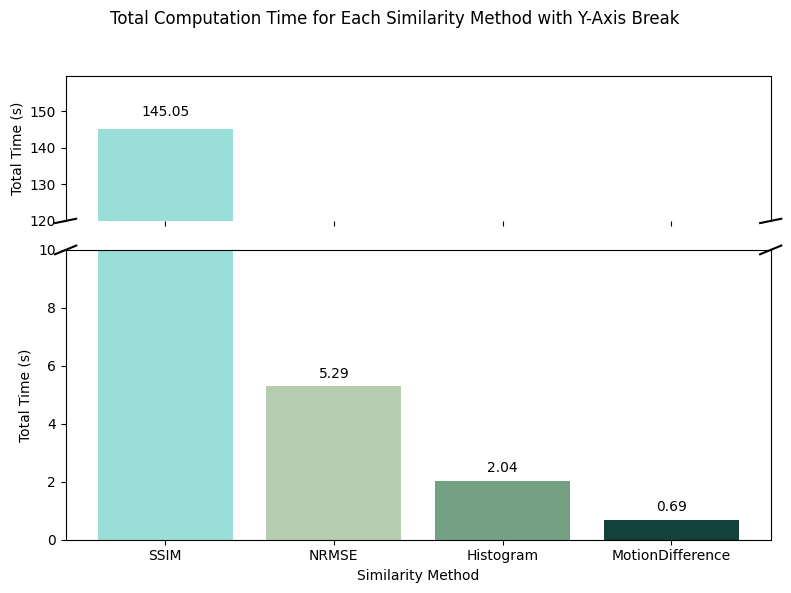

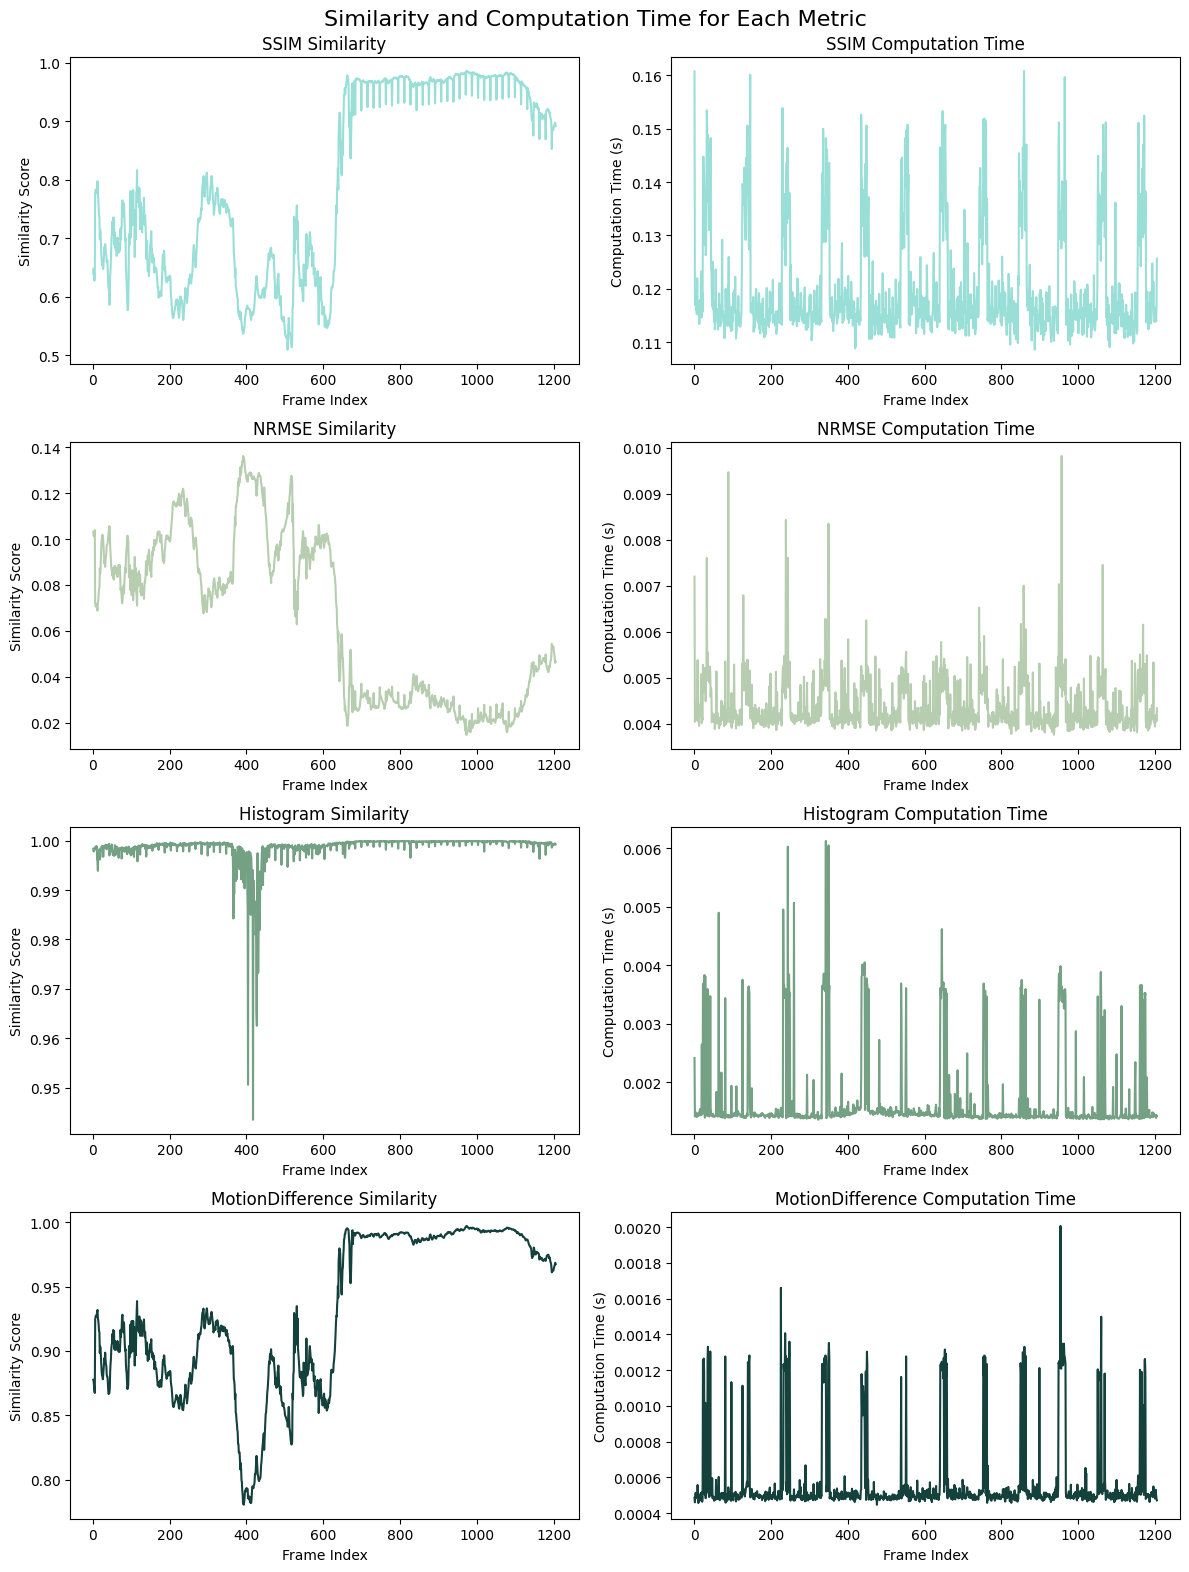

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: similarity_scores_over_frames.png


Plot saved as similarity_scores_over_frames.png


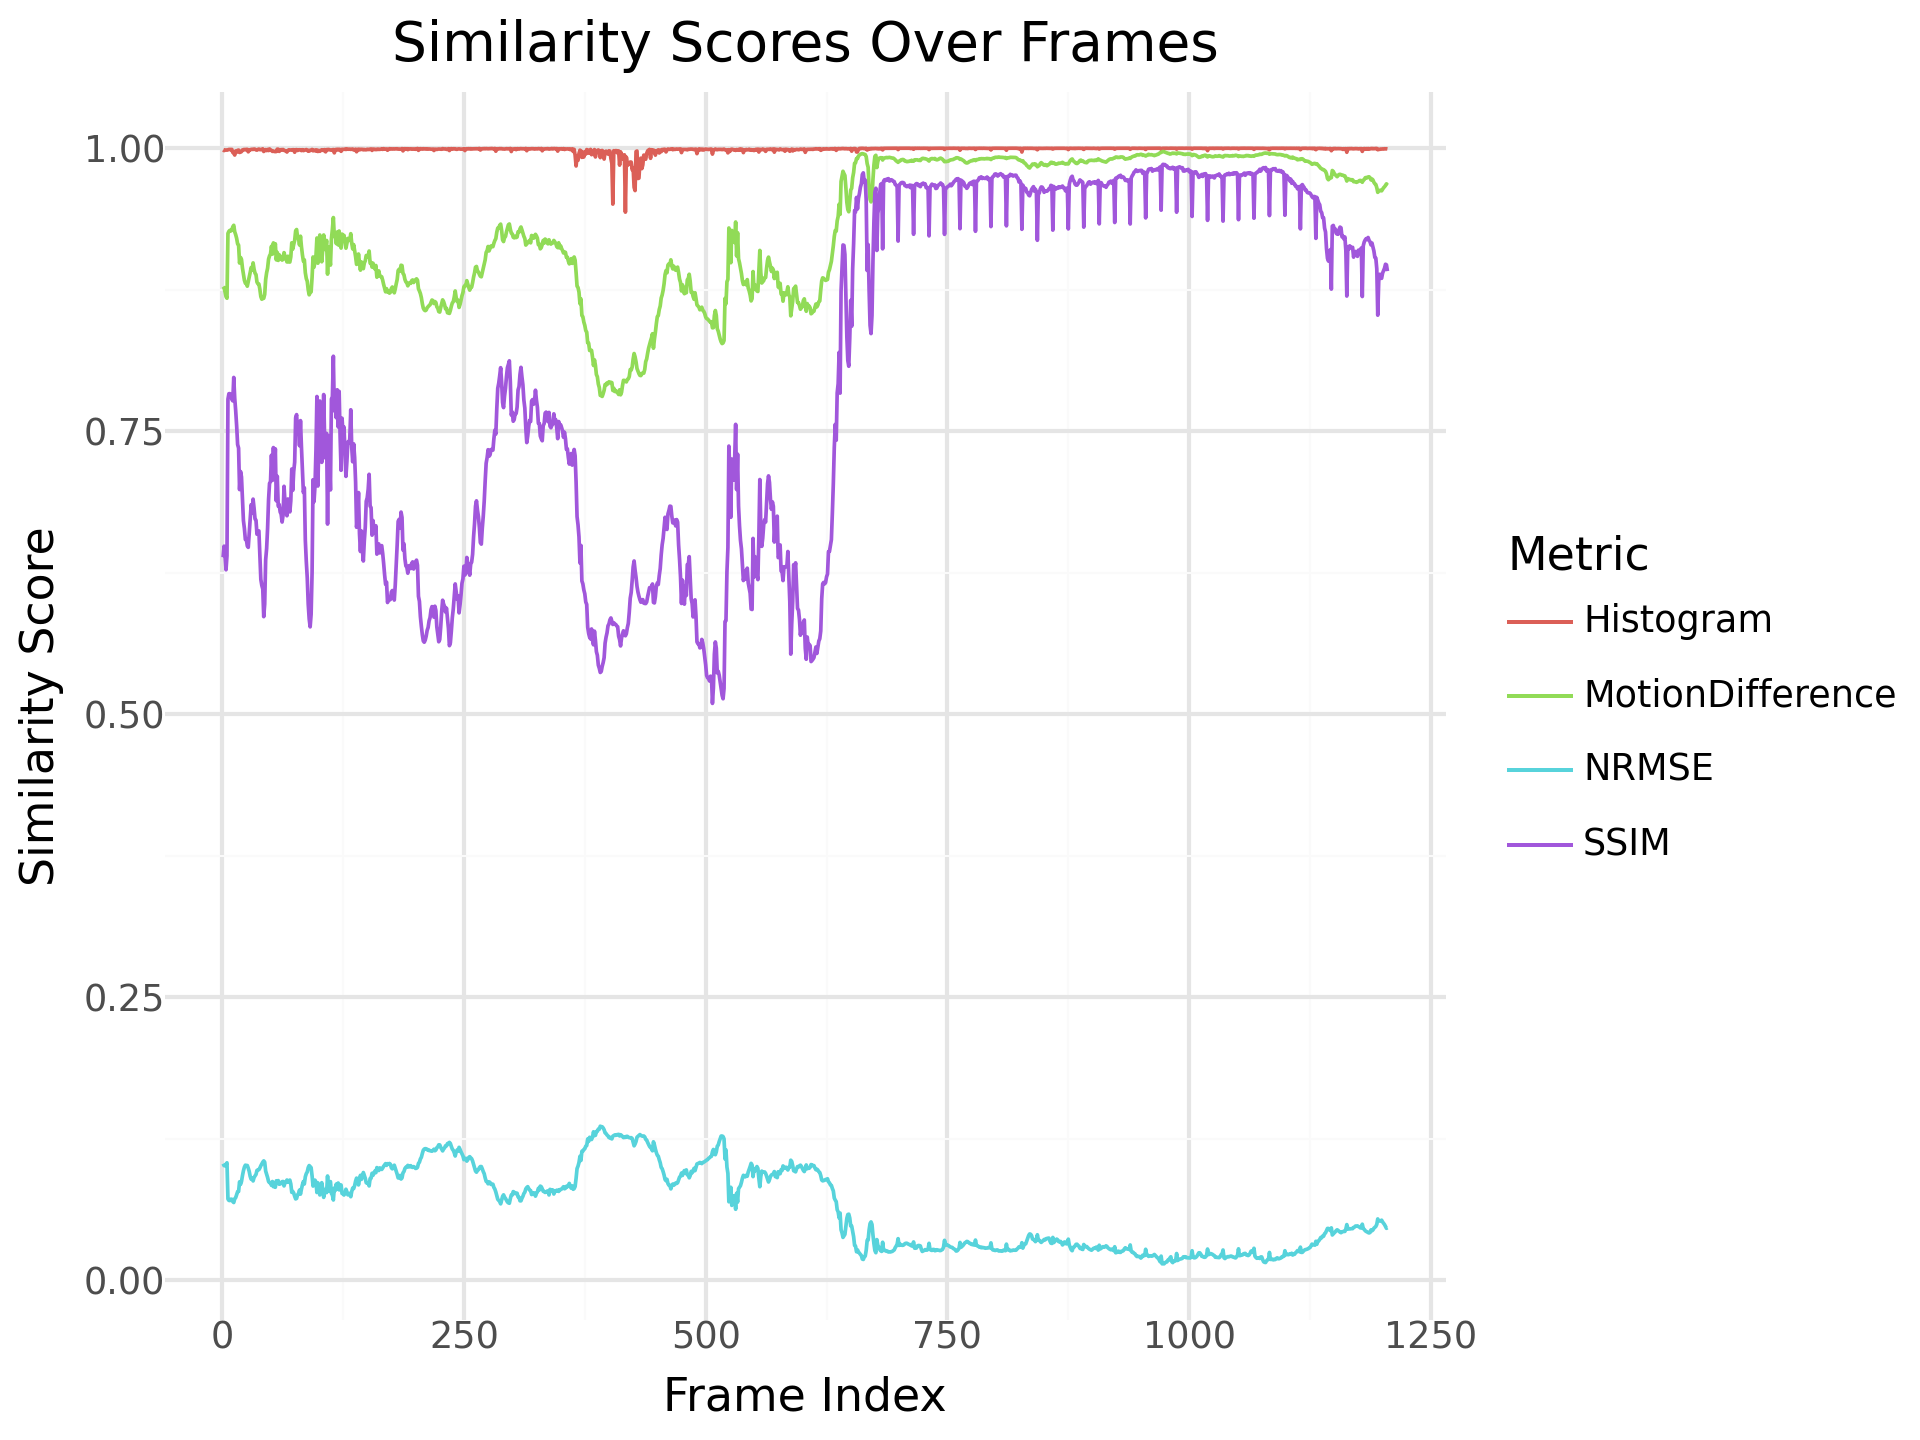

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: computation_time_over_frames.png


Plot saved as computation_time_over_frames.png


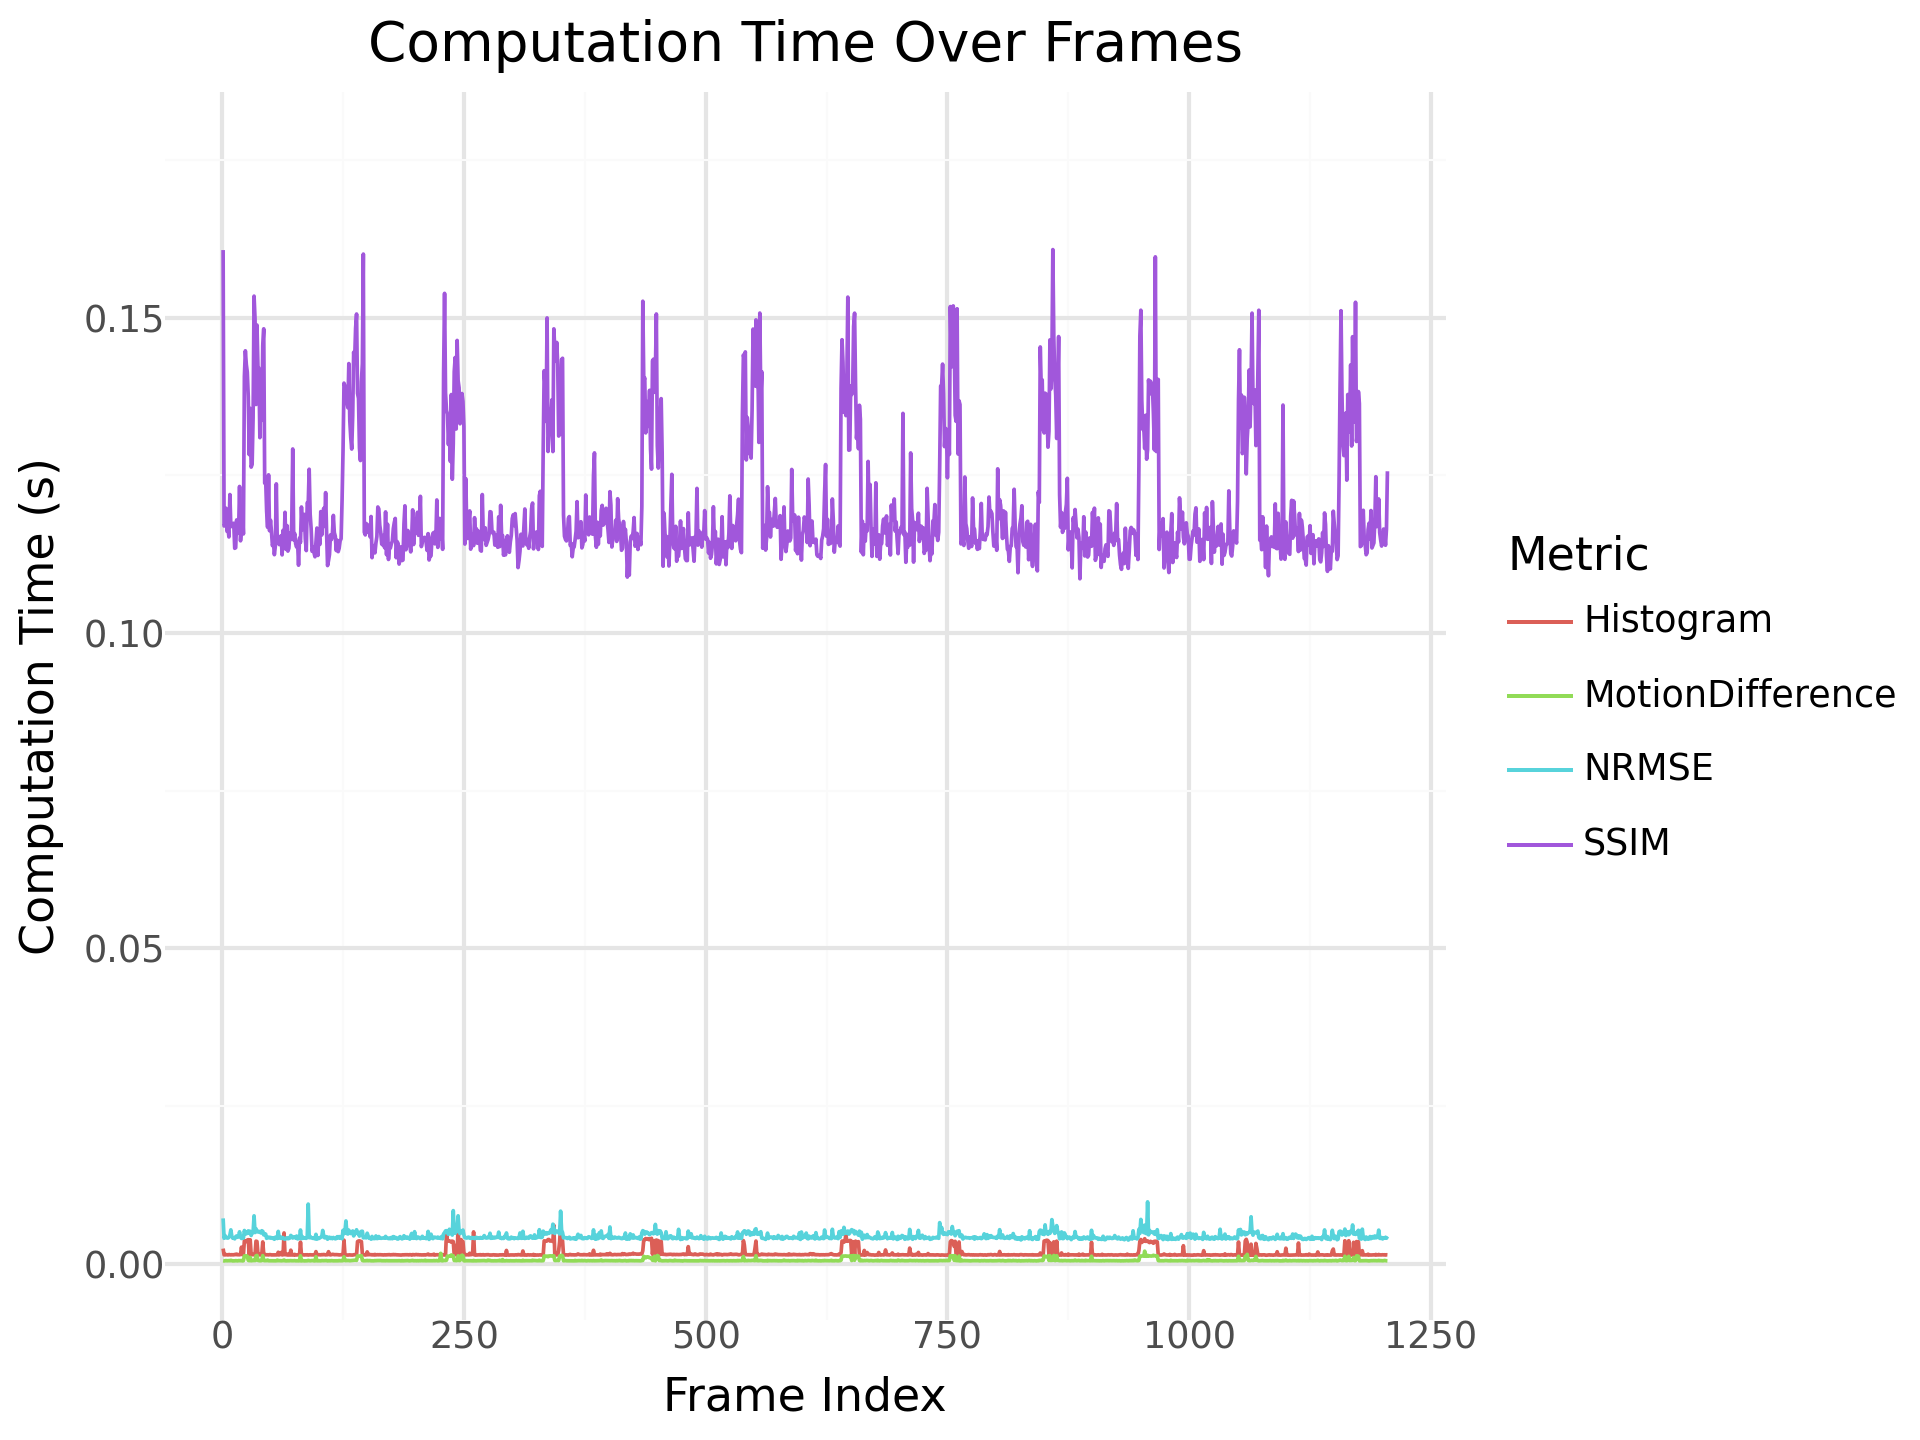

In [ ]:
# Experiment Run 1

import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, scale_y_continuous, scale_color_manual
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to install plotnine if not already installed
def install_plotnine():
    try:
        import plotnine
    except ImportError:
        import sys
        !{sys.executable} -m pip install plotnine

# Set the video path (update this to your video file path)
video_path = '/content/Input 1.mov'  # Change this to your video file path

# Verify if the video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found at path: {video_path}")

# Functions to compute different similarity metrics
def calculate_ssim(frame1, frame2):
    score, _ = ssim(frame1, frame2, full=True)
    return score

def calculate_nrmse(frame1, frame2):
    return np.sqrt(np.mean((frame1.astype("float") - frame2.astype("float")) ** 2)) / np.max(frame1)

def calculate_histogram_similarity(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def calculate_motion_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    non_zero_count = np.count_nonzero(diff)
    change_ratio = non_zero_count / frame1.size
    return 1 - change_ratio

# Function to read video frames
def get_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Loaded {frame_idx} frames...")
    cap.release()
    print(f"Total frames loaded: {len(frames)}")
    return frames

# Load frames
frames = get_video_frames(video_path)

# Check if frames are loaded; exit if no frames
if len(frames) < 2:
    raise ValueError("No frames loaded or not enough frames to compare.")

# Initialize lists to store similarity values and computation times
similarity_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}
time_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}

# Process each frame for each method and store similarity scores and computation times
frame_count = len(frames)
print("Starting similarity and computation time calculations...")
for i in range(1, frame_count):
    frame1, frame2 = frames[i - 1], frames[i]

    # Calculate similarity and timing for SSIM
    start_time = time.time()
    similarity_values['SSIM'].append(calculate_ssim(frame1, frame2))
    time_values['SSIM'].append(time.time() - start_time)

    # Calculate similarity and timing for NRMSE
    start_time = time.time()
    similarity_values['NRMSE'].append(calculate_nrmse(frame1, frame2))
    time_values['NRMSE'].append(time.time() - start_time)

    # Calculate similarity and timing for Histogram
    start_time = time.time()
    similarity_values['Histogram'].append(calculate_histogram_similarity(frame1, frame2))
    time_values['Histogram'].append(time.time() - start_time)

    # Calculate similarity and timing for Motion Difference
    start_time = time.time()
    similarity_values['MotionDifference'].append(calculate_motion_difference(frame1, frame2))
    time_values['MotionDifference'].append(time.time() - start_time)

    # Optional: Print progress every 100 frames
    if i % 100 == 0:
        print(f"Processed {i}/{frame_count - 1} frames...")

print("Similarity and computation time calculations completed.")

# Prepare DataFrames for plotting
frame_indices = list(range(1, frame_count))

# Create DataFrame for similarity scores
similarity_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': similarity_values['SSIM'],
    'NRMSE': similarity_values['NRMSE'],
    'Histogram': similarity_values['Histogram'],
    'MotionDifference': similarity_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Score")

# Create DataFrame for computation times
time_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': time_values['SSIM'],
    'NRMSE': time_values['NRMSE'],
    'Histogram': time_values['Histogram'],
    'MotionDifference': time_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Time")

# Calculate total time for each method and display in a bar chart
total_times = {method: sum(times) for method, times in time_values.items()}
total_time_df = pd.DataFrame(list(total_times.items()), columns=['Metric', 'TotalTime'])

# Define the new color palette you provided
custom_palette = ['#99dfd8', '#b7cdb0', '#74a084', '#14413c']

# Plot similarity scores using ggplot
similarity_plot = (
    ggplot(similarity_df, aes(x="Frame", y="Score", color="Metric")) +
    geom_line() +
    labs(title="Similarity Scores Over Frames", x="Frame Index", y="Similarity Score") +
    theme_minimal()
)

# Plot computation times with y-axis adjustment for clarity
time_plot = (
    ggplot(time_df, aes(x="Frame", y="Time", color="Metric")) +
    geom_line() +
    labs(title="Computation Time Over Frames", x="Frame Index", y="Computation Time (s)") +
    theme_minimal() +
    scale_y_continuous(limits=(0, max(time_df['Time']) * 1.1))  # Adjust y-axis for better visibility
)

# Plot total computation time with a y-axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
fig.subplots_adjust(hspace=0.05)

# Define y-axis limits for the break
lower_limit = 0
upper_limit = 10
middle_gap_start = 120
middle_gap_end = max(total_times.values()) * 1.1

# Plot the upper part of the y-axis
ax1.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax1.set_ylim(middle_gap_start, middle_gap_end)
ax1.set_ylabel("Total Time (s)")
ax1.spines['bottom'].set_visible(False)

# Plot the lower part of the y-axis
ax2.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax2.set_ylim(lower_limit, upper_limit)
ax2.set_xlabel("Similarity Method")
ax2.set_ylabel("Total Time (s)")

# Add diagonal lines to indicate the y-axis break
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Label each bar with the total time value
for i, v in enumerate(total_times.values()):
    if v > middle_gap_start:
        ax1.text(i, v + max(total_times.values()) * 0.02, f"{v:.2f}", ha='center', va='bottom')
    else:
        ax2.text(i, v + upper_limit * 0.02, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.suptitle("Total Computation Time for Each Similarity Method with Y-Axis Break")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_computation_time_y_axis_break_custom_palette.png", dpi=300)
plt.show()

# Function to create a combined plot for each similarity metric and its computation time
def plot_similarity_and_time(similarity_df, time_df):
    metrics = ['SSIM', 'NRMSE', 'Histogram', 'MotionDifference']

    fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics):
        # Similarity plot
        similarity_metric_df = similarity_df[similarity_df['Metric'] == metric]
        axes[i, 0].plot(similarity_metric_df['Frame'], similarity_metric_df['Score'], color=custom_palette[i])
        axes[i, 0].set_title(f"{metric} Similarity")
        axes[i, 0].set_xlabel("Frame Index")
        axes[i, 0].set_ylabel("Similarity Score")

        # Computation time plot
        time_metric_df = time_df[time_df['Metric'] == metric]
        axes[i, 1].plot(time_metric_df['Frame'], time_metric_df['Time'], color=custom_palette[i])
        axes[i, 1].set_title(f"{metric} Computation Time")
        axes[i, 1].set_xlabel("Frame Index")
        axes[i, 1].set_ylabel("Computation Time (s)")

    plt.tight_layout()
    plt.suptitle("Similarity and Computation Time for Each Metric", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the similarity and computation time side by side for each metric
plot_similarity_and_time(similarity_df, time_df)

# Function to save and display plotnine plots
def save_and_display_plot(plot, filename):
    # Save the plot as a PNG file
    plot.save(filename, dpi=300)
    print(f"Plot saved as {filename}")

    # Attempt to display the plot if in a Jupyter environment
    try:
        from IPython.display import Image, display
        display(Image(filename=filename))
    except ImportError:
        print(f"Cannot display {filename} directly. Please open the file to view the plot.")

# Save and display the plots
save_and_display_plot(similarity_plot, "similarity_scores_over_frames.png")
save_and_display_plot(time_plot, "computation_time_over_frames.png")


Loaded 100 frames...
Loaded 200 frames...
Loaded 300 frames...
Loaded 400 frames...
Loaded 500 frames...
Loaded 600 frames...
Loaded 700 frames...
Loaded 800 frames...
Loaded 900 frames...
Loaded 1000 frames...
Loaded 1100 frames...
Loaded 1200 frames...
Total frames loaded: 1206
Starting similarity and computation time calculations...
Processed 100/1205 frames...
Processed 200/1205 frames...
Processed 300/1205 frames...
Processed 400/1205 frames...
Processed 500/1205 frames...
Processed 600/1205 frames...
Processed 700/1205 frames...
Processed 800/1205 frames...
Processed 900/1205 frames...
Processed 1000/1205 frames...
Processed 1100/1205 frames...
Processed 1200/1205 frames...
Similarity and computation time calculations completed.


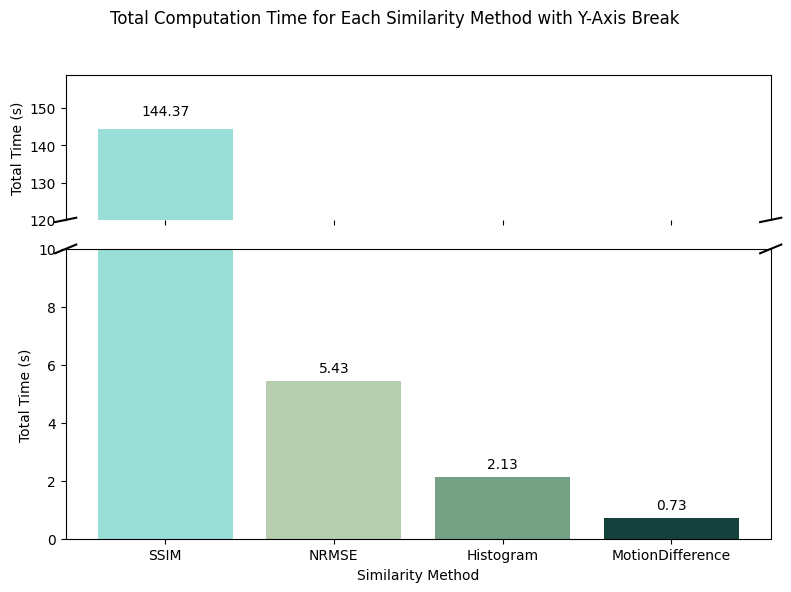

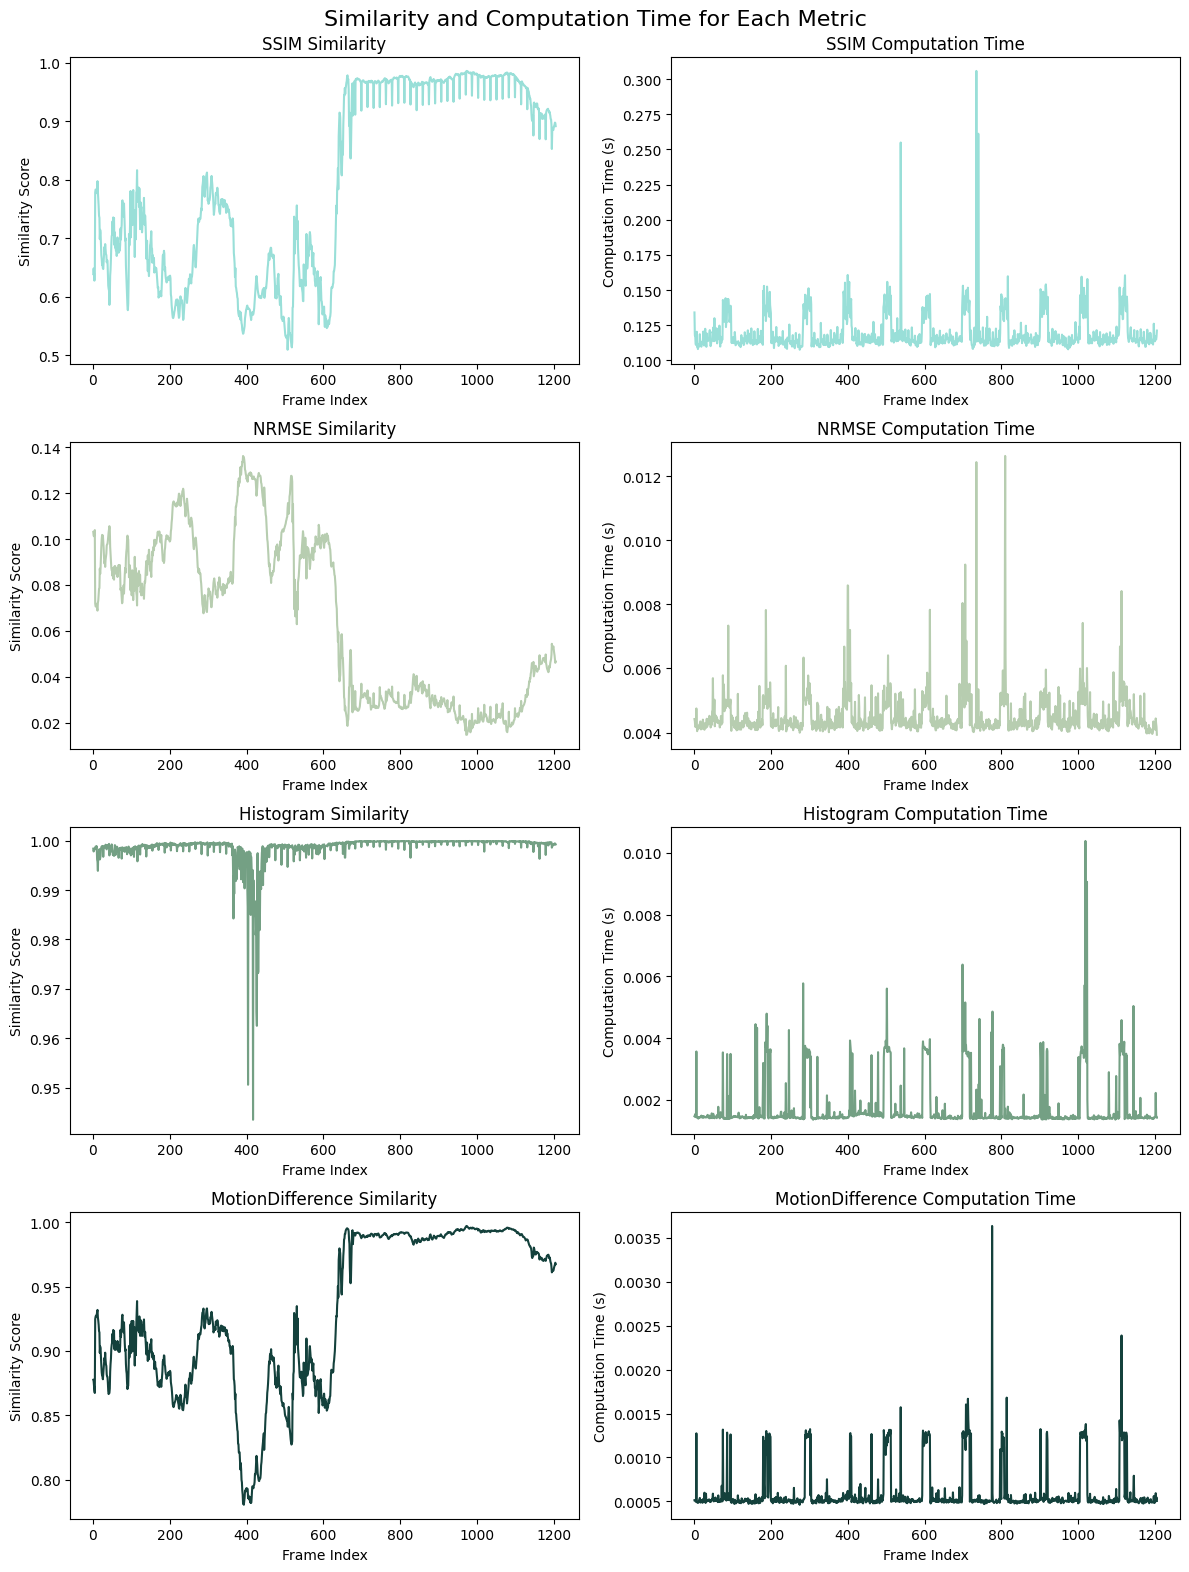

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: similarity_scores_over_frames.png


Plot saved as similarity_scores_over_frames.png


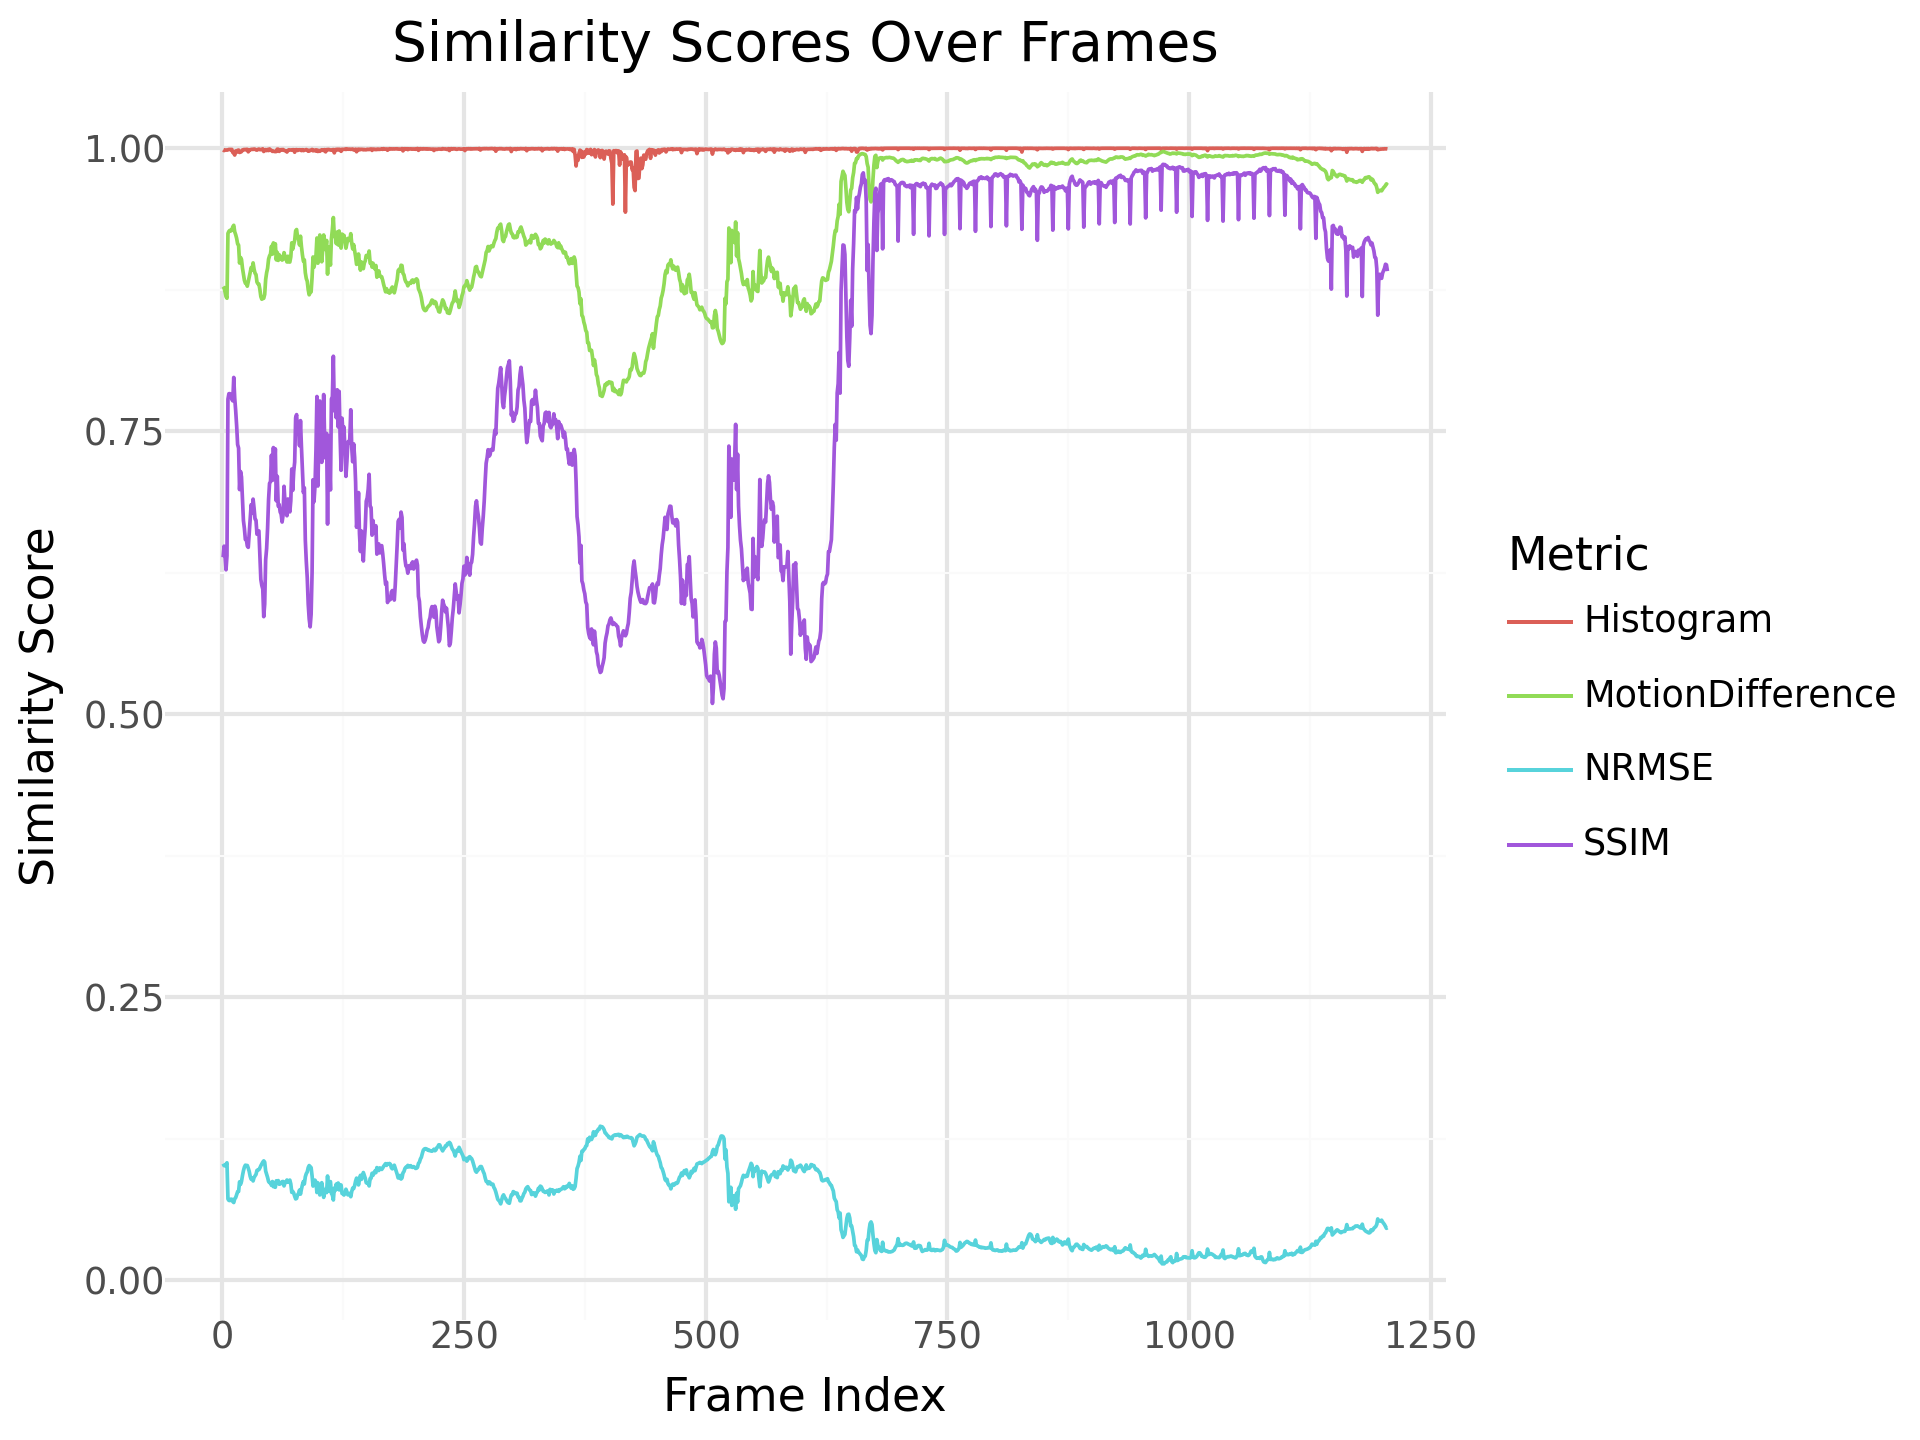

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: computation_time_over_frames.png


Plot saved as computation_time_over_frames.png


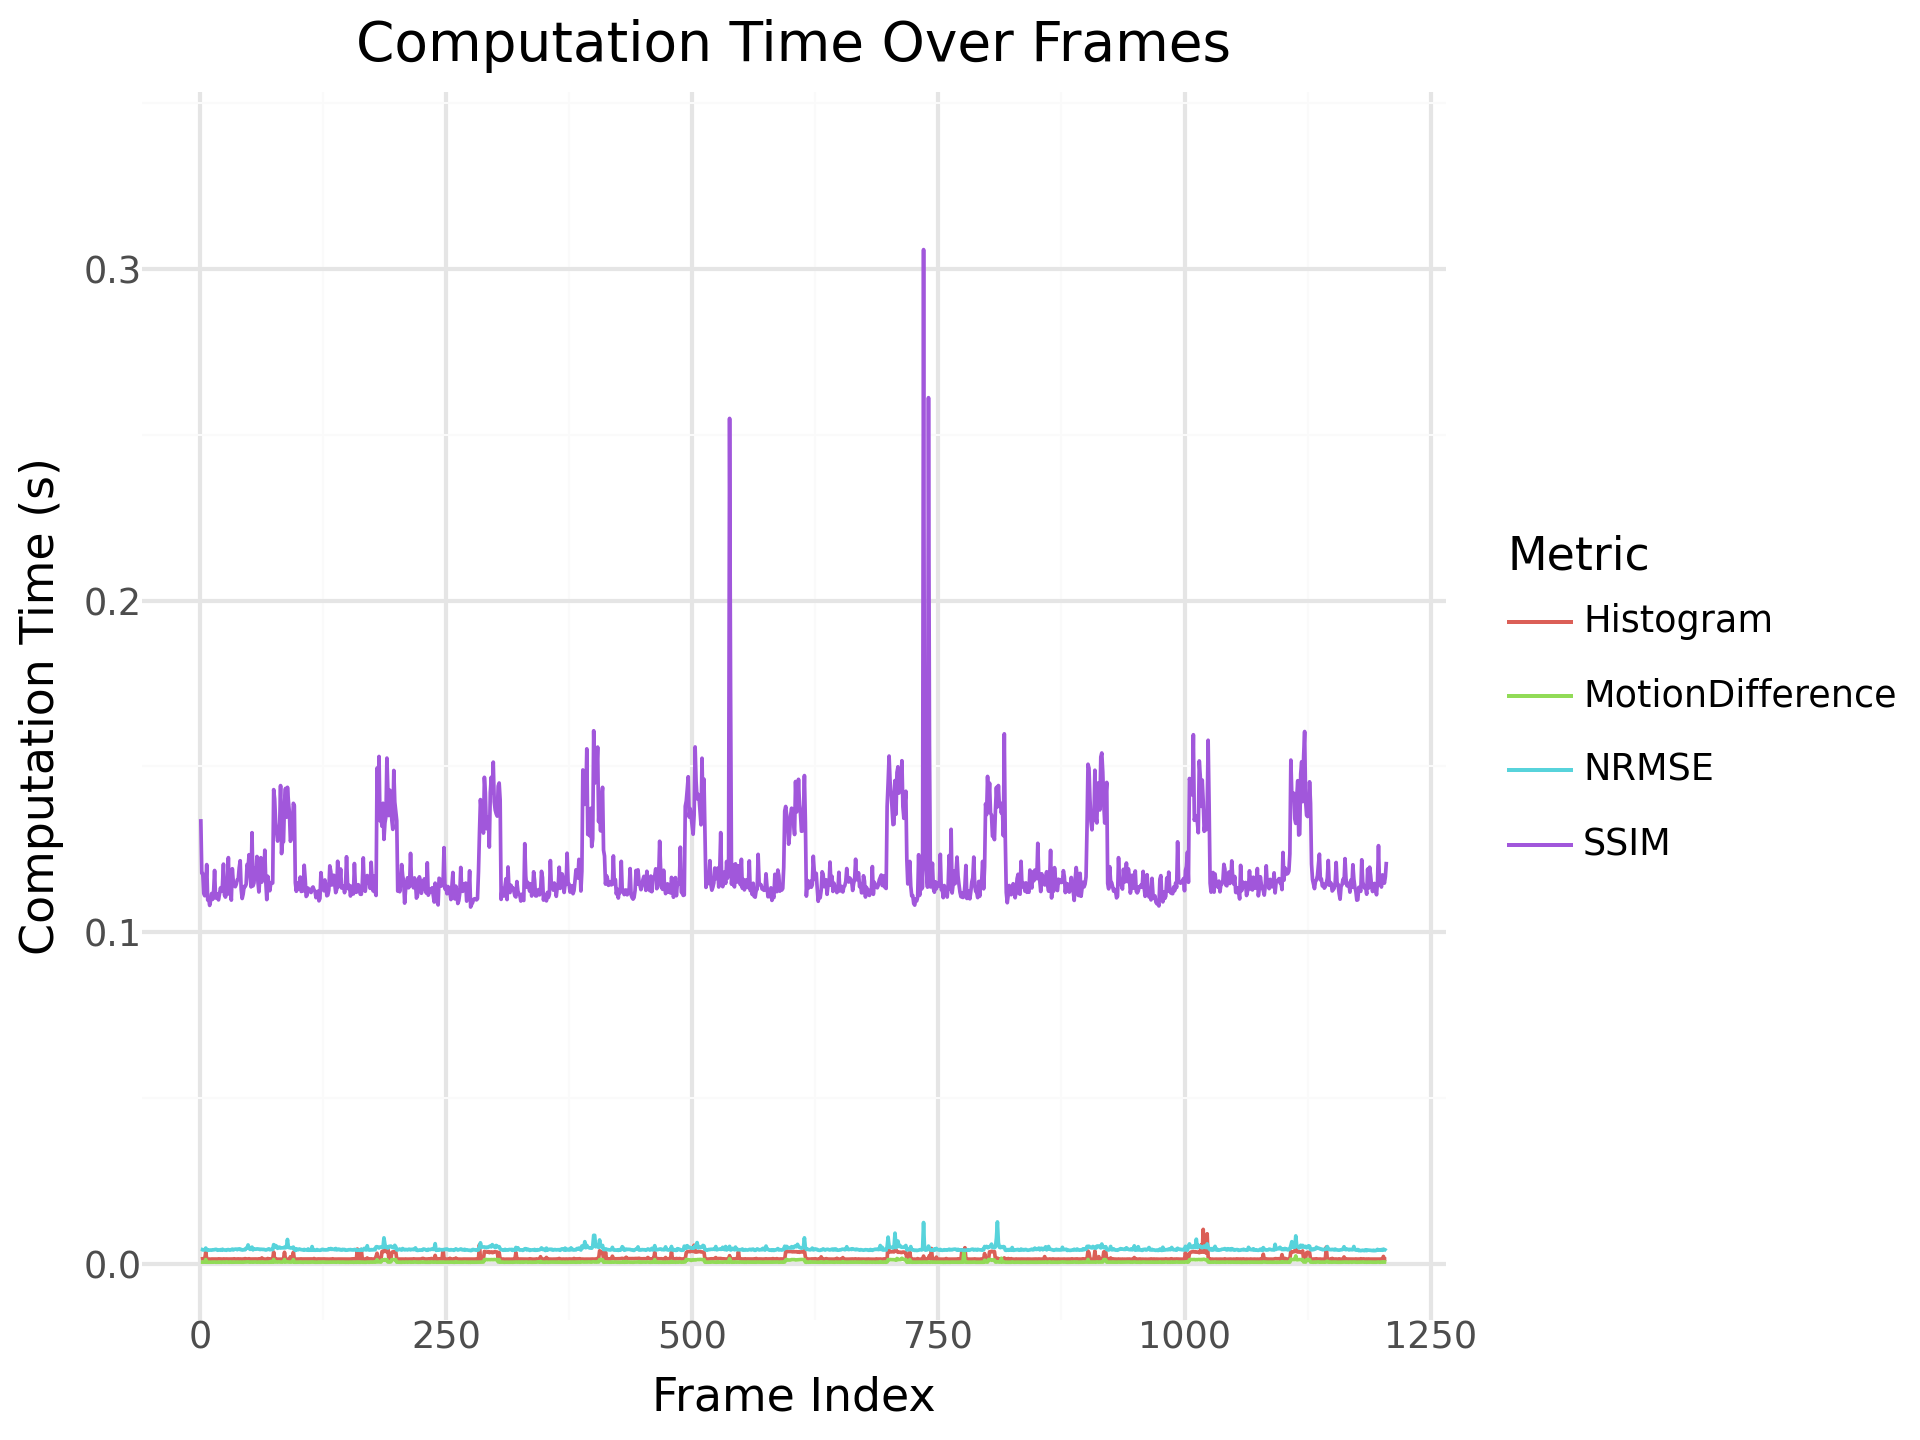

In [ ]:
# Experiment Run 3

import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, scale_y_continuous, scale_color_manual
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to install plotnine if not already installed
def install_plotnine():
    try:
        import plotnine
    except ImportError:
        import sys
        !{sys.executable} -m pip install plotnine

# Set the video path (update this to your video file path)
video_path = '/content/Input 1.mov'  # Change this to your video file path

# Verify if the video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found at path: {video_path}")

# Functions to compute different similarity metrics
def calculate_ssim(frame1, frame2):
    score, _ = ssim(frame1, frame2, full=True)
    return score

def calculate_nrmse(frame1, frame2):
    return np.sqrt(np.mean((frame1.astype("float") - frame2.astype("float")) ** 2)) / np.max(frame1)

def calculate_histogram_similarity(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def calculate_motion_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    non_zero_count = np.count_nonzero(diff)
    change_ratio = non_zero_count / frame1.size
    return 1 - change_ratio

# Function to read video frames
def get_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Loaded {frame_idx} frames...")
    cap.release()
    print(f"Total frames loaded: {len(frames)}")
    return frames

# Load frames
frames = get_video_frames(video_path)

# Check if frames are loaded; exit if no frames
if len(frames) < 2:
    raise ValueError("No frames loaded or not enough frames to compare.")

# Initialize lists to store similarity values and computation times
similarity_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}
time_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}

# Process each frame for each method and store similarity scores and computation times
frame_count = len(frames)
print("Starting similarity and computation time calculations...")
for i in range(1, frame_count):
    frame1, frame2 = frames[i - 1], frames[i]

    # Calculate similarity and timing for SSIM
    start_time = time.time()
    similarity_values['SSIM'].append(calculate_ssim(frame1, frame2))
    time_values['SSIM'].append(time.time() - start_time)

    # Calculate similarity and timing for NRMSE
    start_time = time.time()
    similarity_values['NRMSE'].append(calculate_nrmse(frame1, frame2))
    time_values['NRMSE'].append(time.time() - start_time)

    # Calculate similarity and timing for Histogram
    start_time = time.time()
    similarity_values['Histogram'].append(calculate_histogram_similarity(frame1, frame2))
    time_values['Histogram'].append(time.time() - start_time)

    # Calculate similarity and timing for Motion Difference
    start_time = time.time()
    similarity_values['MotionDifference'].append(calculate_motion_difference(frame1, frame2))
    time_values['MotionDifference'].append(time.time() - start_time)

    # Optional: Print progress every 100 frames
    if i % 100 == 0:
        print(f"Processed {i}/{frame_count - 1} frames...")

print("Similarity and computation time calculations completed.")

# Prepare DataFrames for plotting
frame_indices = list(range(1, frame_count))

# Create DataFrame for similarity scores
similarity_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': similarity_values['SSIM'],
    'NRMSE': similarity_values['NRMSE'],
    'Histogram': similarity_values['Histogram'],
    'MotionDifference': similarity_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Score")

# Create DataFrame for computation times
time_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': time_values['SSIM'],
    'NRMSE': time_values['NRMSE'],
    'Histogram': time_values['Histogram'],
    'MotionDifference': time_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Time")

# Calculate total time for each method and display in a bar chart
total_times = {method: sum(times) for method, times in time_values.items()}
total_time_df = pd.DataFrame(list(total_times.items()), columns=['Metric', 'TotalTime'])

# Define the new color palette you provided
custom_palette = ['#99dfd8', '#b7cdb0', '#74a084', '#14413c']

# Plot similarity scores using ggplot
similarity_plot = (
    ggplot(similarity_df, aes(x="Frame", y="Score", color="Metric")) +
    geom_line() +
    labs(title="Similarity Scores Over Frames", x="Frame Index", y="Similarity Score") +
    theme_minimal()
)

# Plot computation times with y-axis adjustment for clarity
time_plot = (
    ggplot(time_df, aes(x="Frame", y="Time", color="Metric")) +
    geom_line() +
    labs(title="Computation Time Over Frames", x="Frame Index", y="Computation Time (s)") +
    theme_minimal() +
    scale_y_continuous(limits=(0, max(time_df['Time']) * 1.1))  # Adjust y-axis for better visibility
)

# Plot total computation time with a y-axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
fig.subplots_adjust(hspace=0.05)

# Define y-axis limits for the break
lower_limit = 0
upper_limit = 10
middle_gap_start = 120
middle_gap_end = max(total_times.values()) * 1.1

# Plot the upper part of the y-axis
ax1.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax1.set_ylim(middle_gap_start, middle_gap_end)
ax1.set_ylabel("Total Time (s)")
ax1.spines['bottom'].set_visible(False)

# Plot the lower part of the y-axis
ax2.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax2.set_ylim(lower_limit, upper_limit)
ax2.set_xlabel("Similarity Method")
ax2.set_ylabel("Total Time (s)")

# Add diagonal lines to indicate the y-axis break
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Label each bar with the total time value
for i, v in enumerate(total_times.values()):
    if v > middle_gap_start:
        ax1.text(i, v + max(total_times.values()) * 0.02, f"{v:.2f}", ha='center', va='bottom')
    else:
        ax2.text(i, v + upper_limit * 0.02, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.suptitle("Total Computation Time for Each Similarity Method with Y-Axis Break")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_computation_time_y_axis_break_custom_palette.png", dpi=300)
plt.show()

# Function to create a combined plot for each similarity metric and its computation time
def plot_similarity_and_time(similarity_df, time_df):
    metrics = ['SSIM', 'NRMSE', 'Histogram', 'MotionDifference']

    fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics):
        # Similarity plot
        similarity_metric_df = similarity_df[similarity_df['Metric'] == metric]
        axes[i, 0].plot(similarity_metric_df['Frame'], similarity_metric_df['Score'], color=custom_palette[i])
        axes[i, 0].set_title(f"{metric} Similarity")
        axes[i, 0].set_xlabel("Frame Index")
        axes[i, 0].set_ylabel("Similarity Score")

        # Computation time plot
        time_metric_df = time_df[time_df['Metric'] == metric]
        axes[i, 1].plot(time_metric_df['Frame'], time_metric_df['Time'], color=custom_palette[i])
        axes[i, 1].set_title(f"{metric} Computation Time")
        axes[i, 1].set_xlabel("Frame Index")
        axes[i, 1].set_ylabel("Computation Time (s)")

    plt.tight_layout()
    plt.suptitle("Similarity and Computation Time for Each Metric", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the similarity and computation time side by side for each metric
plot_similarity_and_time(similarity_df, time_df)

# Function to save and display plotnine plots
def save_and_display_plot(plot, filename):
    # Save the plot as a PNG file
    plot.save(filename, dpi=300)
    print(f"Plot saved as {filename}")

    # Attempt to display the plot if in a Jupyter environment
    try:
        from IPython.display import Image, display
        display(Image(filename=filename))
    except ImportError:
        print(f"Cannot display {filename} directly. Please open the file to view the plot.")

# Save and display the plots
save_and_display_plot(similarity_plot, "similarity_scores_over_frames.png")
save_and_display_plot(time_plot, "computation_time_over_frames.png")

Loaded 100 frames...
Loaded 200 frames...
Loaded 300 frames...
Loaded 400 frames...
Loaded 500 frames...
Loaded 600 frames...
Loaded 700 frames...
Loaded 800 frames...
Loaded 900 frames...
Loaded 1000 frames...
Loaded 1100 frames...
Loaded 1200 frames...
Total frames loaded: 1206
Starting similarity and computation time calculations...
Processed 100/1205 frames...
Processed 200/1205 frames...
Processed 300/1205 frames...
Processed 400/1205 frames...
Processed 500/1205 frames...
Processed 600/1205 frames...
Processed 700/1205 frames...
Processed 800/1205 frames...
Processed 900/1205 frames...
Processed 1000/1205 frames...
Processed 1100/1205 frames...
Processed 1200/1205 frames...
Similarity and computation time calculations completed.


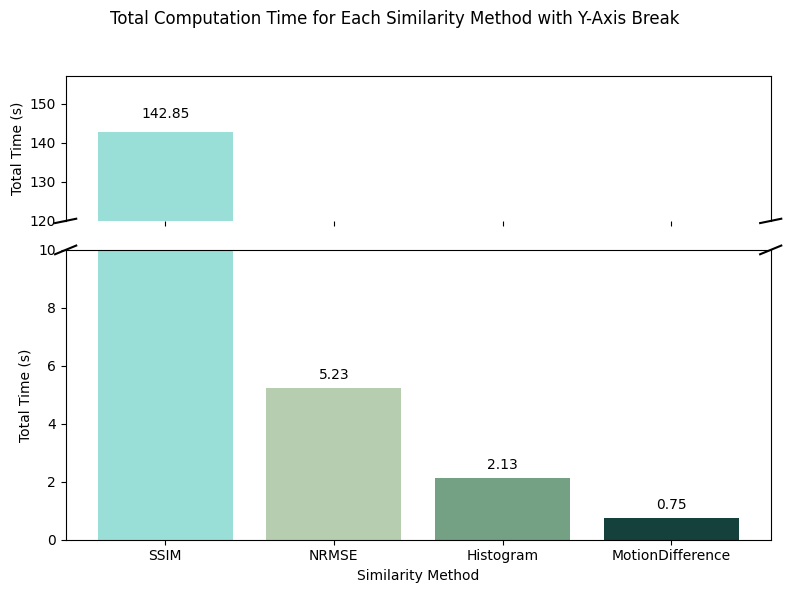

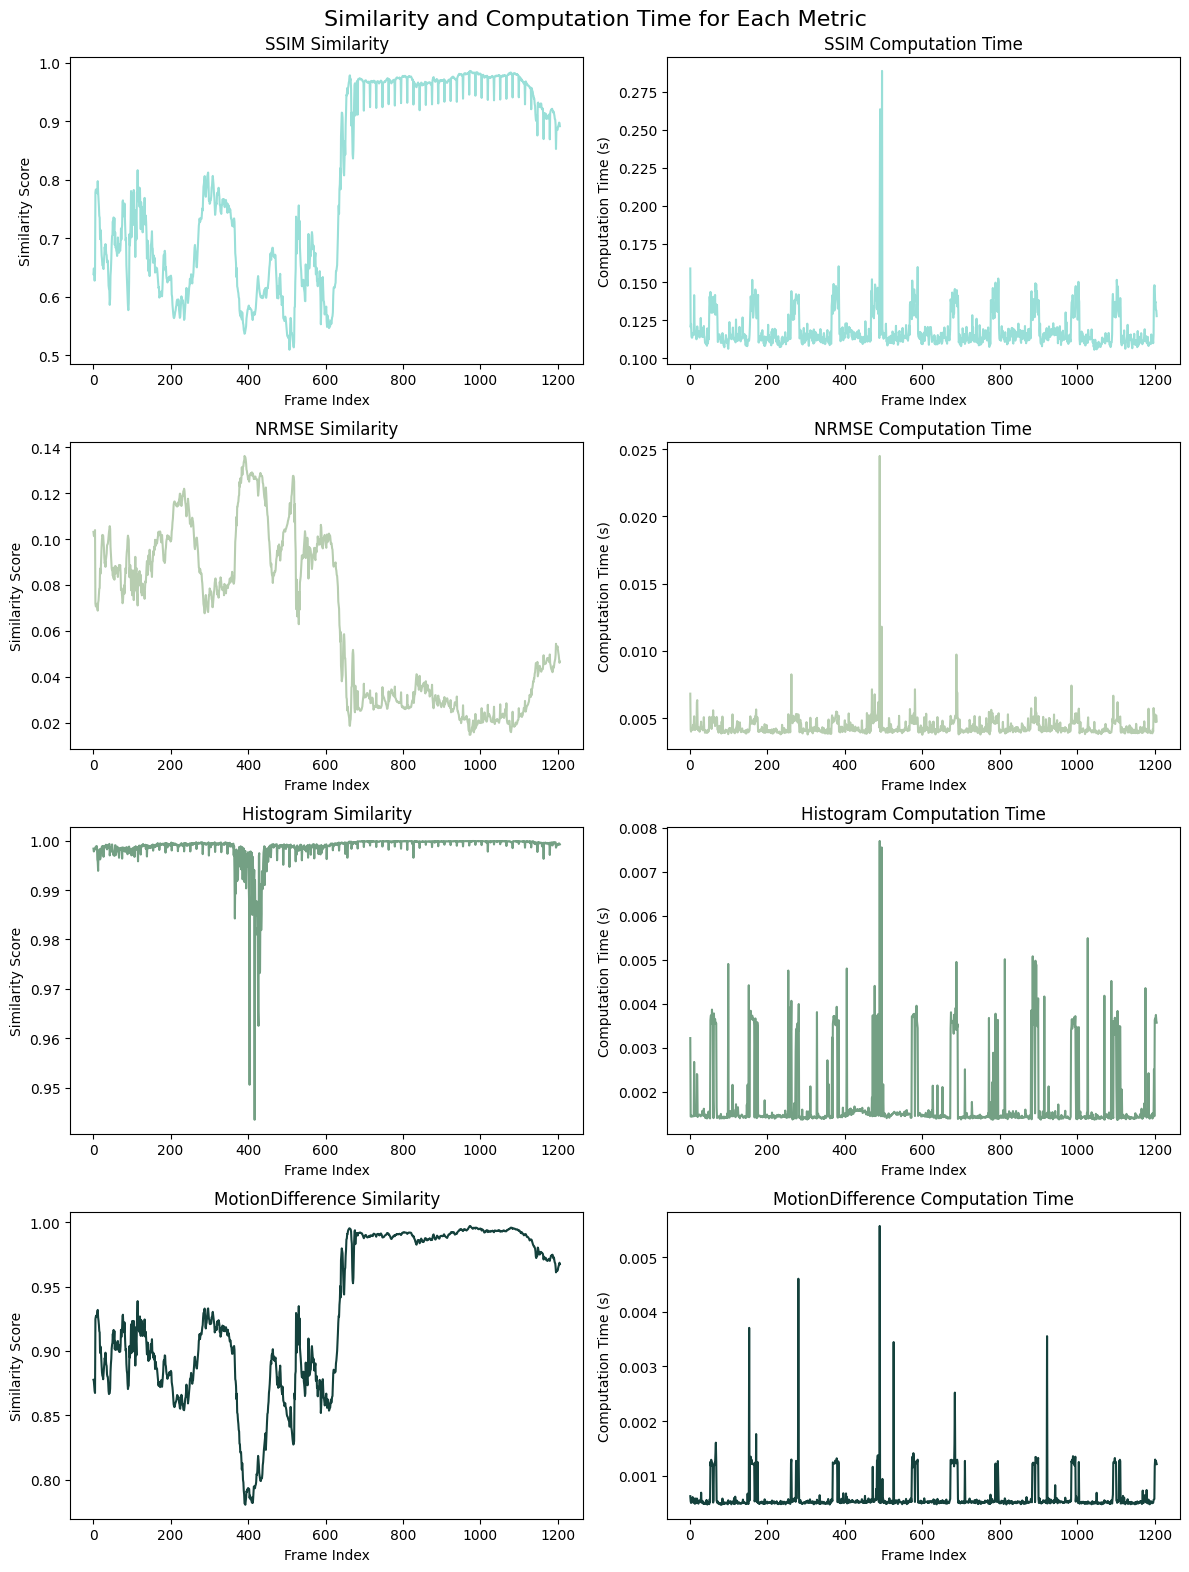

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: similarity_scores_over_frames.png


Plot saved as similarity_scores_over_frames.png


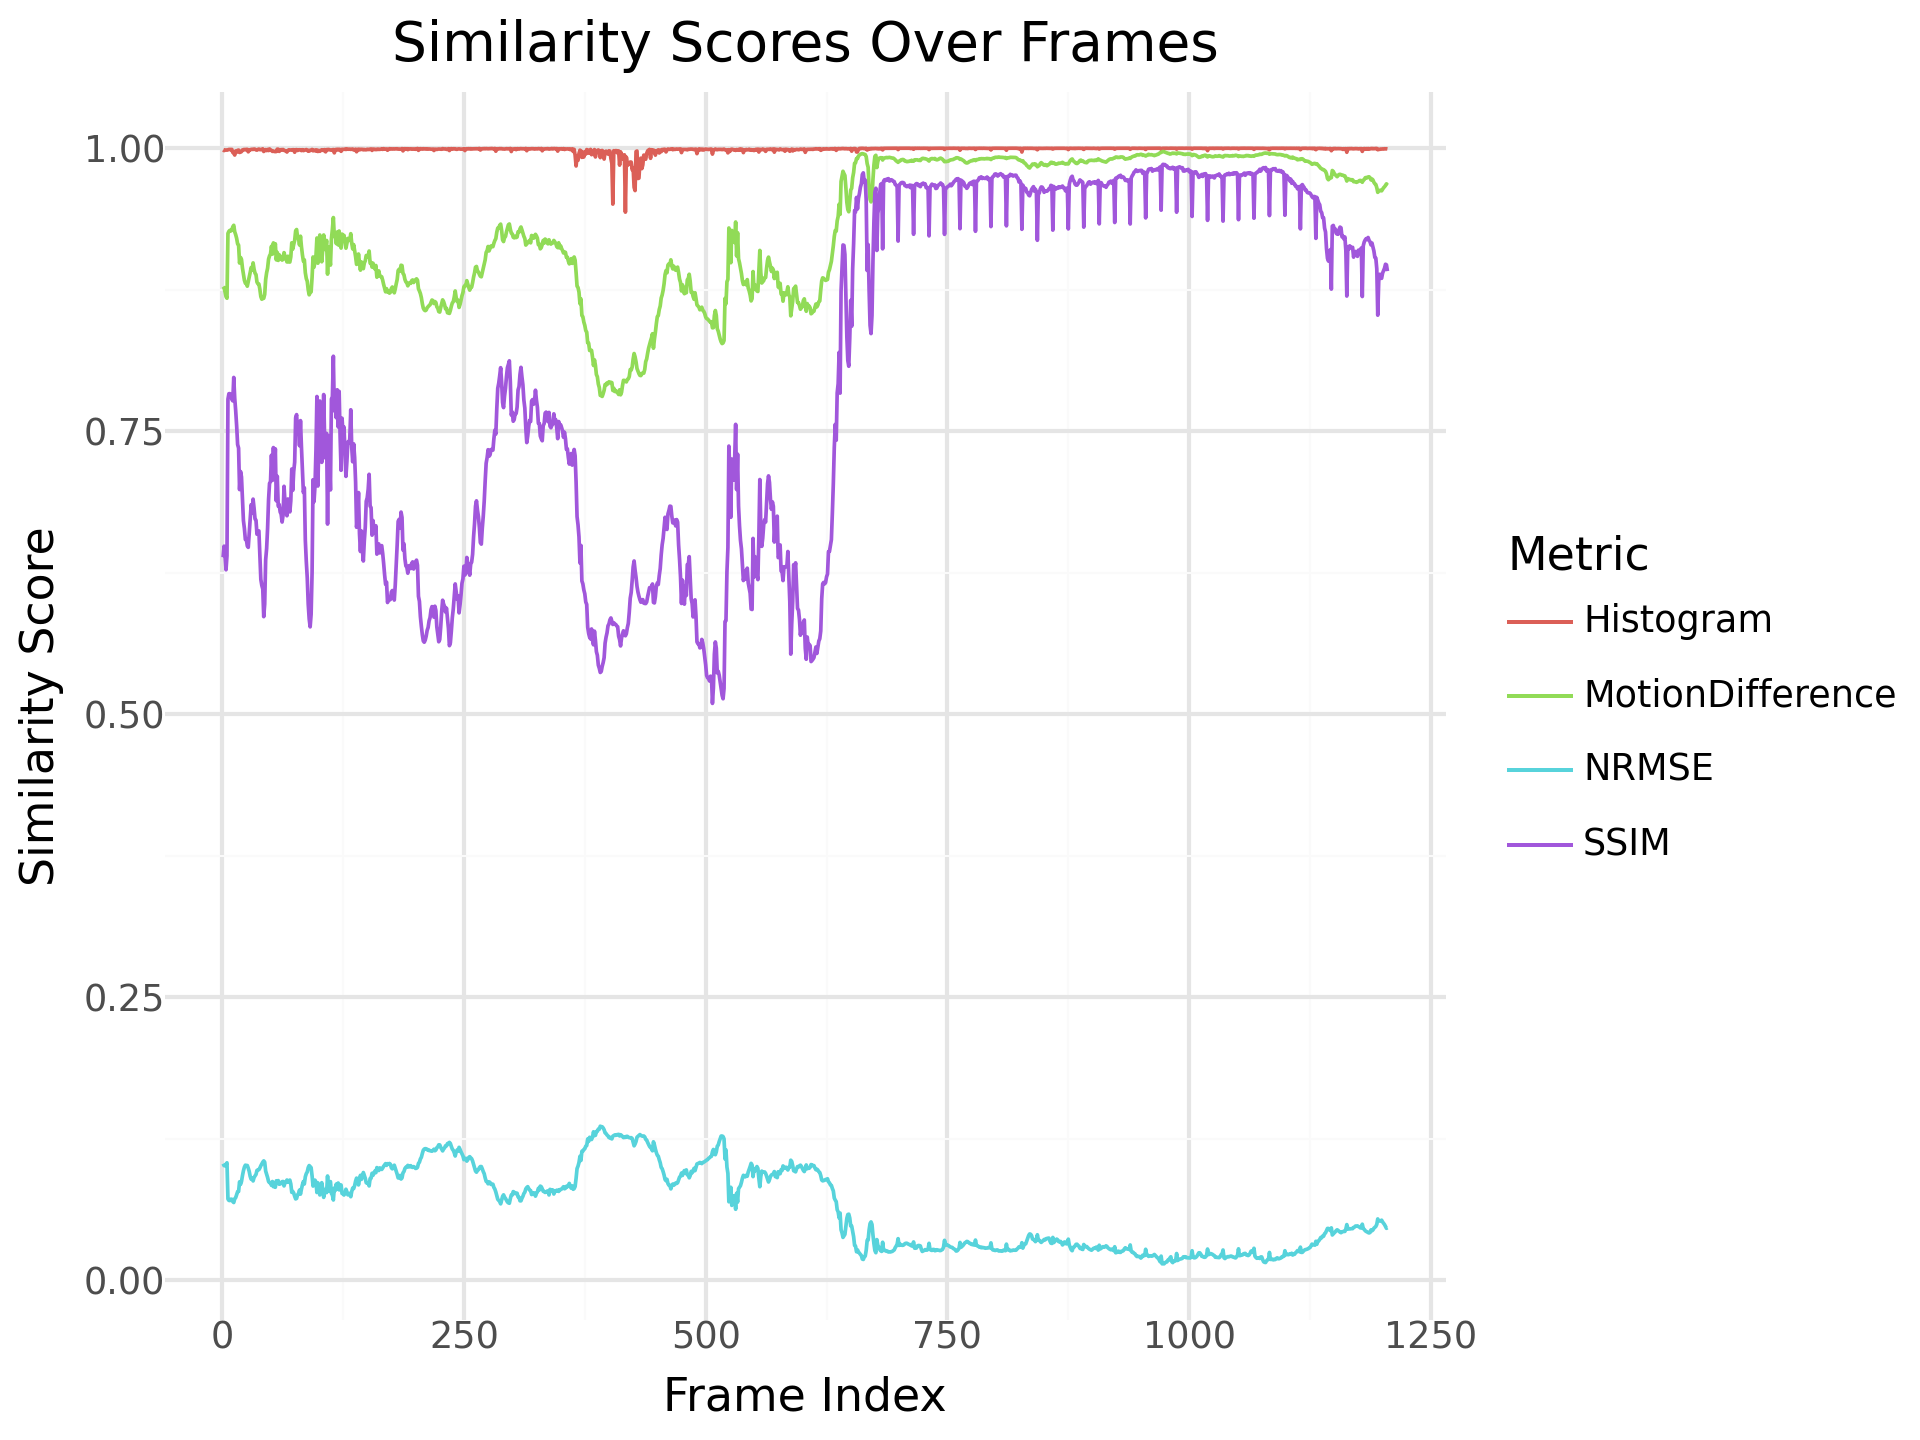

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: computation_time_over_frames.png


Plot saved as computation_time_over_frames.png


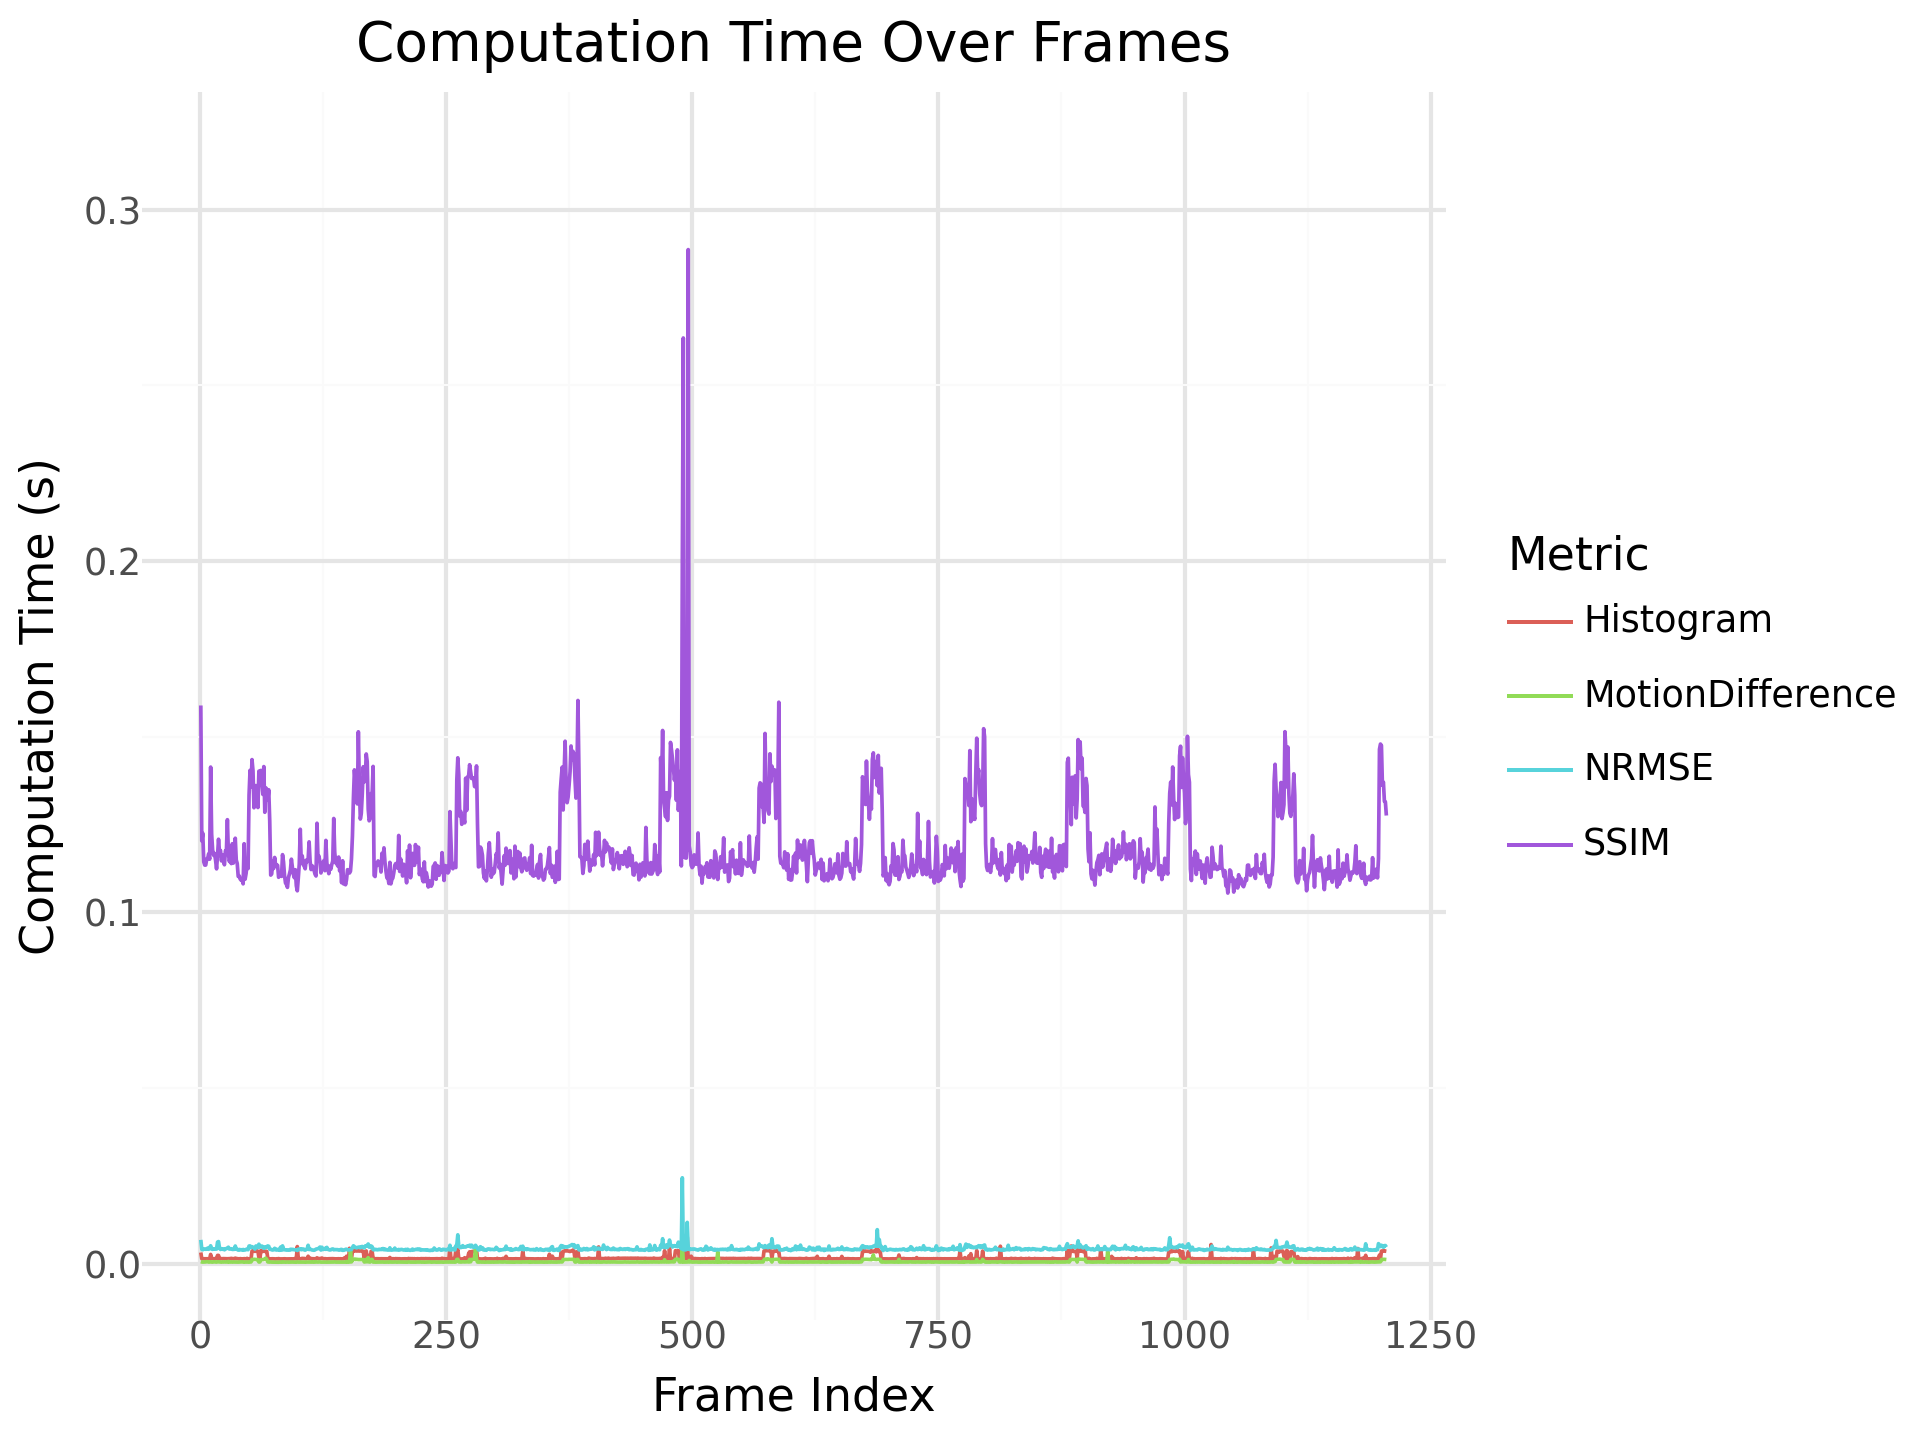

In [ ]:
# Experiment Run 4

import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, scale_y_continuous, scale_color_manual
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to install plotnine if not already installed
def install_plotnine():
    try:
        import plotnine
    except ImportError:
        import sys
        !{sys.executable} -m pip install plotnine

# Set the video path (update this to your video file path)
video_path = '/content/Input 1.mov'  # Change this to your video file path

# Verify if the video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found at path: {video_path}")

# Functions to compute different similarity metrics
def calculate_ssim(frame1, frame2):
    score, _ = ssim(frame1, frame2, full=True)
    return score

def calculate_nrmse(frame1, frame2):
    return np.sqrt(np.mean((frame1.astype("float") - frame2.astype("float")) ** 2)) / np.max(frame1)

def calculate_histogram_similarity(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def calculate_motion_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    non_zero_count = np.count_nonzero(diff)
    change_ratio = non_zero_count / frame1.size
    return 1 - change_ratio

# Function to read video frames
def get_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Loaded {frame_idx} frames...")
    cap.release()
    print(f"Total frames loaded: {len(frames)}")
    return frames

# Load frames
frames = get_video_frames(video_path)

# Check if frames are loaded; exit if no frames
if len(frames) < 2:
    raise ValueError("No frames loaded or not enough frames to compare.")

# Initialize lists to store similarity values and computation times
similarity_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}
time_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}

# Process each frame for each method and store similarity scores and computation times
frame_count = len(frames)
print("Starting similarity and computation time calculations...")
for i in range(1, frame_count):
    frame1, frame2 = frames[i - 1], frames[i]

    # Calculate similarity and timing for SSIM
    start_time = time.time()
    similarity_values['SSIM'].append(calculate_ssim(frame1, frame2))
    time_values['SSIM'].append(time.time() - start_time)

    # Calculate similarity and timing for NRMSE
    start_time = time.time()
    similarity_values['NRMSE'].append(calculate_nrmse(frame1, frame2))
    time_values['NRMSE'].append(time.time() - start_time)

    # Calculate similarity and timing for Histogram
    start_time = time.time()
    similarity_values['Histogram'].append(calculate_histogram_similarity(frame1, frame2))
    time_values['Histogram'].append(time.time() - start_time)

    # Calculate similarity and timing for Motion Difference
    start_time = time.time()
    similarity_values['MotionDifference'].append(calculate_motion_difference(frame1, frame2))
    time_values['MotionDifference'].append(time.time() - start_time)

    # Optional: Print progress every 100 frames
    if i % 100 == 0:
        print(f"Processed {i}/{frame_count - 1} frames...")

print("Similarity and computation time calculations completed.")

# Prepare DataFrames for plotting
frame_indices = list(range(1, frame_count))

# Create DataFrame for similarity scores
similarity_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': similarity_values['SSIM'],
    'NRMSE': similarity_values['NRMSE'],
    'Histogram': similarity_values['Histogram'],
    'MotionDifference': similarity_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Score")

# Create DataFrame for computation times
time_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': time_values['SSIM'],
    'NRMSE': time_values['NRMSE'],
    'Histogram': time_values['Histogram'],
    'MotionDifference': time_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Time")

# Calculate total time for each method and display in a bar chart
total_times = {method: sum(times) for method, times in time_values.items()}
total_time_df = pd.DataFrame(list(total_times.items()), columns=['Metric', 'TotalTime'])

# Define the new color palette you provided
custom_palette = ['#99dfd8', '#b7cdb0', '#74a084', '#14413c']

# Plot similarity scores using ggplot
similarity_plot = (
    ggplot(similarity_df, aes(x="Frame", y="Score", color="Metric")) +
    geom_line() +
    labs(title="Similarity Scores Over Frames", x="Frame Index", y="Similarity Score") +
    theme_minimal()
)

# Plot computation times with y-axis adjustment for clarity
time_plot = (
    ggplot(time_df, aes(x="Frame", y="Time", color="Metric")) +
    geom_line() +
    labs(title="Computation Time Over Frames", x="Frame Index", y="Computation Time (s)") +
    theme_minimal() +
    scale_y_continuous(limits=(0, max(time_df['Time']) * 1.1))  # Adjust y-axis for better visibility
)

# Plot total computation time with a y-axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
fig.subplots_adjust(hspace=0.05)

# Define y-axis limits for the break
lower_limit = 0
upper_limit = 10
middle_gap_start = 120
middle_gap_end = max(total_times.values()) * 1.1

# Plot the upper part of the y-axis
ax1.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax1.set_ylim(middle_gap_start, middle_gap_end)
ax1.set_ylabel("Total Time (s)")
ax1.spines['bottom'].set_visible(False)

# Plot the lower part of the y-axis
ax2.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax2.set_ylim(lower_limit, upper_limit)
ax2.set_xlabel("Similarity Method")
ax2.set_ylabel("Total Time (s)")

# Add diagonal lines to indicate the y-axis break
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Label each bar with the total time value
for i, v in enumerate(total_times.values()):
    if v > middle_gap_start:
        ax1.text(i, v + max(total_times.values()) * 0.02, f"{v:.2f}", ha='center', va='bottom')
    else:
        ax2.text(i, v + upper_limit * 0.02, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.suptitle("Total Computation Time for Each Similarity Method with Y-Axis Break")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_computation_time_y_axis_break_custom_palette.png", dpi=300)
plt.show()

# Function to create a combined plot for each similarity metric and its computation time
def plot_similarity_and_time(similarity_df, time_df):
    metrics = ['SSIM', 'NRMSE', 'Histogram', 'MotionDifference']

    fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics):
        # Similarity plot
        similarity_metric_df = similarity_df[similarity_df['Metric'] == metric]
        axes[i, 0].plot(similarity_metric_df['Frame'], similarity_metric_df['Score'], color=custom_palette[i])
        axes[i, 0].set_title(f"{metric} Similarity")
        axes[i, 0].set_xlabel("Frame Index")
        axes[i, 0].set_ylabel("Similarity Score")

        # Computation time plot
        time_metric_df = time_df[time_df['Metric'] == metric]
        axes[i, 1].plot(time_metric_df['Frame'], time_metric_df['Time'], color=custom_palette[i])
        axes[i, 1].set_title(f"{metric} Computation Time")
        axes[i, 1].set_xlabel("Frame Index")
        axes[i, 1].set_ylabel("Computation Time (s)")

    plt.tight_layout()
    plt.suptitle("Similarity and Computation Time for Each Metric", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the similarity and computation time side by side for each metric
plot_similarity_and_time(similarity_df, time_df)

# Function to save and display plotnine plots
def save_and_display_plot(plot, filename):
    # Save the plot as a PNG file
    plot.save(filename, dpi=300)
    print(f"Plot saved as {filename}")

    # Attempt to display the plot if in a Jupyter environment
    try:
        from IPython.display import Image, display
        display(Image(filename=filename))
    except ImportError:
        print(f"Cannot display {filename} directly. Please open the file to view the plot.")

# Save and display the plots
save_and_display_plot(similarity_plot, "similarity_scores_over_frames.png")
save_and_display_plot(time_plot, "computation_time_over_frames.png")

Loaded 100 frames...
Loaded 200 frames...
Loaded 300 frames...
Loaded 400 frames...
Loaded 500 frames...
Loaded 600 frames...
Loaded 700 frames...
Loaded 800 frames...
Loaded 900 frames...
Loaded 1000 frames...
Loaded 1100 frames...
Loaded 1200 frames...
Total frames loaded: 1206
Starting similarity and computation time calculations...
Processed 100/1205 frames...
Processed 200/1205 frames...
Processed 300/1205 frames...
Processed 400/1205 frames...
Processed 500/1205 frames...
Processed 600/1205 frames...
Processed 700/1205 frames...
Processed 800/1205 frames...
Processed 900/1205 frames...
Processed 1000/1205 frames...
Processed 1100/1205 frames...
Processed 1200/1205 frames...
Similarity and computation time calculations completed.


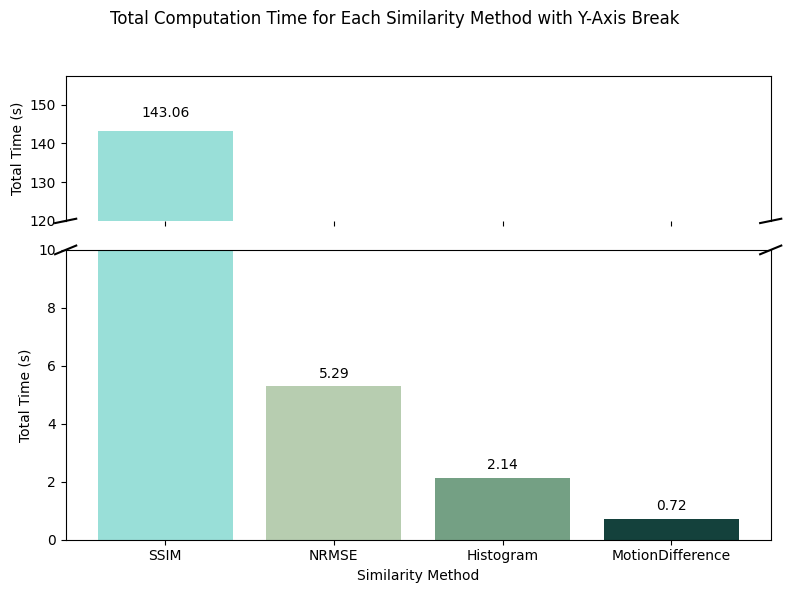

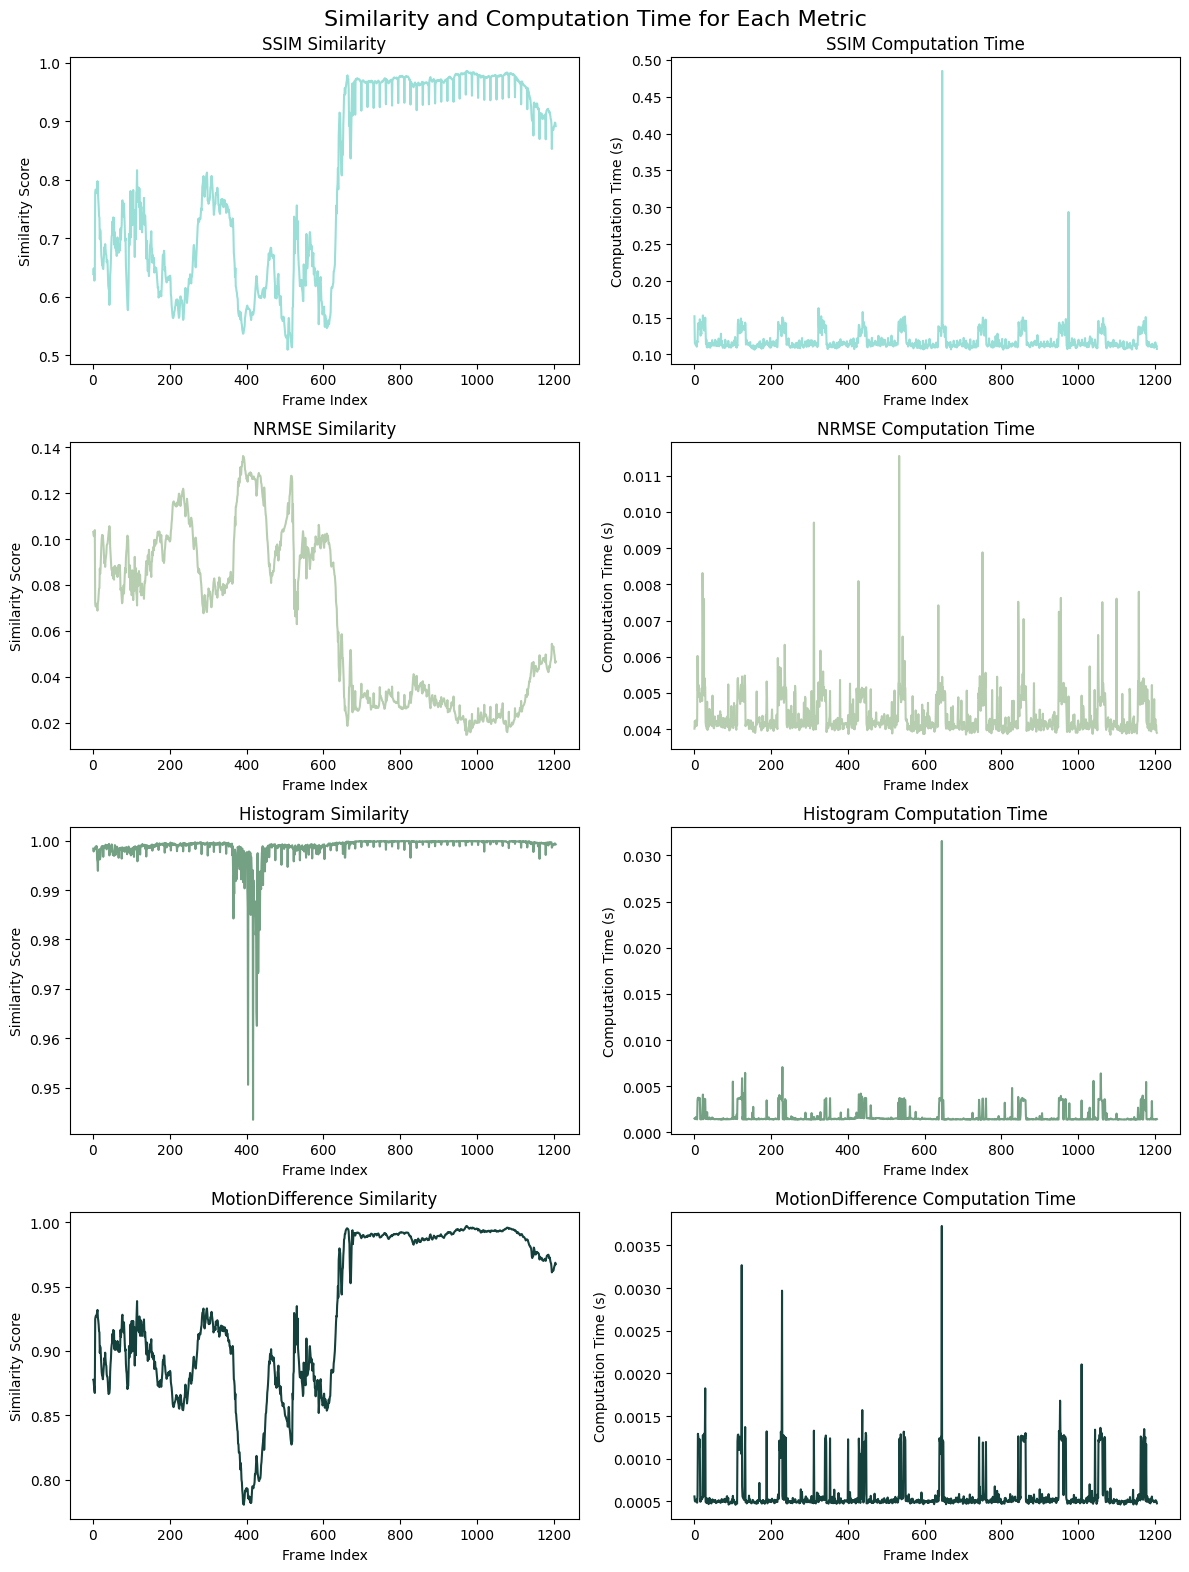

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: similarity_scores_over_frames.png


Plot saved as similarity_scores_over_frames.png


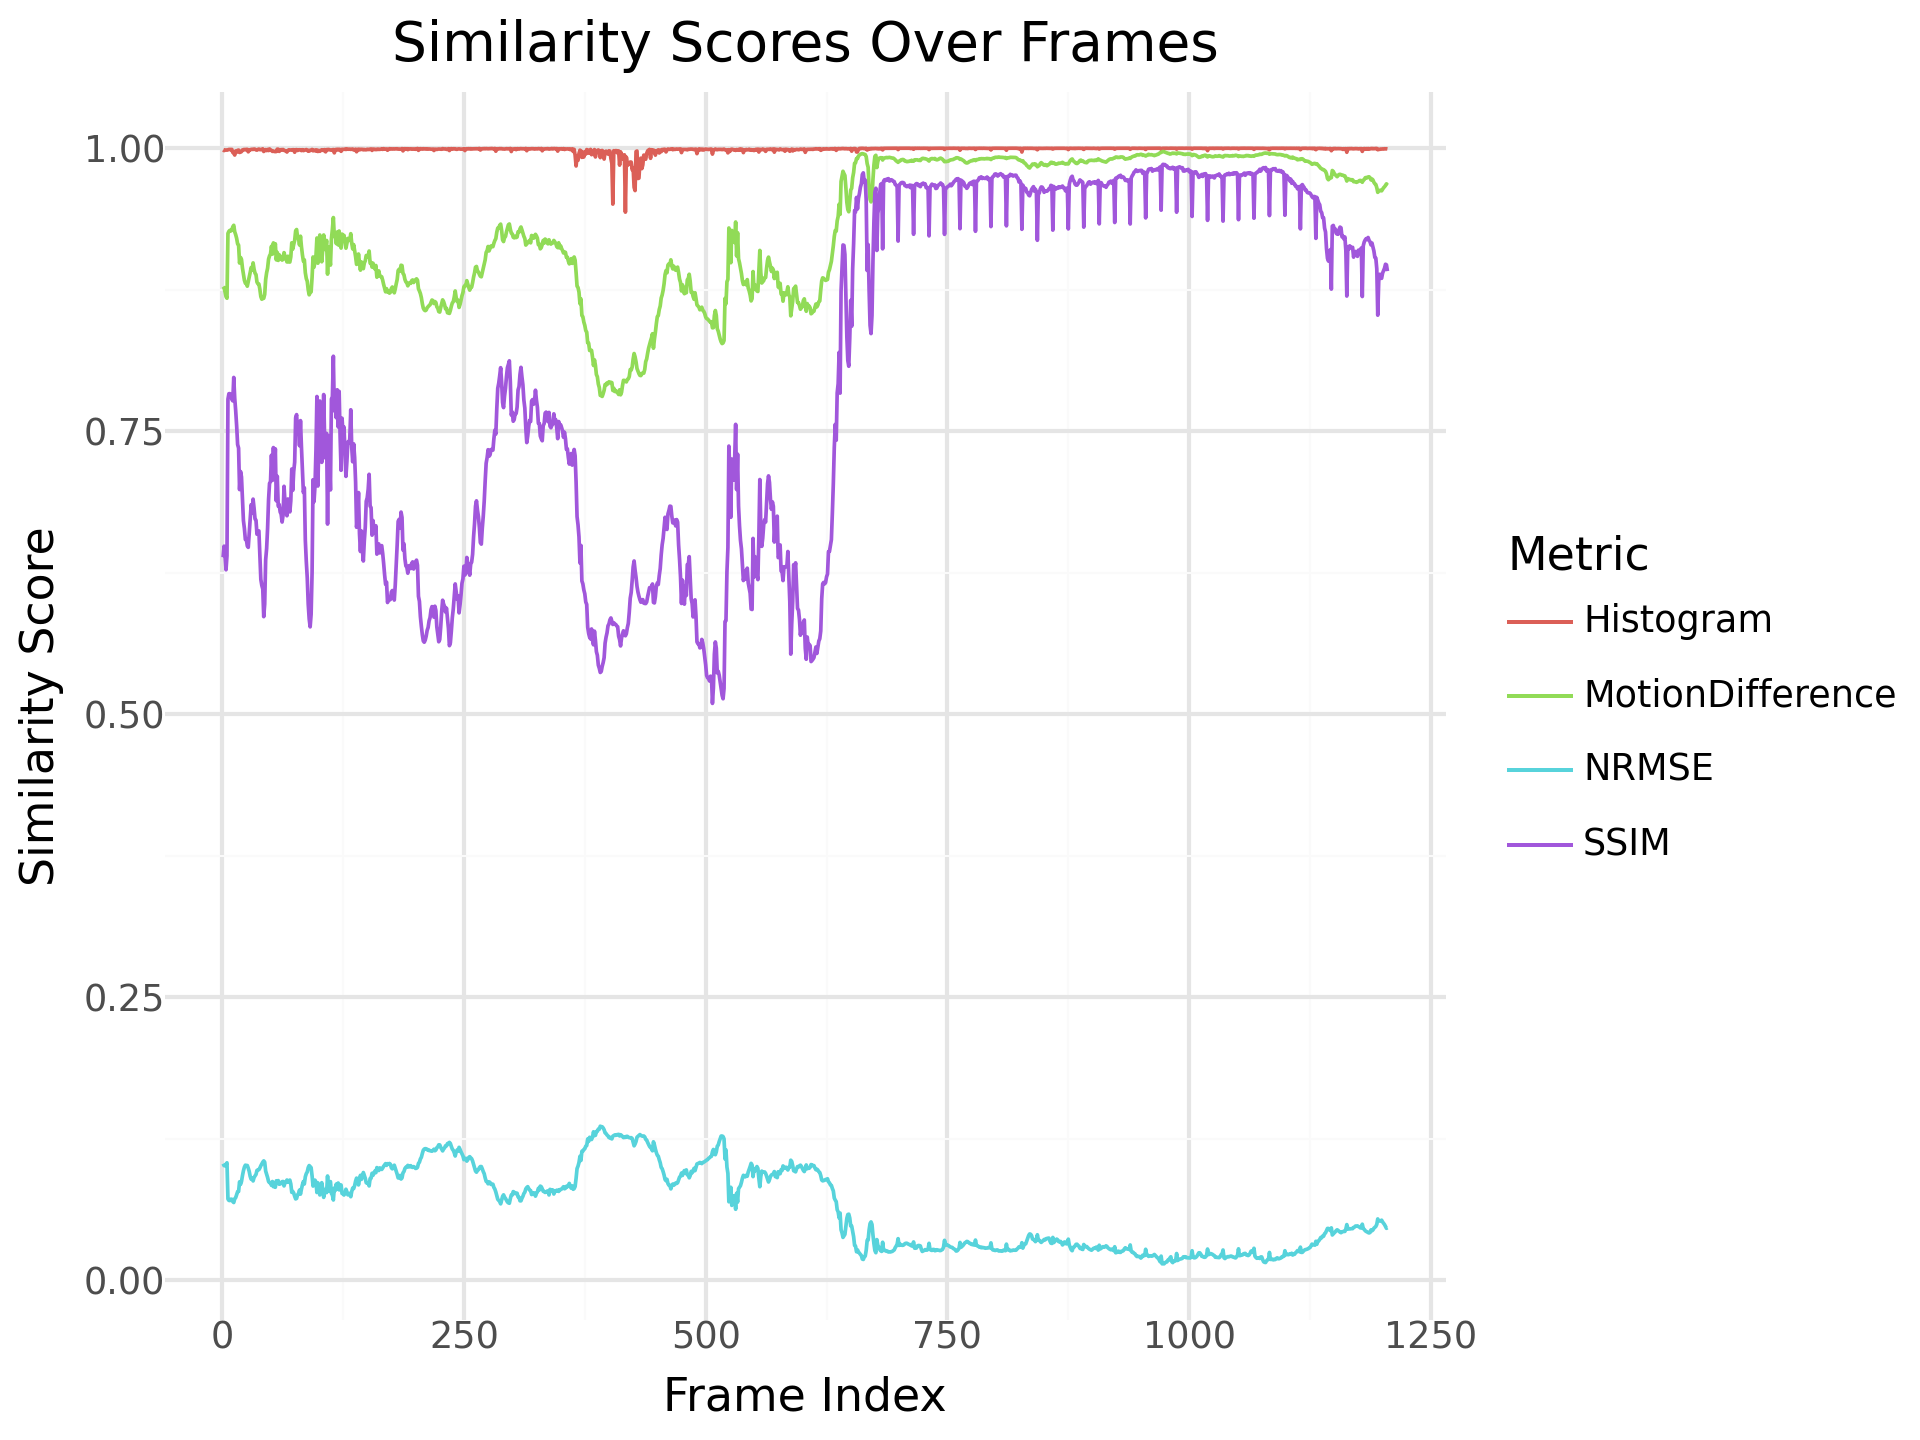

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: computation_time_over_frames.png


Plot saved as computation_time_over_frames.png


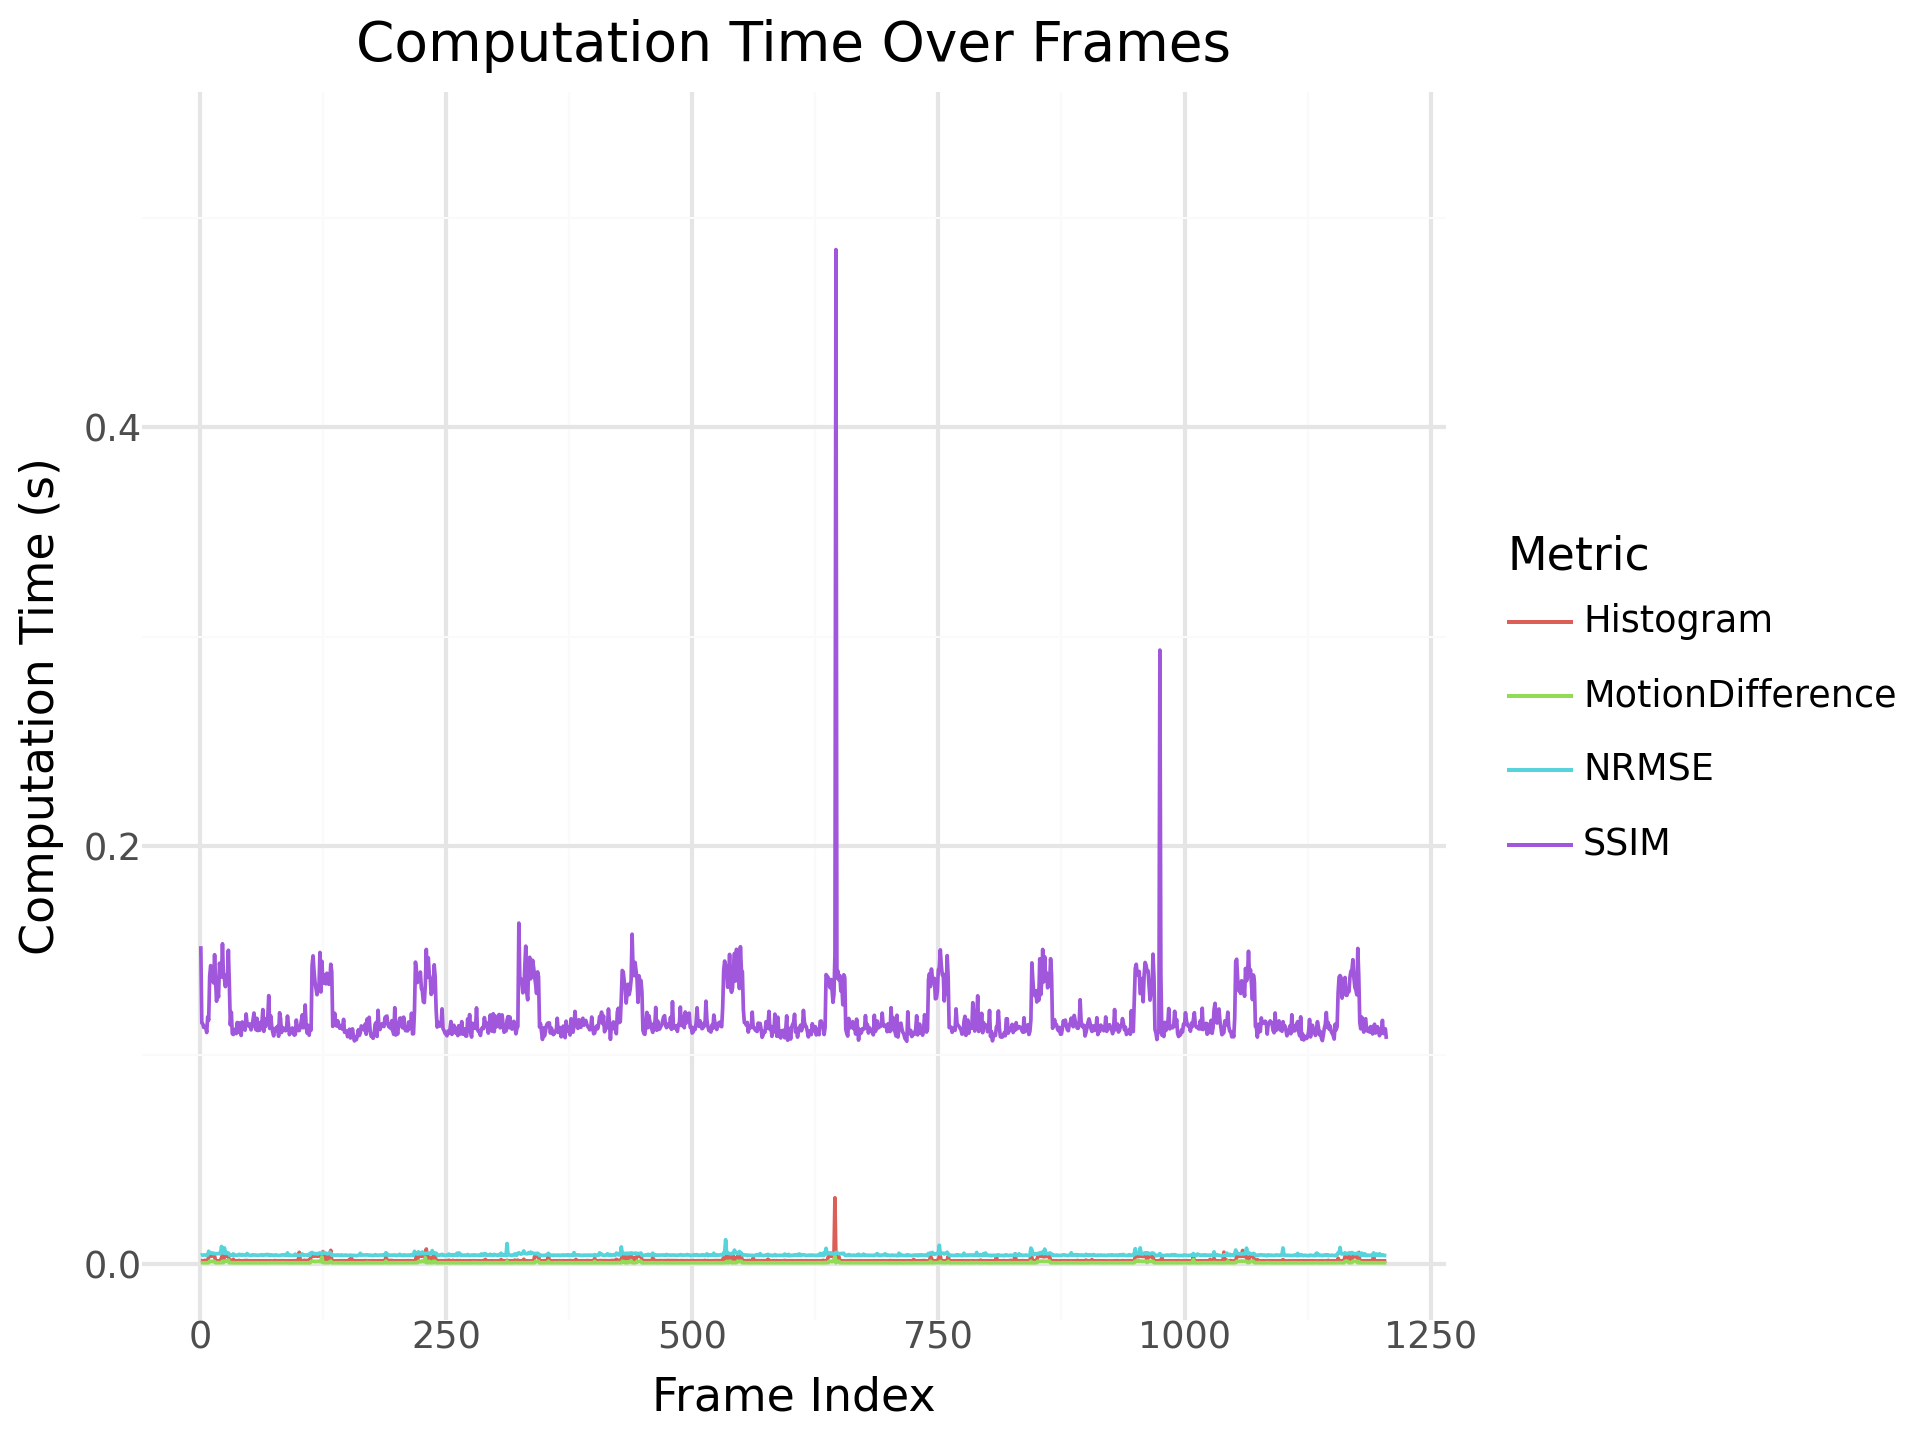

In [ ]:
# Experiment Run 5

import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, scale_y_continuous, scale_color_manual
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to install plotnine if not already installed
def install_plotnine():
    try:
        import plotnine
    except ImportError:
        import sys
        !{sys.executable} -m pip install plotnine

# Set the video path (update this to your video file path)
video_path = '/content/Input 1.mov'  # Change this to your video file path

# Verify if the video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found at path: {video_path}")

# Functions to compute different similarity metrics
def calculate_ssim(frame1, frame2):
    score, _ = ssim(frame1, frame2, full=True)
    return score

def calculate_nrmse(frame1, frame2):
    return np.sqrt(np.mean((frame1.astype("float") - frame2.astype("float")) ** 2)) / np.max(frame1)

def calculate_histogram_similarity(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def calculate_motion_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    non_zero_count = np.count_nonzero(diff)
    change_ratio = non_zero_count / frame1.size
    return 1 - change_ratio

# Function to read video frames
def get_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Loaded {frame_idx} frames...")
    cap.release()
    print(f"Total frames loaded: {len(frames)}")
    return frames

# Load frames
frames = get_video_frames(video_path)

# Check if frames are loaded; exit if no frames
if len(frames) < 2:
    raise ValueError("No frames loaded or not enough frames to compare.")

# Initialize lists to store similarity values and computation times
similarity_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}
time_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}

# Process each frame for each method and store similarity scores and computation times
frame_count = len(frames)
print("Starting similarity and computation time calculations...")
for i in range(1, frame_count):
    frame1, frame2 = frames[i - 1], frames[i]

    # Calculate similarity and timing for SSIM
    start_time = time.time()
    similarity_values['SSIM'].append(calculate_ssim(frame1, frame2))
    time_values['SSIM'].append(time.time() - start_time)

    # Calculate similarity and timing for NRMSE
    start_time = time.time()
    similarity_values['NRMSE'].append(calculate_nrmse(frame1, frame2))
    time_values['NRMSE'].append(time.time() - start_time)

    # Calculate similarity and timing for Histogram
    start_time = time.time()
    similarity_values['Histogram'].append(calculate_histogram_similarity(frame1, frame2))
    time_values['Histogram'].append(time.time() - start_time)

    # Calculate similarity and timing for Motion Difference
    start_time = time.time()
    similarity_values['MotionDifference'].append(calculate_motion_difference(frame1, frame2))
    time_values['MotionDifference'].append(time.time() - start_time)

    # Optional: Print progress every 100 frames
    if i % 100 == 0:
        print(f"Processed {i}/{frame_count - 1} frames...")

print("Similarity and computation time calculations completed.")

# Prepare DataFrames for plotting
frame_indices = list(range(1, frame_count))

# Create DataFrame for similarity scores
similarity_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': similarity_values['SSIM'],
    'NRMSE': similarity_values['NRMSE'],
    'Histogram': similarity_values['Histogram'],
    'MotionDifference': similarity_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Score")

# Create DataFrame for computation times
time_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': time_values['SSIM'],
    'NRMSE': time_values['NRMSE'],
    'Histogram': time_values['Histogram'],
    'MotionDifference': time_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Time")

# Calculate total time for each method and display in a bar chart
total_times = {method: sum(times) for method, times in time_values.items()}
total_time_df = pd.DataFrame(list(total_times.items()), columns=['Metric', 'TotalTime'])

# Define the new color palette you provided
custom_palette = ['#99dfd8', '#b7cdb0', '#74a084', '#14413c']

# Plot similarity scores using ggplot
similarity_plot = (
    ggplot(similarity_df, aes(x="Frame", y="Score", color="Metric")) +
    geom_line() +
    labs(title="Similarity Scores Over Frames", x="Frame Index", y="Similarity Score") +
    theme_minimal()
)

# Plot computation times with y-axis adjustment for clarity
time_plot = (
    ggplot(time_df, aes(x="Frame", y="Time", color="Metric")) +
    geom_line() +
    labs(title="Computation Time Over Frames", x="Frame Index", y="Computation Time (s)") +
    theme_minimal() +
    scale_y_continuous(limits=(0, max(time_df['Time']) * 1.1))  # Adjust y-axis for better visibility
)

# Plot total computation time with a y-axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
fig.subplots_adjust(hspace=0.05)

# Define y-axis limits for the break
lower_limit = 0
upper_limit = 10
middle_gap_start = 120
middle_gap_end = max(total_times.values()) * 1.1

# Plot the upper part of the y-axis
ax1.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax1.set_ylim(middle_gap_start, middle_gap_end)
ax1.set_ylabel("Total Time (s)")
ax1.spines['bottom'].set_visible(False)

# Plot the lower part of the y-axis
ax2.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax2.set_ylim(lower_limit, upper_limit)
ax2.set_xlabel("Similarity Method")
ax2.set_ylabel("Total Time (s)")

# Add diagonal lines to indicate the y-axis break
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Label each bar with the total time value
for i, v in enumerate(total_times.values()):
    if v > middle_gap_start:
        ax1.text(i, v + max(total_times.values()) * 0.02, f"{v:.2f}", ha='center', va='bottom')
    else:
        ax2.text(i, v + upper_limit * 0.02, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.suptitle("Total Computation Time for Each Similarity Method with Y-Axis Break")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_computation_time_y_axis_break_custom_palette.png", dpi=300)
plt.show()

# Function to create a combined plot for each similarity metric and its computation time
def plot_similarity_and_time(similarity_df, time_df):
    metrics = ['SSIM', 'NRMSE', 'Histogram', 'MotionDifference']

    fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics):
        # Similarity plot
        similarity_metric_df = similarity_df[similarity_df['Metric'] == metric]
        axes[i, 0].plot(similarity_metric_df['Frame'], similarity_metric_df['Score'], color=custom_palette[i])
        axes[i, 0].set_title(f"{metric} Similarity")
        axes[i, 0].set_xlabel("Frame Index")
        axes[i, 0].set_ylabel("Similarity Score")

        # Computation time plot
        time_metric_df = time_df[time_df['Metric'] == metric]
        axes[i, 1].plot(time_metric_df['Frame'], time_metric_df['Time'], color=custom_palette[i])
        axes[i, 1].set_title(f"{metric} Computation Time")
        axes[i, 1].set_xlabel("Frame Index")
        axes[i, 1].set_ylabel("Computation Time (s)")

    plt.tight_layout()
    plt.suptitle("Similarity and Computation Time for Each Metric", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the similarity and computation time side by side for each metric
plot_similarity_and_time(similarity_df, time_df)

# Function to save and display plotnine plots
def save_and_display_plot(plot, filename):
    # Save the plot as a PNG file
    plot.save(filename, dpi=300)
    print(f"Plot saved as {filename}")

    # Attempt to display the plot if in a Jupyter environment
    try:
        from IPython.display import Image, display
        display(Image(filename=filename))
    except ImportError:
        print(f"Cannot display {filename} directly. Please open the file to view the plot.")

# Save and display the plots
save_and_display_plot(similarity_plot, "similarity_scores_over_frames.png")
save_and_display_plot(time_plot, "computation_time_over_frames.png")

Loaded 100 frames...
Loaded 200 frames...
Loaded 300 frames...
Loaded 400 frames...
Loaded 500 frames...
Loaded 600 frames...
Loaded 700 frames...
Loaded 800 frames...
Loaded 900 frames...
Loaded 1000 frames...
Loaded 1100 frames...
Loaded 1200 frames...
Total frames loaded: 1206
Starting similarity and computation time calculations...
Processed 100/1205 frames...
Processed 200/1205 frames...
Processed 300/1205 frames...
Processed 400/1205 frames...
Processed 500/1205 frames...
Processed 600/1205 frames...
Processed 700/1205 frames...
Processed 800/1205 frames...
Processed 900/1205 frames...
Processed 1000/1205 frames...
Processed 1100/1205 frames...
Processed 1200/1205 frames...
Similarity and computation time calculations completed.


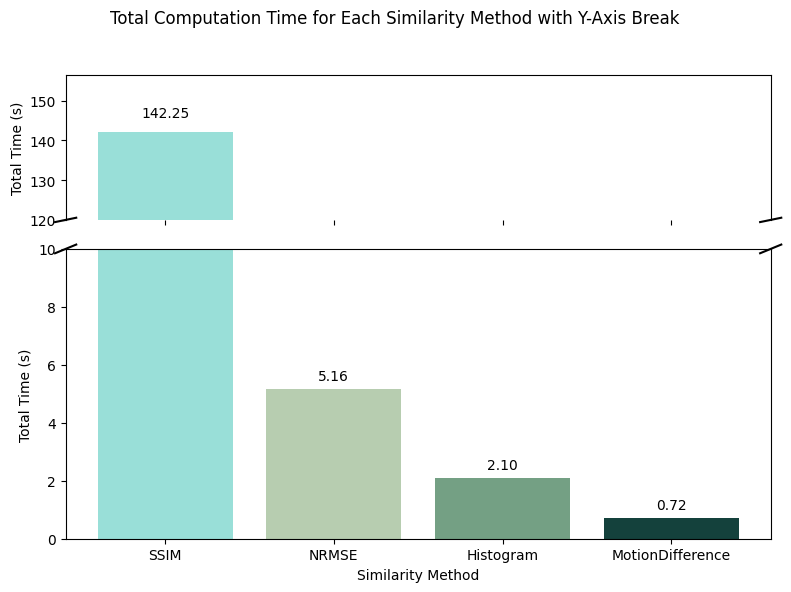

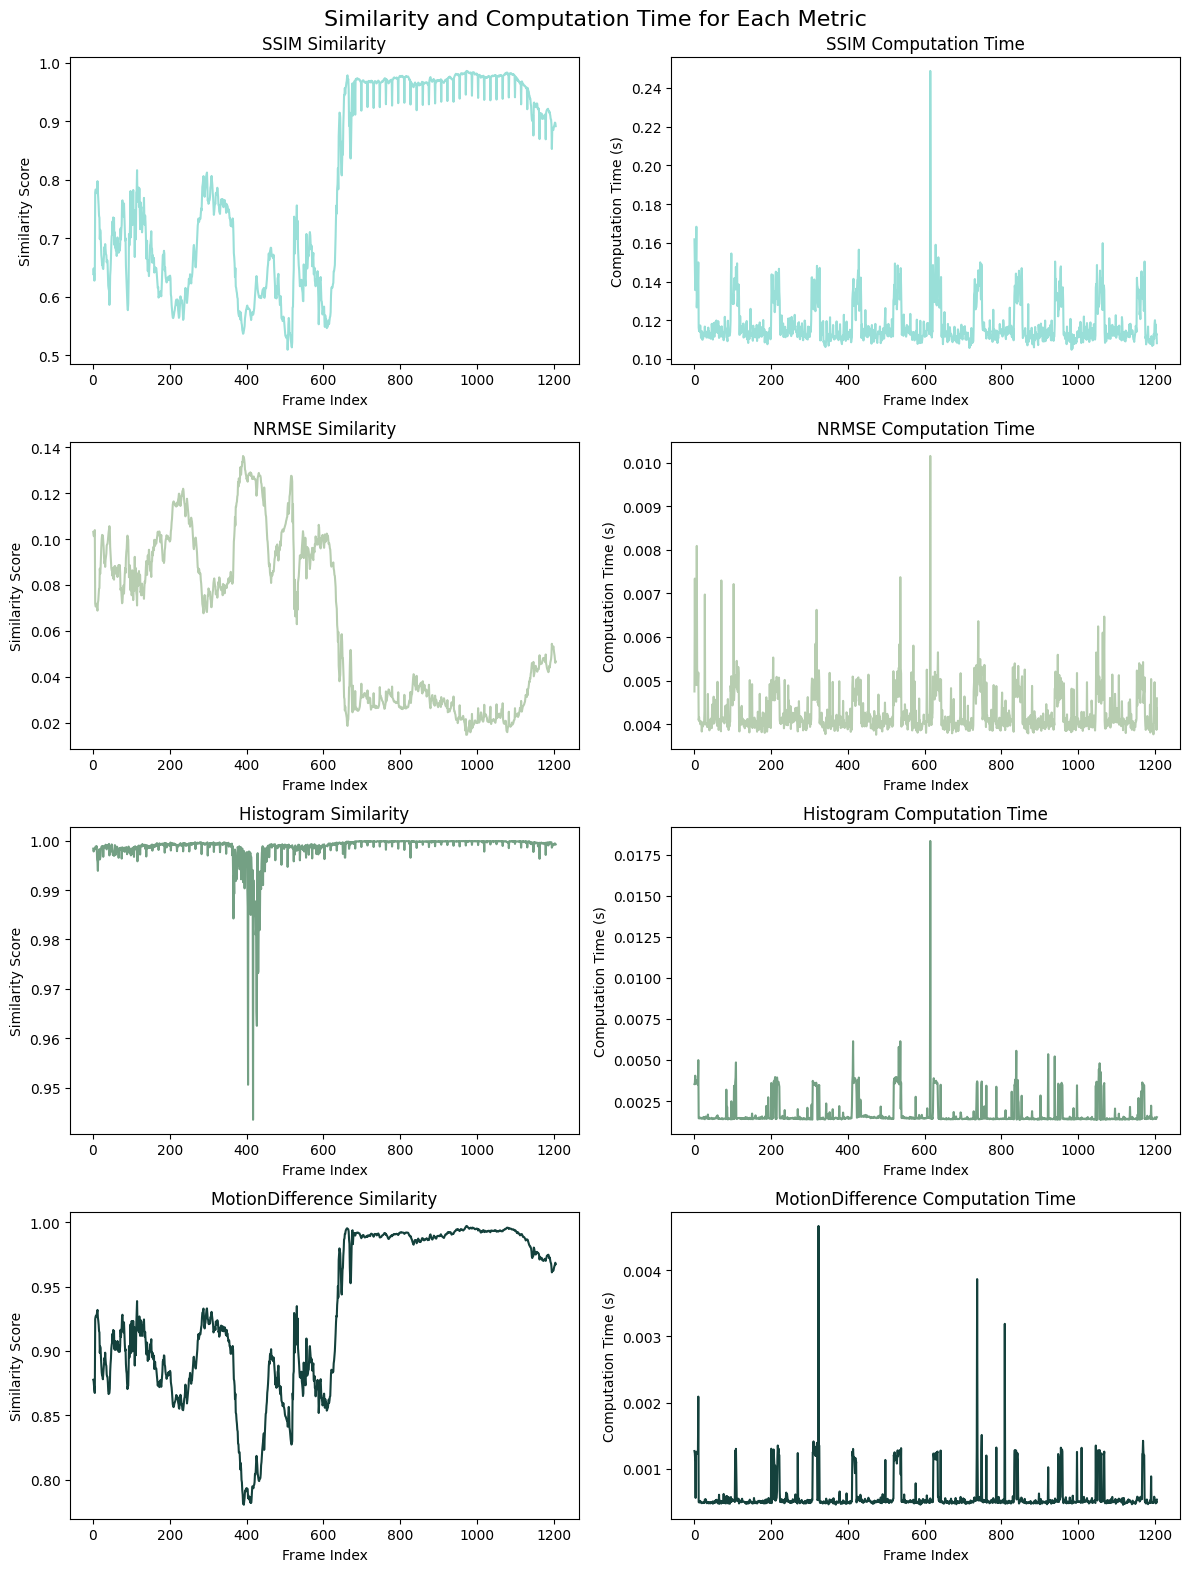

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: similarity_scores_over_frames.png


Plot saved as similarity_scores_over_frames.png


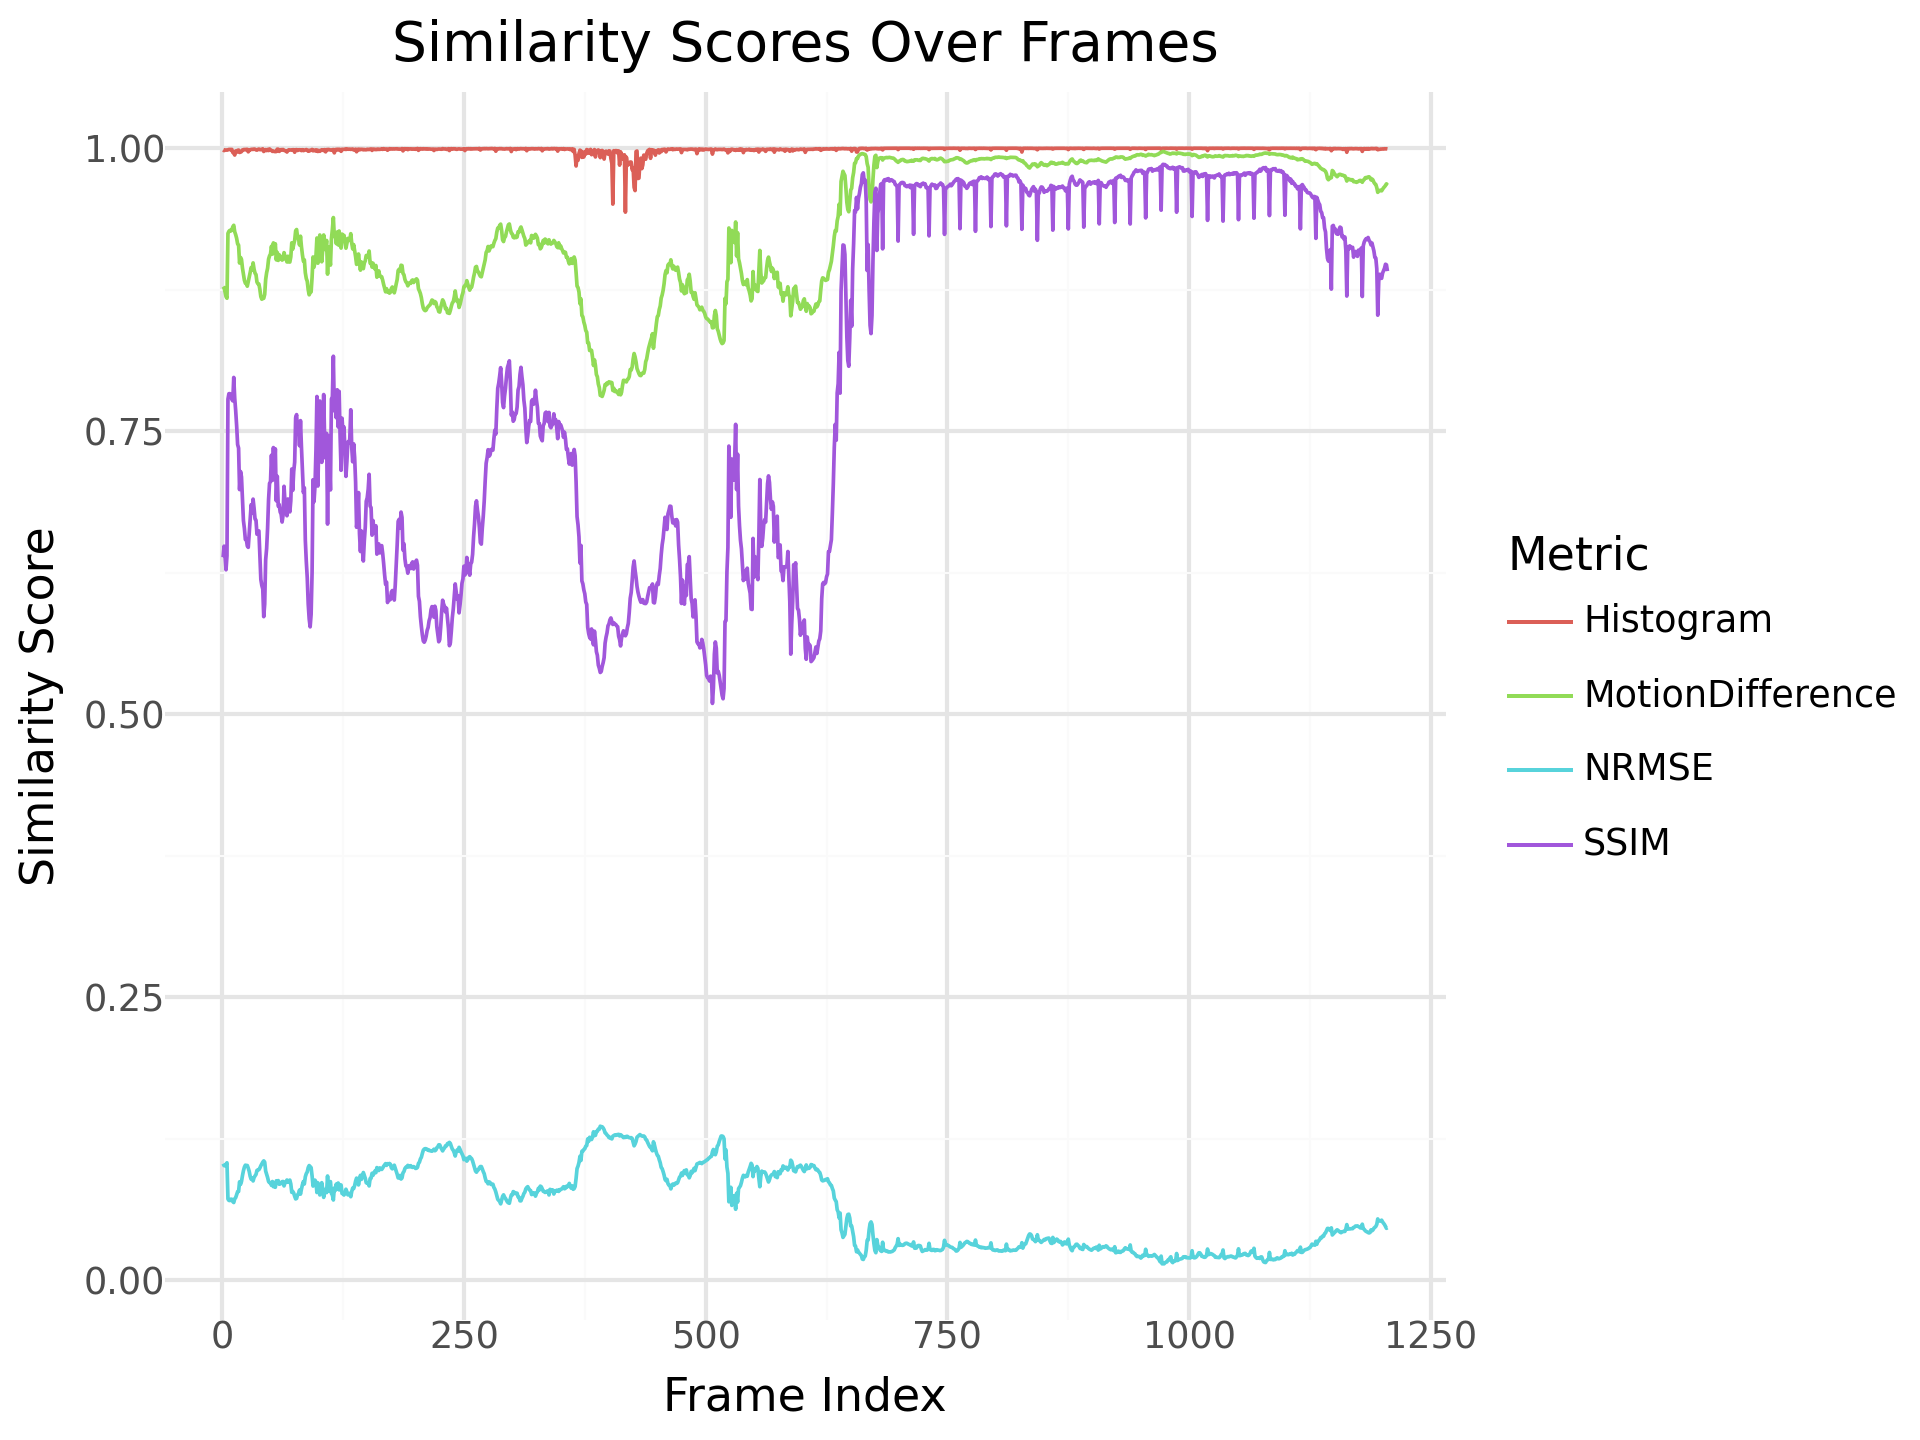

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: computation_time_over_frames.png


Plot saved as computation_time_over_frames.png


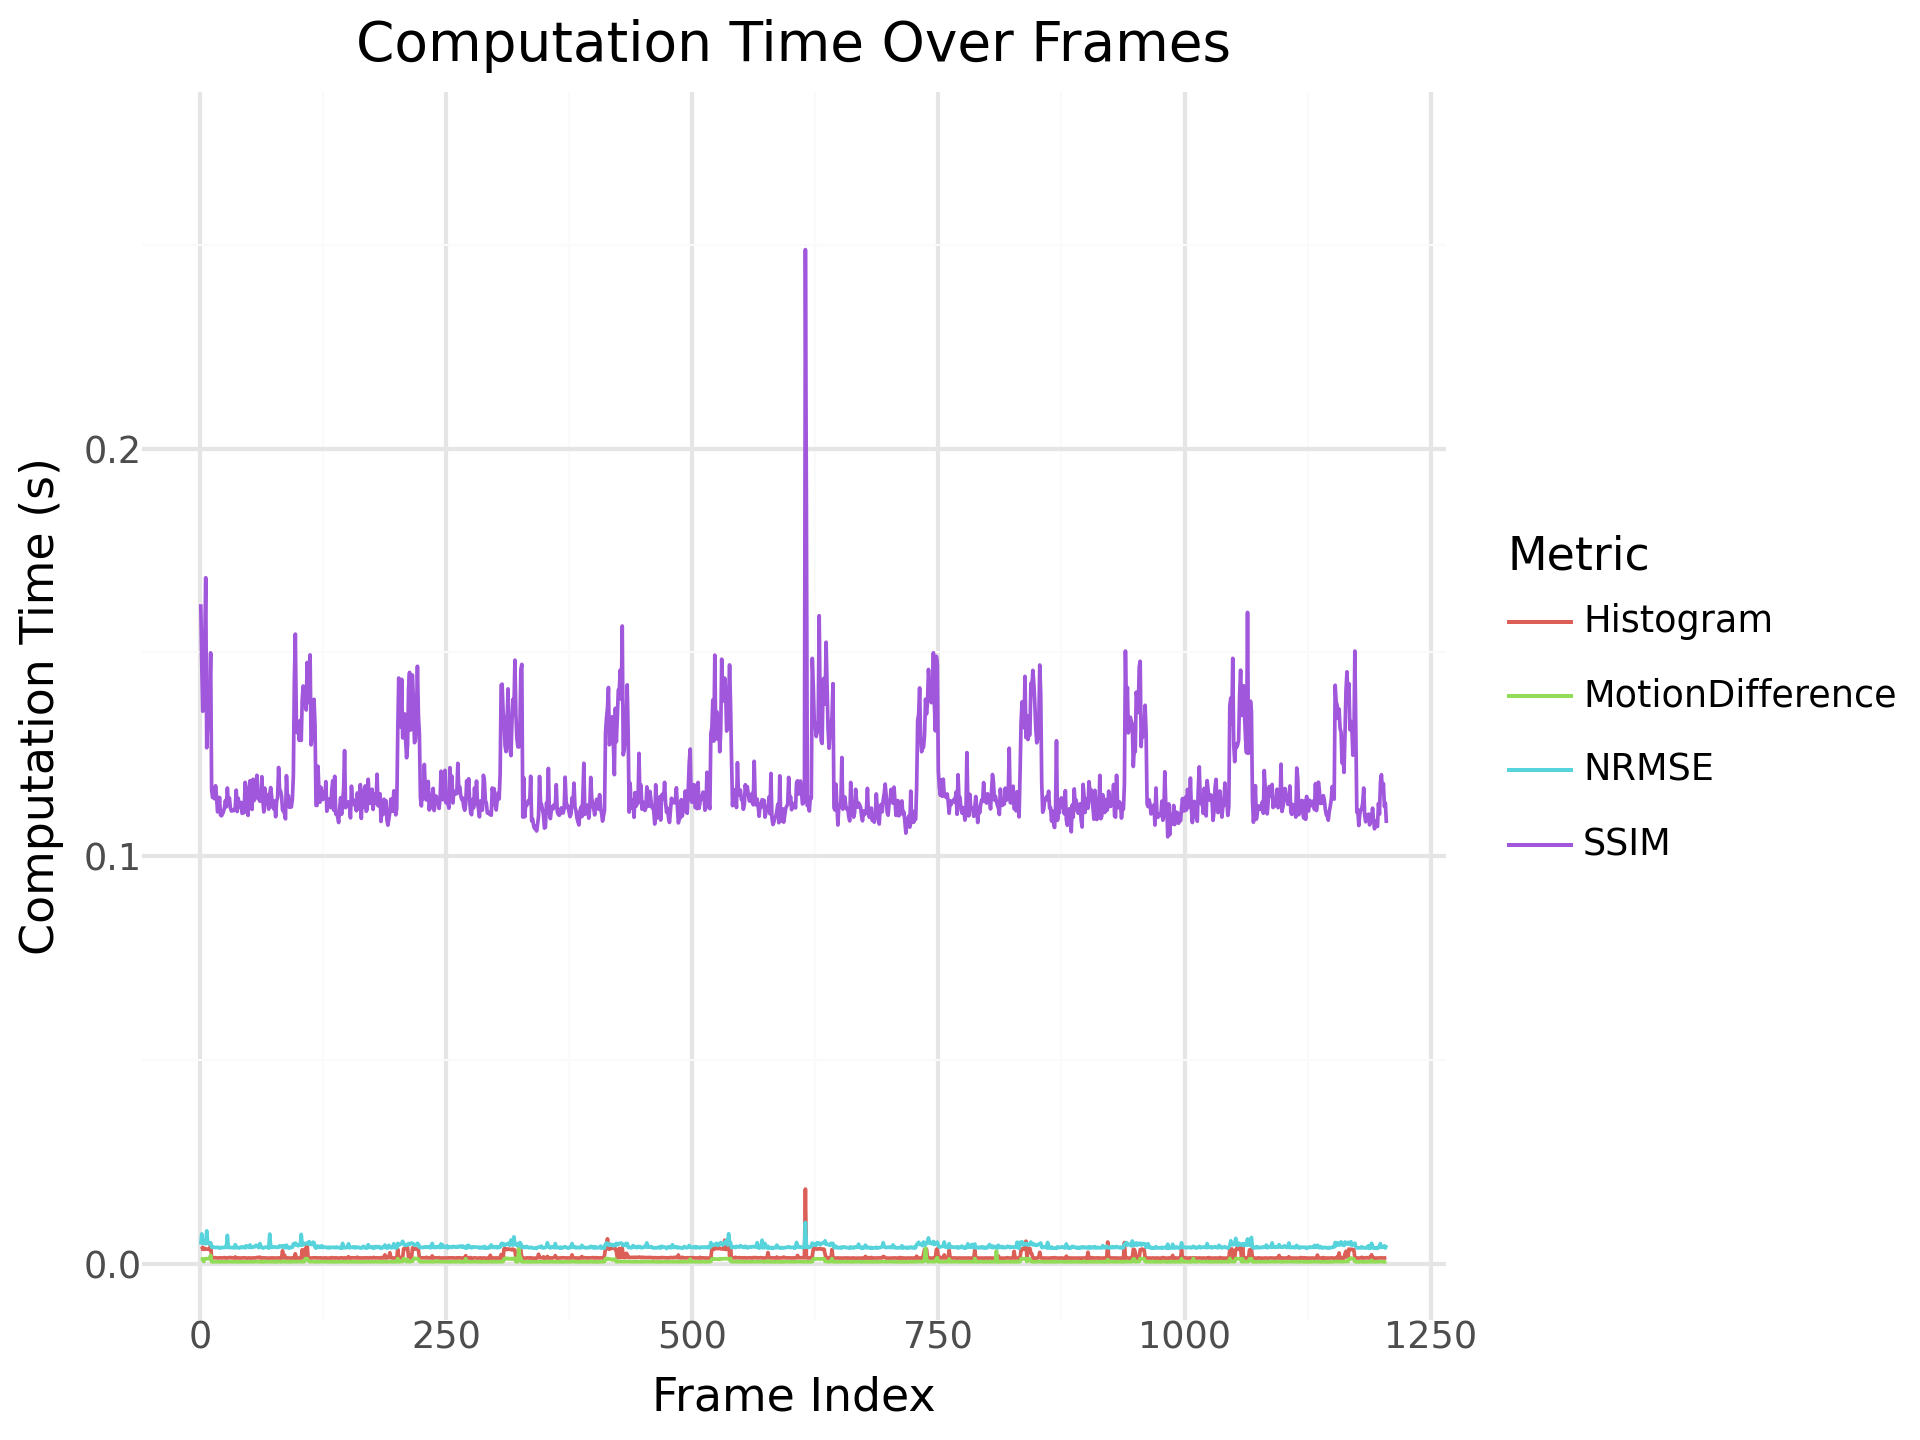

In [ ]:
# Experiment Run 6

import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, scale_y_continuous, scale_color_manual
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to install plotnine if not already installed
def install_plotnine():
    try:
        import plotnine
    except ImportError:
        import sys
        !{sys.executable} -m pip install plotnine

# Set the video path (update this to your video file path)
video_path = '/content/Input 1.mov'  # Change this to your video file path

# Verify if the video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found at path: {video_path}")

# Functions to compute different similarity metrics
def calculate_ssim(frame1, frame2):
    score, _ = ssim(frame1, frame2, full=True)
    return score

def calculate_nrmse(frame1, frame2):
    return np.sqrt(np.mean((frame1.astype("float") - frame2.astype("float")) ** 2)) / np.max(frame1)

def calculate_histogram_similarity(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def calculate_motion_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    non_zero_count = np.count_nonzero(diff)
    change_ratio = non_zero_count / frame1.size
    return 1 - change_ratio

# Function to read video frames
def get_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Loaded {frame_idx} frames...")
    cap.release()
    print(f"Total frames loaded: {len(frames)}")
    return frames

# Load frames
frames = get_video_frames(video_path)

# Check if frames are loaded; exit if no frames
if len(frames) < 2:
    raise ValueError("No frames loaded or not enough frames to compare.")

# Initialize lists to store similarity values and computation times
similarity_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}
time_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}

# Process each frame for each method and store similarity scores and computation times
frame_count = len(frames)
print("Starting similarity and computation time calculations...")
for i in range(1, frame_count):
    frame1, frame2 = frames[i - 1], frames[i]

    # Calculate similarity and timing for SSIM
    start_time = time.time()
    similarity_values['SSIM'].append(calculate_ssim(frame1, frame2))
    time_values['SSIM'].append(time.time() - start_time)

    # Calculate similarity and timing for NRMSE
    start_time = time.time()
    similarity_values['NRMSE'].append(calculate_nrmse(frame1, frame2))
    time_values['NRMSE'].append(time.time() - start_time)

    # Calculate similarity and timing for Histogram
    start_time = time.time()
    similarity_values['Histogram'].append(calculate_histogram_similarity(frame1, frame2))
    time_values['Histogram'].append(time.time() - start_time)

    # Calculate similarity and timing for Motion Difference
    start_time = time.time()
    similarity_values['MotionDifference'].append(calculate_motion_difference(frame1, frame2))
    time_values['MotionDifference'].append(time.time() - start_time)

    # Optional: Print progress every 100 frames
    if i % 100 == 0:
        print(f"Processed {i}/{frame_count - 1} frames...")

print("Similarity and computation time calculations completed.")

# Prepare DataFrames for plotting
frame_indices = list(range(1, frame_count))

# Create DataFrame for similarity scores
similarity_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': similarity_values['SSIM'],
    'NRMSE': similarity_values['NRMSE'],
    'Histogram': similarity_values['Histogram'],
    'MotionDifference': similarity_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Score")

# Create DataFrame for computation times
time_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': time_values['SSIM'],
    'NRMSE': time_values['NRMSE'],
    'Histogram': time_values['Histogram'],
    'MotionDifference': time_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Time")

# Calculate total time for each method and display in a bar chart
total_times = {method: sum(times) for method, times in time_values.items()}
total_time_df = pd.DataFrame(list(total_times.items()), columns=['Metric', 'TotalTime'])

# Define the new color palette you provided
custom_palette = ['#99dfd8', '#b7cdb0', '#74a084', '#14413c']

# Plot similarity scores using ggplot
similarity_plot = (
    ggplot(similarity_df, aes(x="Frame", y="Score", color="Metric")) +
    geom_line() +
    labs(title="Similarity Scores Over Frames", x="Frame Index", y="Similarity Score") +
    theme_minimal()
)

# Plot computation times with y-axis adjustment for clarity
time_plot = (
    ggplot(time_df, aes(x="Frame", y="Time", color="Metric")) +
    geom_line() +
    labs(title="Computation Time Over Frames", x="Frame Index", y="Computation Time (s)") +
    theme_minimal() +
    scale_y_continuous(limits=(0, max(time_df['Time']) * 1.1))  # Adjust y-axis for better visibility
)

# Plot total computation time with a y-axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
fig.subplots_adjust(hspace=0.05)

# Define y-axis limits for the break
lower_limit = 0
upper_limit = 10
middle_gap_start = 120
middle_gap_end = max(total_times.values()) * 1.1

# Plot the upper part of the y-axis
ax1.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax1.set_ylim(middle_gap_start, middle_gap_end)
ax1.set_ylabel("Total Time (s)")
ax1.spines['bottom'].set_visible(False)

# Plot the lower part of the y-axis
ax2.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax2.set_ylim(lower_limit, upper_limit)
ax2.set_xlabel("Similarity Method")
ax2.set_ylabel("Total Time (s)")

# Add diagonal lines to indicate the y-axis break
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Label each bar with the total time value
for i, v in enumerate(total_times.values()):
    if v > middle_gap_start:
        ax1.text(i, v + max(total_times.values()) * 0.02, f"{v:.2f}", ha='center', va='bottom')
    else:
        ax2.text(i, v + upper_limit * 0.02, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.suptitle("Total Computation Time for Each Similarity Method with Y-Axis Break")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_computation_time_y_axis_break_custom_palette.png", dpi=300)
plt.show()

# Function to create a combined plot for each similarity metric and its computation time
def plot_similarity_and_time(similarity_df, time_df):
    metrics = ['SSIM', 'NRMSE', 'Histogram', 'MotionDifference']

    fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics):
        # Similarity plot
        similarity_metric_df = similarity_df[similarity_df['Metric'] == metric]
        axes[i, 0].plot(similarity_metric_df['Frame'], similarity_metric_df['Score'], color=custom_palette[i])
        axes[i, 0].set_title(f"{metric} Similarity")
        axes[i, 0].set_xlabel("Frame Index")
        axes[i, 0].set_ylabel("Similarity Score")

        # Computation time plot
        time_metric_df = time_df[time_df['Metric'] == metric]
        axes[i, 1].plot(time_metric_df['Frame'], time_metric_df['Time'], color=custom_palette[i])
        axes[i, 1].set_title(f"{metric} Computation Time")
        axes[i, 1].set_xlabel("Frame Index")
        axes[i, 1].set_ylabel("Computation Time (s)")

    plt.tight_layout()
    plt.suptitle("Similarity and Computation Time for Each Metric", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the similarity and computation time side by side for each metric
plot_similarity_and_time(similarity_df, time_df)

# Function to save and display plotnine plots
def save_and_display_plot(plot, filename):
    # Save the plot as a PNG file
    plot.save(filename, dpi=300)
    print(f"Plot saved as {filename}")

    # Attempt to display the plot if in a Jupyter environment
    try:
        from IPython.display import Image, display
        display(Image(filename=filename))
    except ImportError:
        print(f"Cannot display {filename} directly. Please open the file to view the plot.")

# Save and display the plots
save_and_display_plot(similarity_plot, "similarity_scores_over_frames.png")
save_and_display_plot(time_plot, "computation_time_over_frames.png")

Loaded 100 frames...
Loaded 200 frames...
Loaded 300 frames...
Loaded 400 frames...
Loaded 500 frames...
Loaded 600 frames...
Loaded 700 frames...
Loaded 800 frames...
Loaded 900 frames...
Loaded 1000 frames...
Loaded 1100 frames...
Loaded 1200 frames...
Total frames loaded: 1206
Starting similarity and computation time calculations...
Processed 100/1205 frames...
Processed 200/1205 frames...
Processed 300/1205 frames...
Processed 400/1205 frames...
Processed 500/1205 frames...
Processed 600/1205 frames...
Processed 700/1205 frames...
Processed 800/1205 frames...
Processed 900/1205 frames...
Processed 1000/1205 frames...
Processed 1100/1205 frames...
Processed 1200/1205 frames...
Similarity and computation time calculations completed.


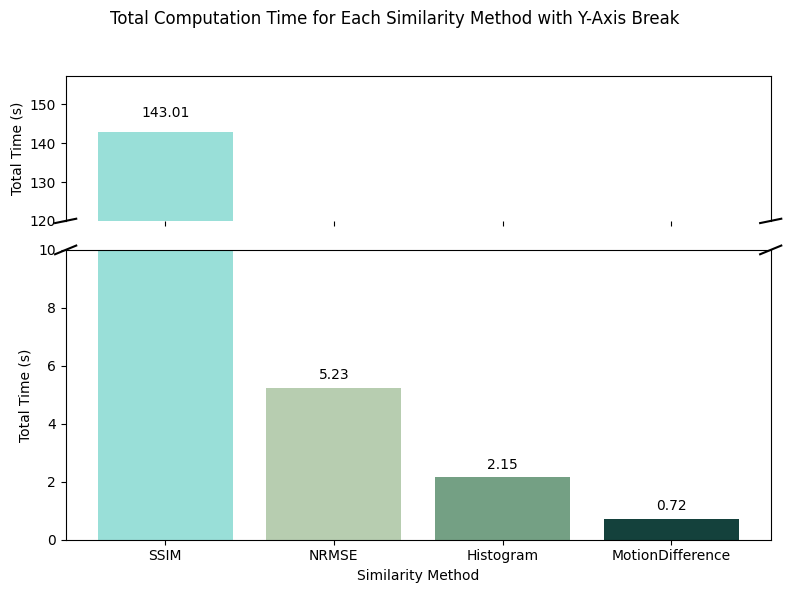

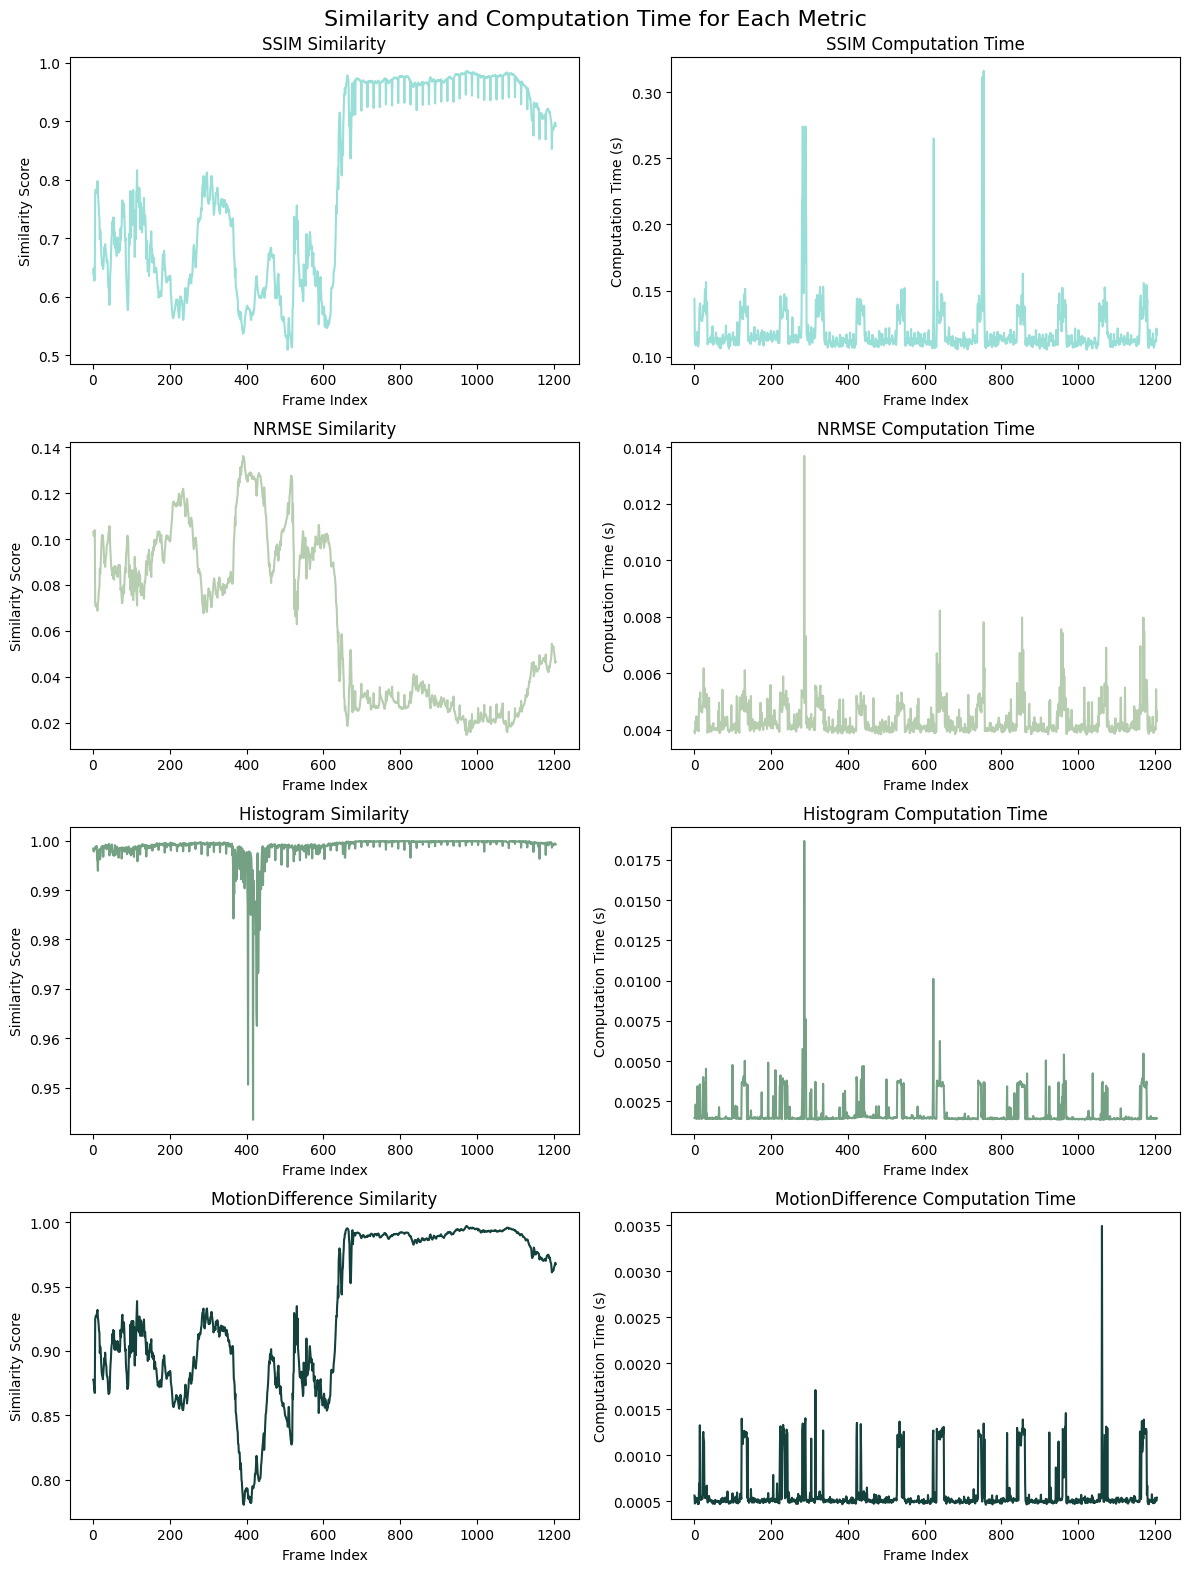

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: similarity_scores_over_frames.png


Plot saved as similarity_scores_over_frames.png


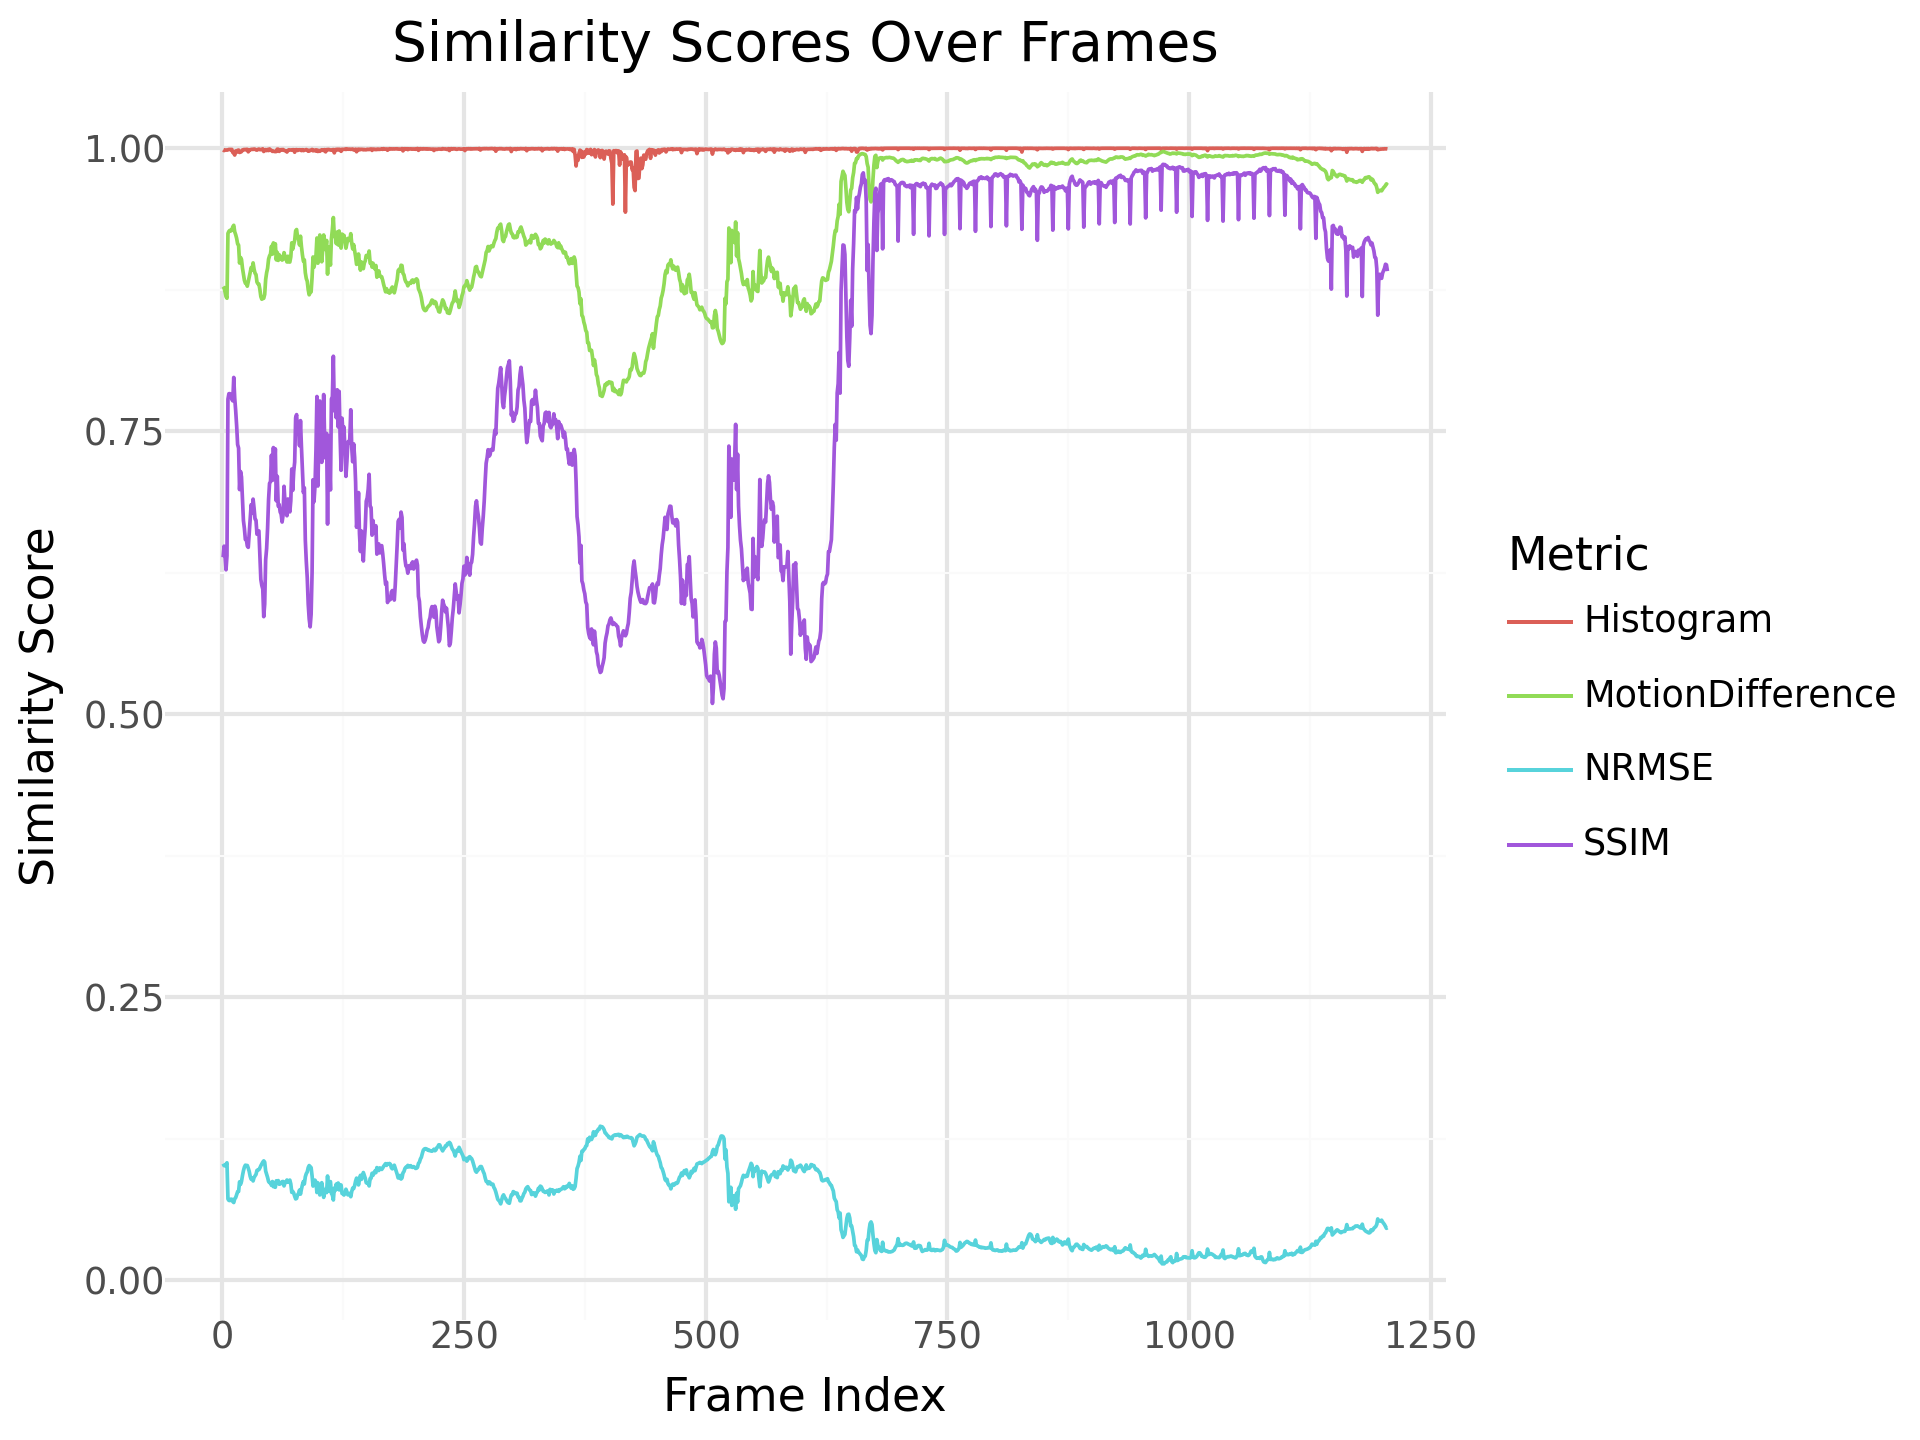

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: computation_time_over_frames.png


Plot saved as computation_time_over_frames.png


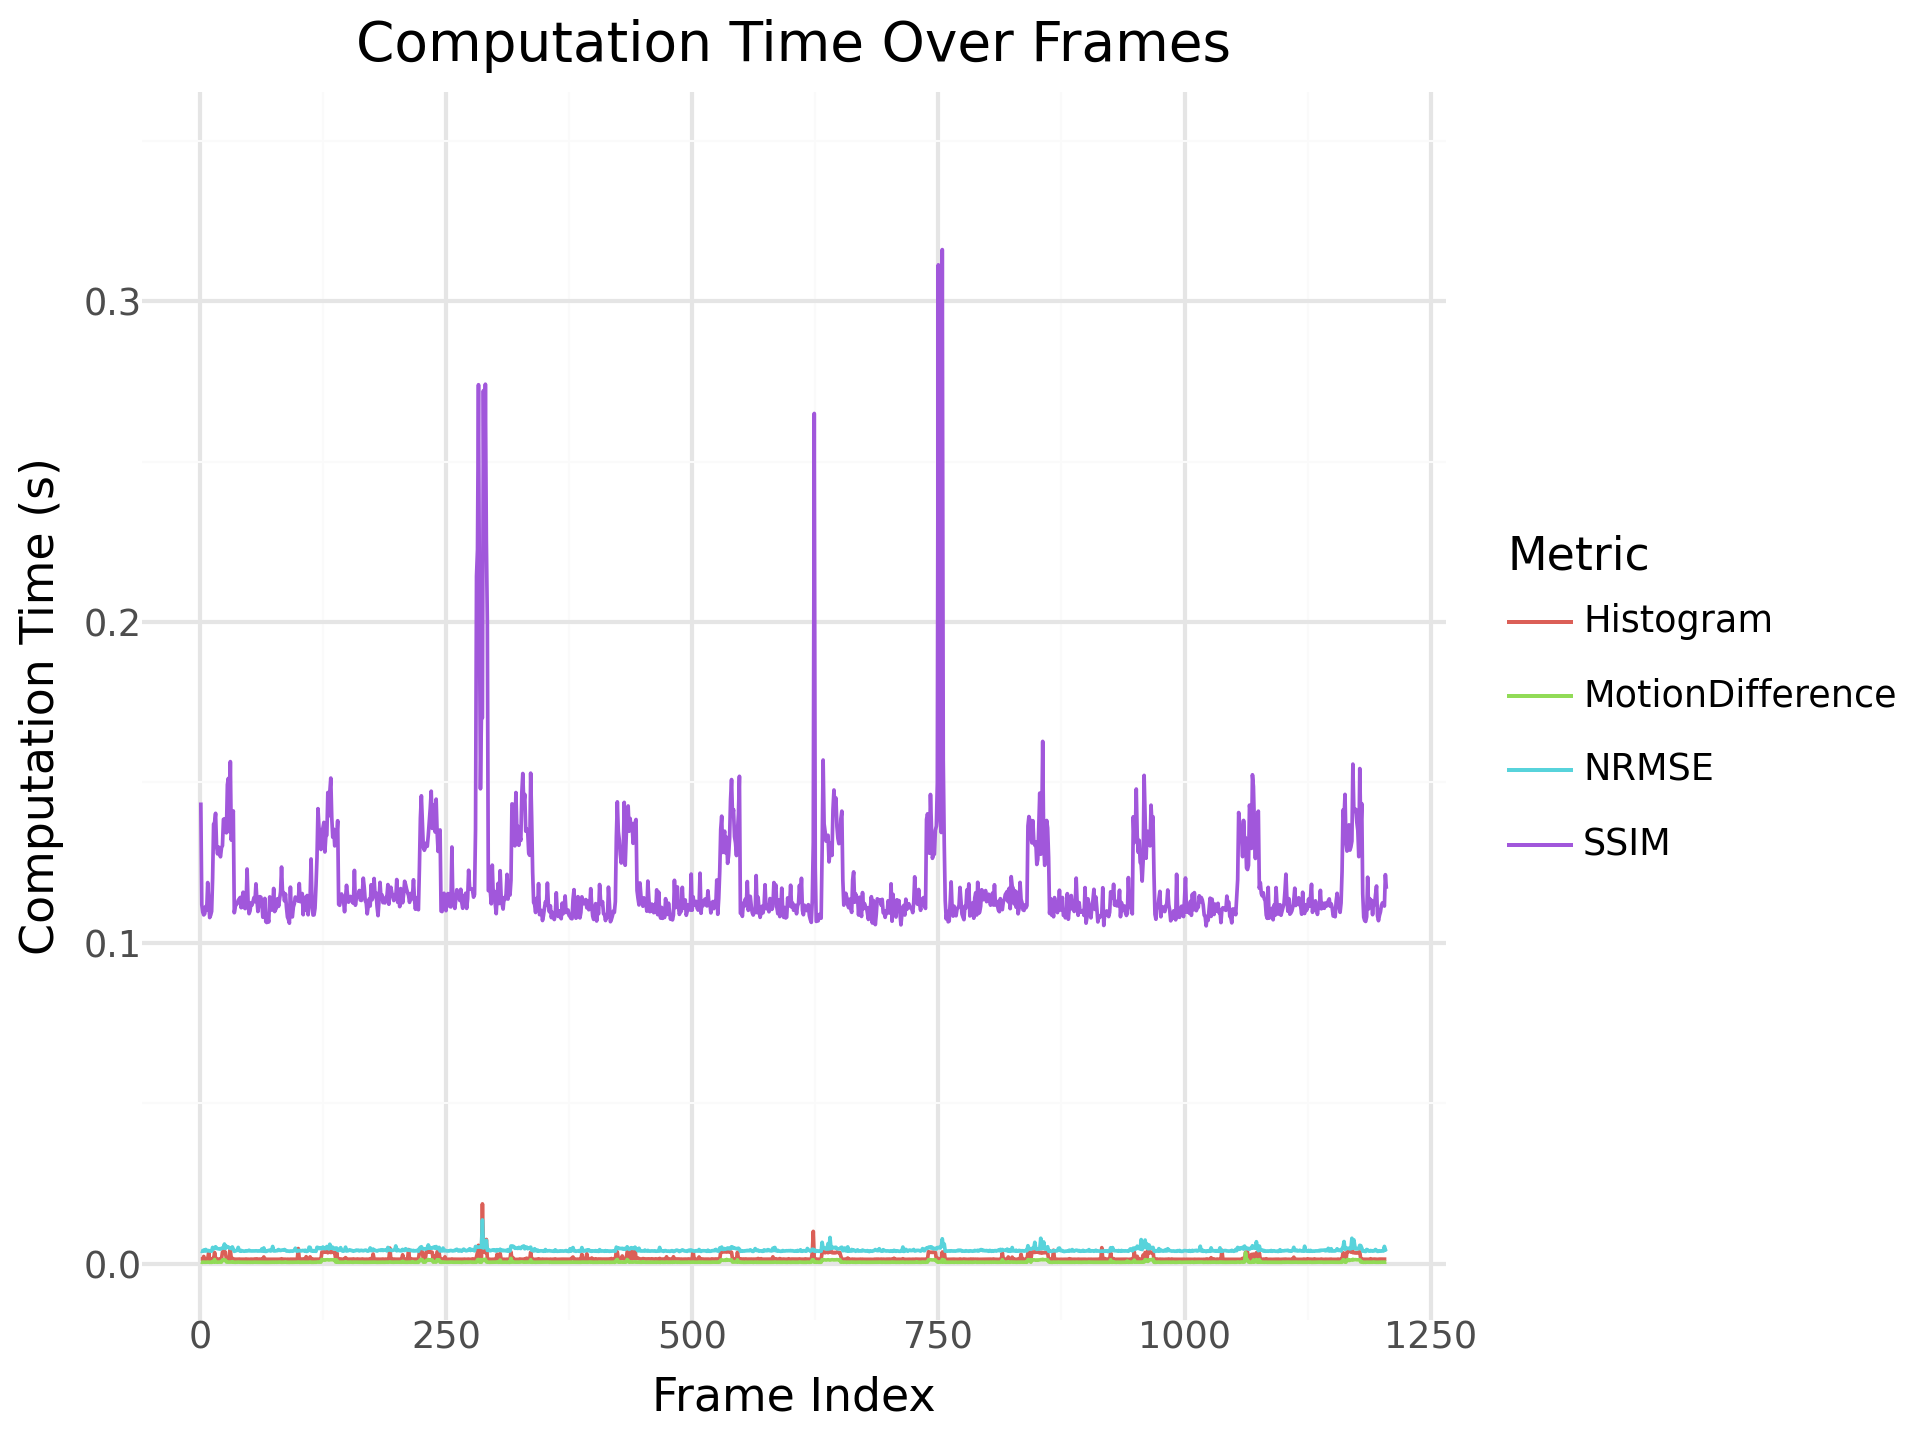

In [ ]:
# Experiment Run 7

import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, scale_y_continuous, scale_color_manual
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to install plotnine if not already installed
def install_plotnine():
    try:
        import plotnine
    except ImportError:
        import sys
        !{sys.executable} -m pip install plotnine

# Set the video path (update this to your video file path)
video_path = '/content/Input 1.mov'  # Change this to your video file path

# Verify if the video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found at path: {video_path}")

# Functions to compute different similarity metrics
def calculate_ssim(frame1, frame2):
    score, _ = ssim(frame1, frame2, full=True)
    return score

def calculate_nrmse(frame1, frame2):
    return np.sqrt(np.mean((frame1.astype("float") - frame2.astype("float")) ** 2)) / np.max(frame1)

def calculate_histogram_similarity(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def calculate_motion_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    non_zero_count = np.count_nonzero(diff)
    change_ratio = non_zero_count / frame1.size
    return 1 - change_ratio

# Function to read video frames
def get_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Loaded {frame_idx} frames...")
    cap.release()
    print(f"Total frames loaded: {len(frames)}")
    return frames

# Load frames
frames = get_video_frames(video_path)

# Check if frames are loaded; exit if no frames
if len(frames) < 2:
    raise ValueError("No frames loaded or not enough frames to compare.")

# Initialize lists to store similarity values and computation times
similarity_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}
time_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}

# Process each frame for each method and store similarity scores and computation times
frame_count = len(frames)
print("Starting similarity and computation time calculations...")
for i in range(1, frame_count):
    frame1, frame2 = frames[i - 1], frames[i]

    # Calculate similarity and timing for SSIM
    start_time = time.time()
    similarity_values['SSIM'].append(calculate_ssim(frame1, frame2))
    time_values['SSIM'].append(time.time() - start_time)

    # Calculate similarity and timing for NRMSE
    start_time = time.time()
    similarity_values['NRMSE'].append(calculate_nrmse(frame1, frame2))
    time_values['NRMSE'].append(time.time() - start_time)

    # Calculate similarity and timing for Histogram
    start_time = time.time()
    similarity_values['Histogram'].append(calculate_histogram_similarity(frame1, frame2))
    time_values['Histogram'].append(time.time() - start_time)

    # Calculate similarity and timing for Motion Difference
    start_time = time.time()
    similarity_values['MotionDifference'].append(calculate_motion_difference(frame1, frame2))
    time_values['MotionDifference'].append(time.time() - start_time)

    # Optional: Print progress every 100 frames
    if i % 100 == 0:
        print(f"Processed {i}/{frame_count - 1} frames...")

print("Similarity and computation time calculations completed.")

# Prepare DataFrames for plotting
frame_indices = list(range(1, frame_count))

# Create DataFrame for similarity scores
similarity_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': similarity_values['SSIM'],
    'NRMSE': similarity_values['NRMSE'],
    'Histogram': similarity_values['Histogram'],
    'MotionDifference': similarity_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Score")

# Create DataFrame for computation times
time_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': time_values['SSIM'],
    'NRMSE': time_values['NRMSE'],
    'Histogram': time_values['Histogram'],
    'MotionDifference': time_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Time")

# Calculate total time for each method and display in a bar chart
total_times = {method: sum(times) for method, times in time_values.items()}
total_time_df = pd.DataFrame(list(total_times.items()), columns=['Metric', 'TotalTime'])

# Define the new color palette you provided
custom_palette = ['#99dfd8', '#b7cdb0', '#74a084', '#14413c']

# Plot similarity scores using ggplot
similarity_plot = (
    ggplot(similarity_df, aes(x="Frame", y="Score", color="Metric")) +
    geom_line() +
    labs(title="Similarity Scores Over Frames", x="Frame Index", y="Similarity Score") +
    theme_minimal()
)

# Plot computation times with y-axis adjustment for clarity
time_plot = (
    ggplot(time_df, aes(x="Frame", y="Time", color="Metric")) +
    geom_line() +
    labs(title="Computation Time Over Frames", x="Frame Index", y="Computation Time (s)") +
    theme_minimal() +
    scale_y_continuous(limits=(0, max(time_df['Time']) * 1.1))  # Adjust y-axis for better visibility
)

# Plot total computation time with a y-axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
fig.subplots_adjust(hspace=0.05)

# Define y-axis limits for the break
lower_limit = 0
upper_limit = 10
middle_gap_start = 120
middle_gap_end = max(total_times.values()) * 1.1

# Plot the upper part of the y-axis
ax1.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax1.set_ylim(middle_gap_start, middle_gap_end)
ax1.set_ylabel("Total Time (s)")
ax1.spines['bottom'].set_visible(False)

# Plot the lower part of the y-axis
ax2.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax2.set_ylim(lower_limit, upper_limit)
ax2.set_xlabel("Similarity Method")
ax2.set_ylabel("Total Time (s)")

# Add diagonal lines to indicate the y-axis break
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Label each bar with the total time value
for i, v in enumerate(total_times.values()):
    if v > middle_gap_start:
        ax1.text(i, v + max(total_times.values()) * 0.02, f"{v:.2f}", ha='center', va='bottom')
    else:
        ax2.text(i, v + upper_limit * 0.02, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.suptitle("Total Computation Time for Each Similarity Method with Y-Axis Break")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_computation_time_y_axis_break_custom_palette.png", dpi=300)
plt.show()

# Function to create a combined plot for each similarity metric and its computation time
def plot_similarity_and_time(similarity_df, time_df):
    metrics = ['SSIM', 'NRMSE', 'Histogram', 'MotionDifference']

    fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics):
        # Similarity plot
        similarity_metric_df = similarity_df[similarity_df['Metric'] == metric]
        axes[i, 0].plot(similarity_metric_df['Frame'], similarity_metric_df['Score'], color=custom_palette[i])
        axes[i, 0].set_title(f"{metric} Similarity")
        axes[i, 0].set_xlabel("Frame Index")
        axes[i, 0].set_ylabel("Similarity Score")

        # Computation time plot
        time_metric_df = time_df[time_df['Metric'] == metric]
        axes[i, 1].plot(time_metric_df['Frame'], time_metric_df['Time'], color=custom_palette[i])
        axes[i, 1].set_title(f"{metric} Computation Time")
        axes[i, 1].set_xlabel("Frame Index")
        axes[i, 1].set_ylabel("Computation Time (s)")

    plt.tight_layout()
    plt.suptitle("Similarity and Computation Time for Each Metric", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the similarity and computation time side by side for each metric
plot_similarity_and_time(similarity_df, time_df)

# Function to save and display plotnine plots
def save_and_display_plot(plot, filename):
    # Save the plot as a PNG file
    plot.save(filename, dpi=300)
    print(f"Plot saved as {filename}")

    # Attempt to display the plot if in a Jupyter environment
    try:
        from IPython.display import Image, display
        display(Image(filename=filename))
    except ImportError:
        print(f"Cannot display {filename} directly. Please open the file to view the plot.")

# Save and display the plots
save_and_display_plot(similarity_plot, "similarity_scores_over_frames.png")
save_and_display_plot(time_plot, "computation_time_over_frames.png")

Loaded 100 frames...
Loaded 200 frames...
Loaded 300 frames...
Loaded 400 frames...
Loaded 500 frames...
Loaded 600 frames...
Loaded 700 frames...
Loaded 800 frames...
Loaded 900 frames...
Loaded 1000 frames...
Loaded 1100 frames...
Loaded 1200 frames...
Total frames loaded: 1206
Starting similarity and computation time calculations...
Processed 100/1205 frames...
Processed 200/1205 frames...
Processed 300/1205 frames...
Processed 400/1205 frames...
Processed 500/1205 frames...
Processed 600/1205 frames...
Processed 700/1205 frames...
Processed 800/1205 frames...
Processed 900/1205 frames...
Processed 1000/1205 frames...
Processed 1100/1205 frames...
Processed 1200/1205 frames...
Similarity and computation time calculations completed.


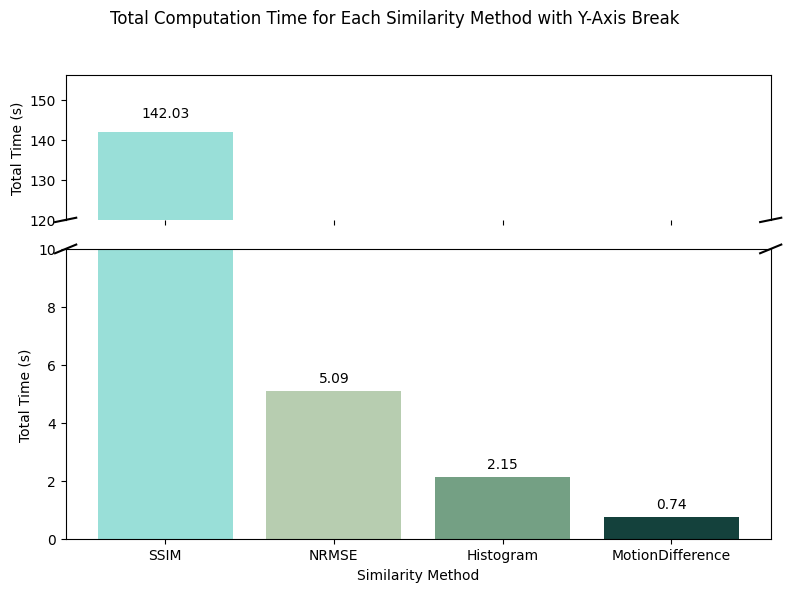

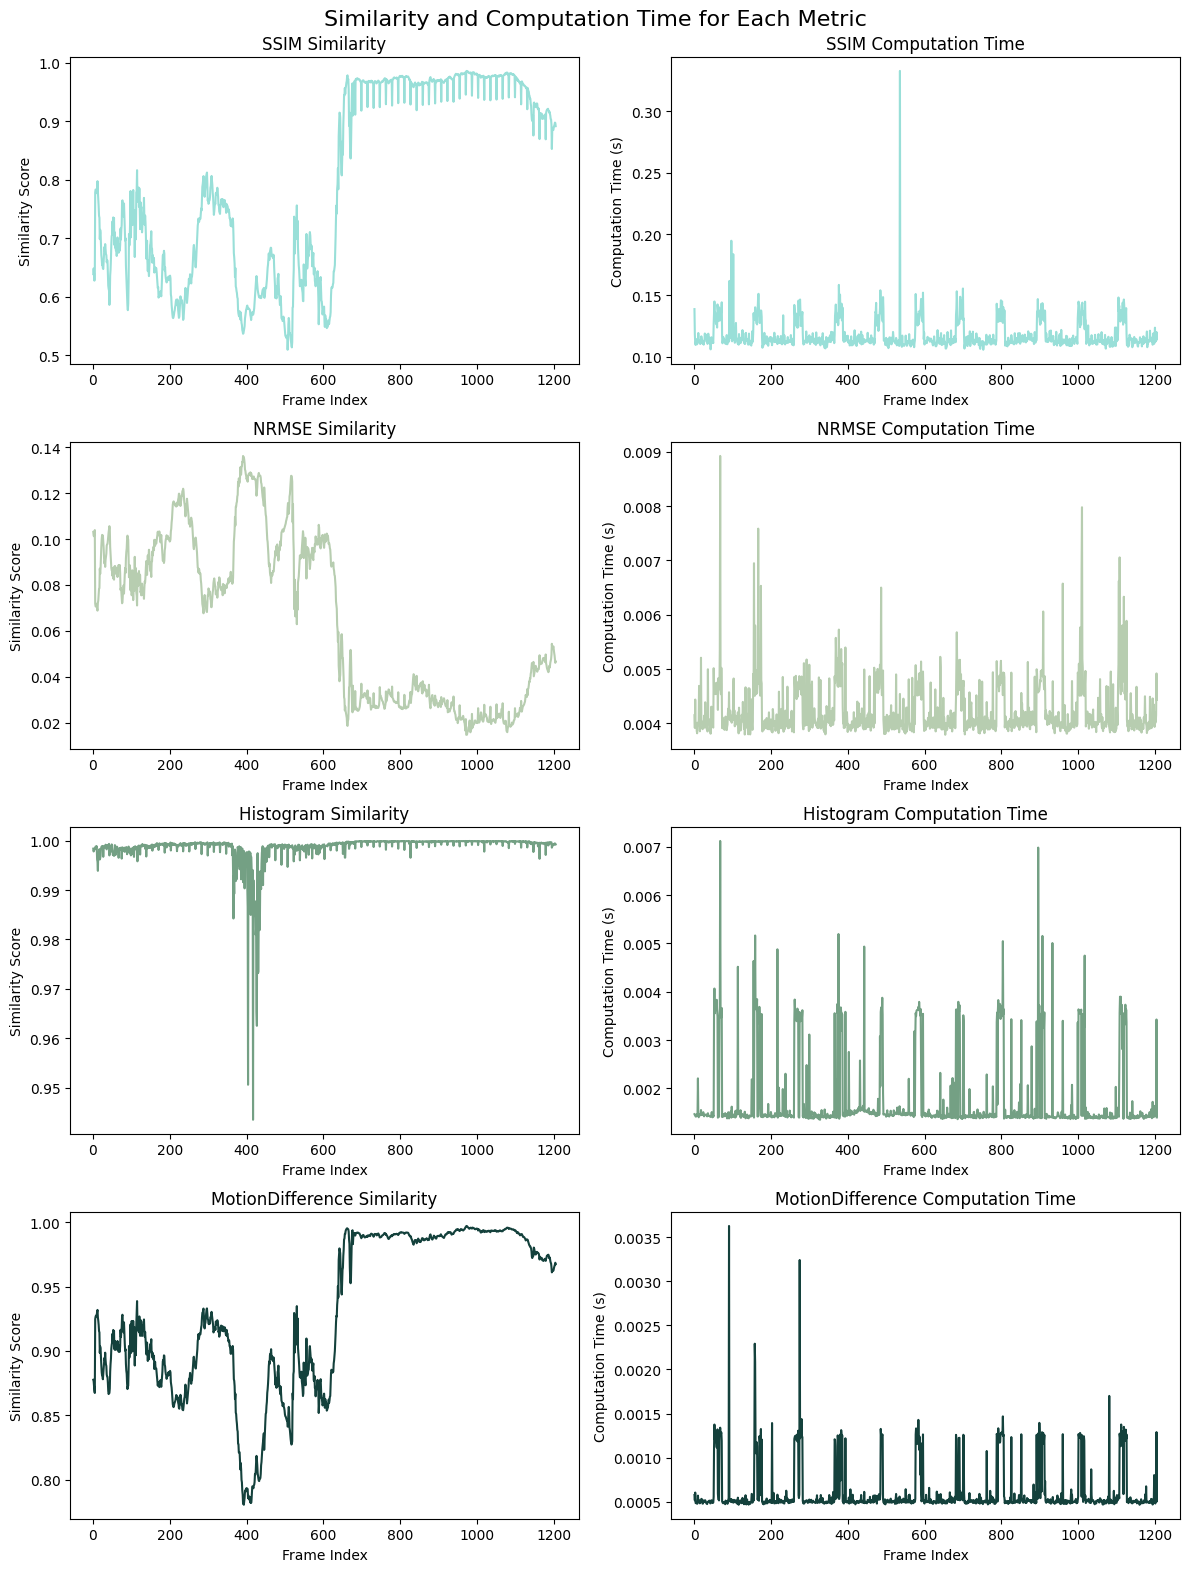

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: similarity_scores_over_frames.png


Plot saved as similarity_scores_over_frames.png


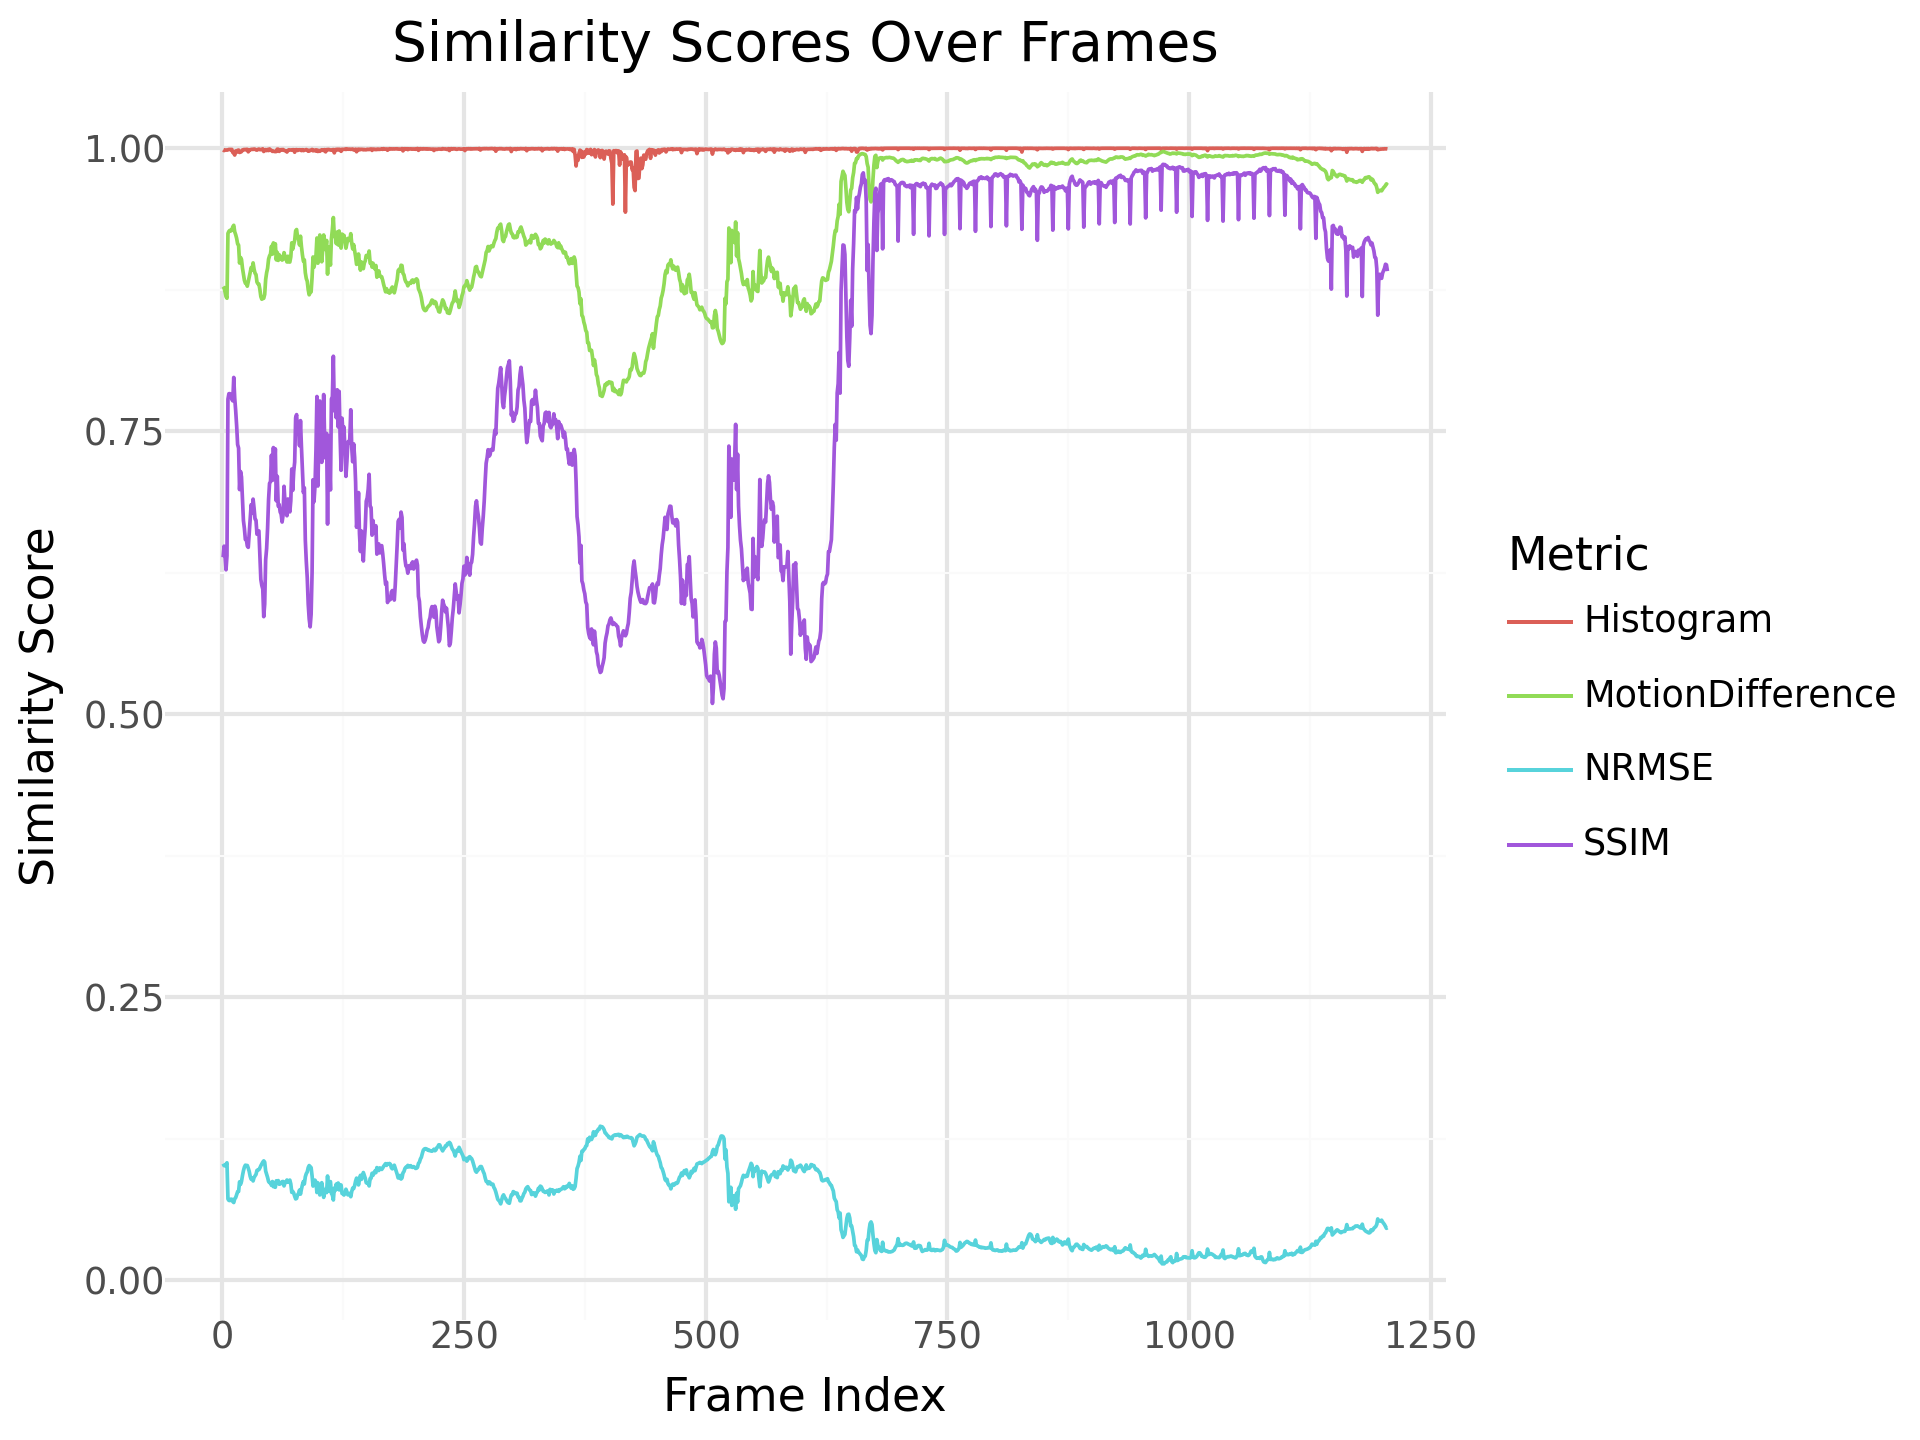

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: computation_time_over_frames.png


Plot saved as computation_time_over_frames.png


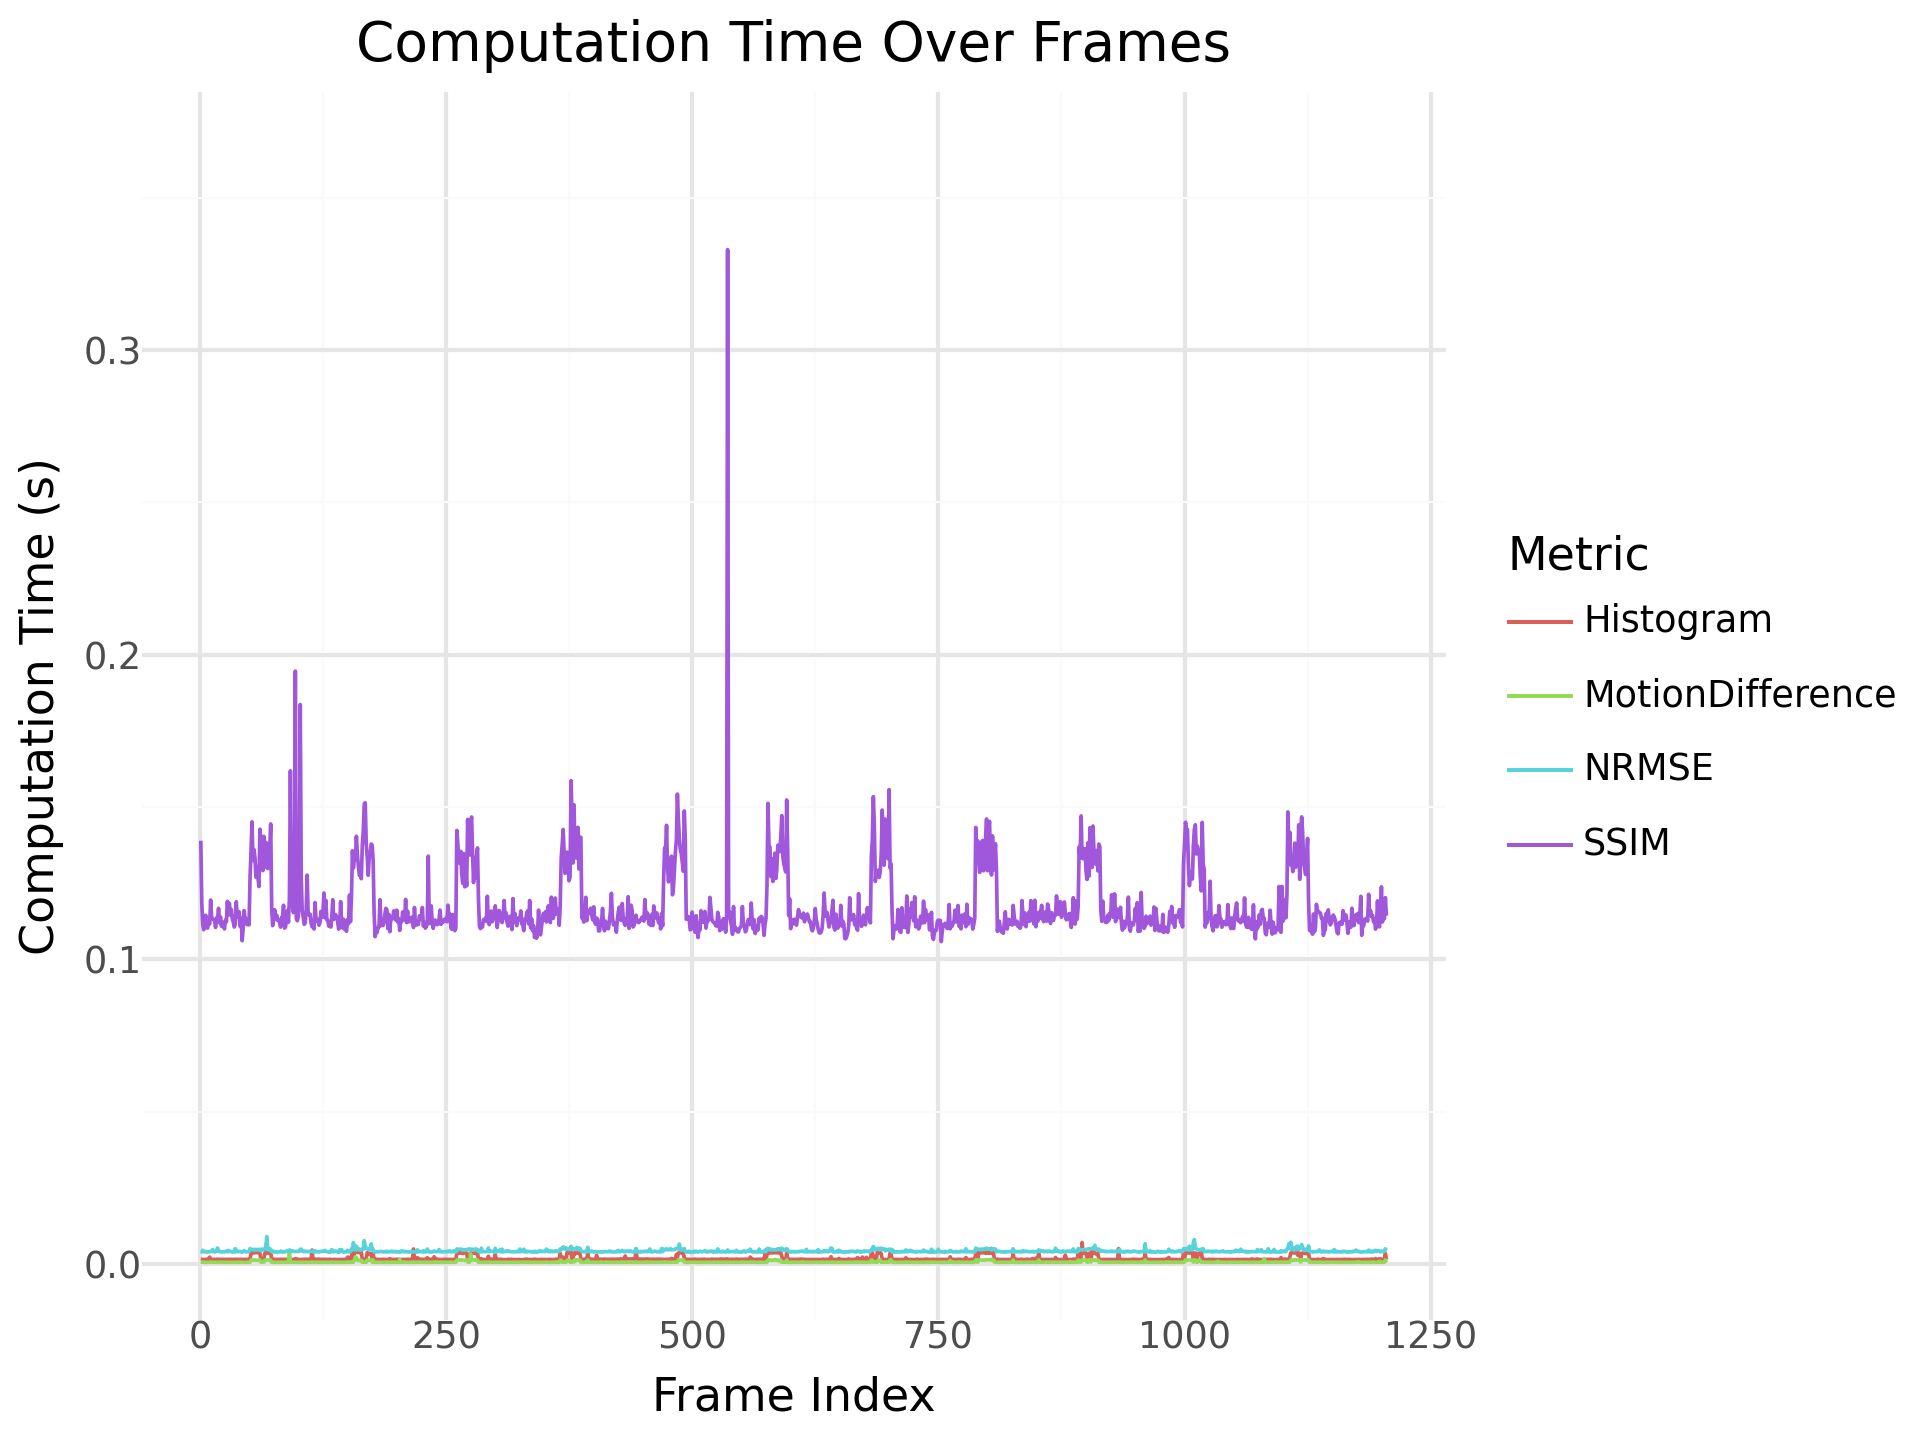

In [ ]:
# Experiment Run 8

import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, scale_y_continuous, scale_color_manual
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to install plotnine if not already installed
def install_plotnine():
    try:
        import plotnine
    except ImportError:
        import sys
        !{sys.executable} -m pip install plotnine

# Set the video path (update this to your video file path)
video_path = '/content/Input 1.mov'  # Change this to your video file path

# Verify if the video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found at path: {video_path}")

# Functions to compute different similarity metrics
def calculate_ssim(frame1, frame2):
    score, _ = ssim(frame1, frame2, full=True)
    return score

def calculate_nrmse(frame1, frame2):
    return np.sqrt(np.mean((frame1.astype("float") - frame2.astype("float")) ** 2)) / np.max(frame1)

def calculate_histogram_similarity(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def calculate_motion_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    non_zero_count = np.count_nonzero(diff)
    change_ratio = non_zero_count / frame1.size
    return 1 - change_ratio

# Function to read video frames
def get_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Loaded {frame_idx} frames...")
    cap.release()
    print(f"Total frames loaded: {len(frames)}")
    return frames

# Load frames
frames = get_video_frames(video_path)

# Check if frames are loaded; exit if no frames
if len(frames) < 2:
    raise ValueError("No frames loaded or not enough frames to compare.")

# Initialize lists to store similarity values and computation times
similarity_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}
time_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}

# Process each frame for each method and store similarity scores and computation times
frame_count = len(frames)
print("Starting similarity and computation time calculations...")
for i in range(1, frame_count):
    frame1, frame2 = frames[i - 1], frames[i]

    # Calculate similarity and timing for SSIM
    start_time = time.time()
    similarity_values['SSIM'].append(calculate_ssim(frame1, frame2))
    time_values['SSIM'].append(time.time() - start_time)

    # Calculate similarity and timing for NRMSE
    start_time = time.time()
    similarity_values['NRMSE'].append(calculate_nrmse(frame1, frame2))
    time_values['NRMSE'].append(time.time() - start_time)

    # Calculate similarity and timing for Histogram
    start_time = time.time()
    similarity_values['Histogram'].append(calculate_histogram_similarity(frame1, frame2))
    time_values['Histogram'].append(time.time() - start_time)

    # Calculate similarity and timing for Motion Difference
    start_time = time.time()
    similarity_values['MotionDifference'].append(calculate_motion_difference(frame1, frame2))
    time_values['MotionDifference'].append(time.time() - start_time)

    # Optional: Print progress every 100 frames
    if i % 100 == 0:
        print(f"Processed {i}/{frame_count - 1} frames...")

print("Similarity and computation time calculations completed.")

# Prepare DataFrames for plotting
frame_indices = list(range(1, frame_count))

# Create DataFrame for similarity scores
similarity_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': similarity_values['SSIM'],
    'NRMSE': similarity_values['NRMSE'],
    'Histogram': similarity_values['Histogram'],
    'MotionDifference': similarity_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Score")

# Create DataFrame for computation times
time_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': time_values['SSIM'],
    'NRMSE': time_values['NRMSE'],
    'Histogram': time_values['Histogram'],
    'MotionDifference': time_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Time")

# Calculate total time for each method and display in a bar chart
total_times = {method: sum(times) for method, times in time_values.items()}
total_time_df = pd.DataFrame(list(total_times.items()), columns=['Metric', 'TotalTime'])

# Define the new color palette you provided
custom_palette = ['#99dfd8', '#b7cdb0', '#74a084', '#14413c']

# Plot similarity scores using ggplot
similarity_plot = (
    ggplot(similarity_df, aes(x="Frame", y="Score", color="Metric")) +
    geom_line() +
    labs(title="Similarity Scores Over Frames", x="Frame Index", y="Similarity Score") +
    theme_minimal()
)

# Plot computation times with y-axis adjustment for clarity
time_plot = (
    ggplot(time_df, aes(x="Frame", y="Time", color="Metric")) +
    geom_line() +
    labs(title="Computation Time Over Frames", x="Frame Index", y="Computation Time (s)") +
    theme_minimal() +
    scale_y_continuous(limits=(0, max(time_df['Time']) * 1.1))  # Adjust y-axis for better visibility
)

# Plot total computation time with a y-axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
fig.subplots_adjust(hspace=0.05)

# Define y-axis limits for the break
lower_limit = 0
upper_limit = 10
middle_gap_start = 120
middle_gap_end = max(total_times.values()) * 1.1

# Plot the upper part of the y-axis
ax1.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax1.set_ylim(middle_gap_start, middle_gap_end)
ax1.set_ylabel("Total Time (s)")
ax1.spines['bottom'].set_visible(False)

# Plot the lower part of the y-axis
ax2.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax2.set_ylim(lower_limit, upper_limit)
ax2.set_xlabel("Similarity Method")
ax2.set_ylabel("Total Time (s)")

# Add diagonal lines to indicate the y-axis break
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Label each bar with the total time value
for i, v in enumerate(total_times.values()):
    if v > middle_gap_start:
        ax1.text(i, v + max(total_times.values()) * 0.02, f"{v:.2f}", ha='center', va='bottom')
    else:
        ax2.text(i, v + upper_limit * 0.02, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.suptitle("Total Computation Time for Each Similarity Method with Y-Axis Break")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_computation_time_y_axis_break_custom_palette.png", dpi=300)
plt.show()

# Function to create a combined plot for each similarity metric and its computation time
def plot_similarity_and_time(similarity_df, time_df):
    metrics = ['SSIM', 'NRMSE', 'Histogram', 'MotionDifference']

    fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics):
        # Similarity plot
        similarity_metric_df = similarity_df[similarity_df['Metric'] == metric]
        axes[i, 0].plot(similarity_metric_df['Frame'], similarity_metric_df['Score'], color=custom_palette[i])
        axes[i, 0].set_title(f"{metric} Similarity")
        axes[i, 0].set_xlabel("Frame Index")
        axes[i, 0].set_ylabel("Similarity Score")

        # Computation time plot
        time_metric_df = time_df[time_df['Metric'] == metric]
        axes[i, 1].plot(time_metric_df['Frame'], time_metric_df['Time'], color=custom_palette[i])
        axes[i, 1].set_title(f"{metric} Computation Time")
        axes[i, 1].set_xlabel("Frame Index")
        axes[i, 1].set_ylabel("Computation Time (s)")

    plt.tight_layout()
    plt.suptitle("Similarity and Computation Time for Each Metric", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the similarity and computation time side by side for each metric
plot_similarity_and_time(similarity_df, time_df)

# Function to save and display plotnine plots
def save_and_display_plot(plot, filename):
    # Save the plot as a PNG file
    plot.save(filename, dpi=300)
    print(f"Plot saved as {filename}")

    # Attempt to display the plot if in a Jupyter environment
    try:
        from IPython.display import Image, display
        display(Image(filename=filename))
    except ImportError:
        print(f"Cannot display {filename} directly. Please open the file to view the plot.")

# Save and display the plots
save_and_display_plot(similarity_plot, "similarity_scores_over_frames.png")
save_and_display_plot(time_plot, "computation_time_over_frames.png")

Loaded 100 frames...
Loaded 200 frames...
Loaded 300 frames...
Loaded 400 frames...
Loaded 500 frames...
Loaded 600 frames...
Loaded 700 frames...
Loaded 800 frames...
Loaded 900 frames...
Loaded 1000 frames...
Loaded 1100 frames...
Loaded 1200 frames...
Total frames loaded: 1206
Starting similarity and computation time calculations...
Processed 100/1205 frames...
Processed 200/1205 frames...
Processed 300/1205 frames...
Processed 400/1205 frames...
Processed 500/1205 frames...
Processed 600/1205 frames...
Processed 700/1205 frames...
Processed 800/1205 frames...
Processed 900/1205 frames...
Processed 1000/1205 frames...
Processed 1100/1205 frames...
Processed 1200/1205 frames...
Similarity and computation time calculations completed.


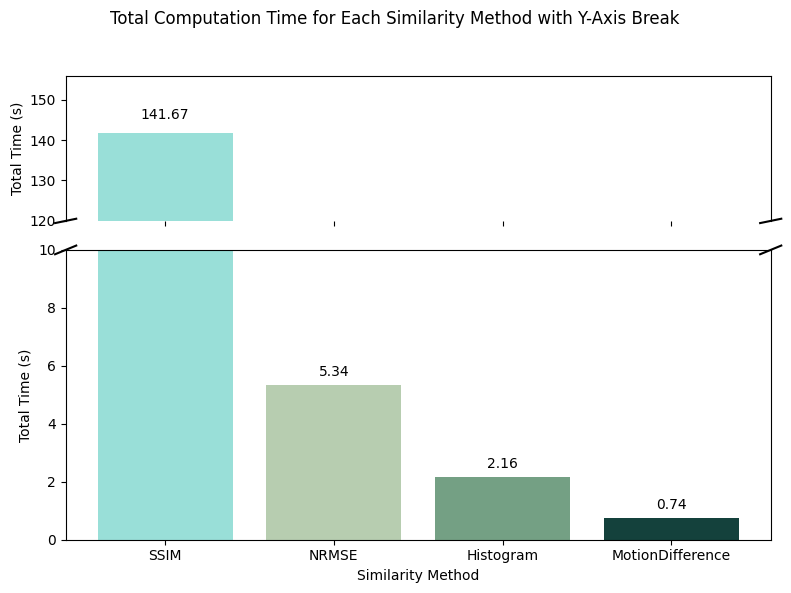

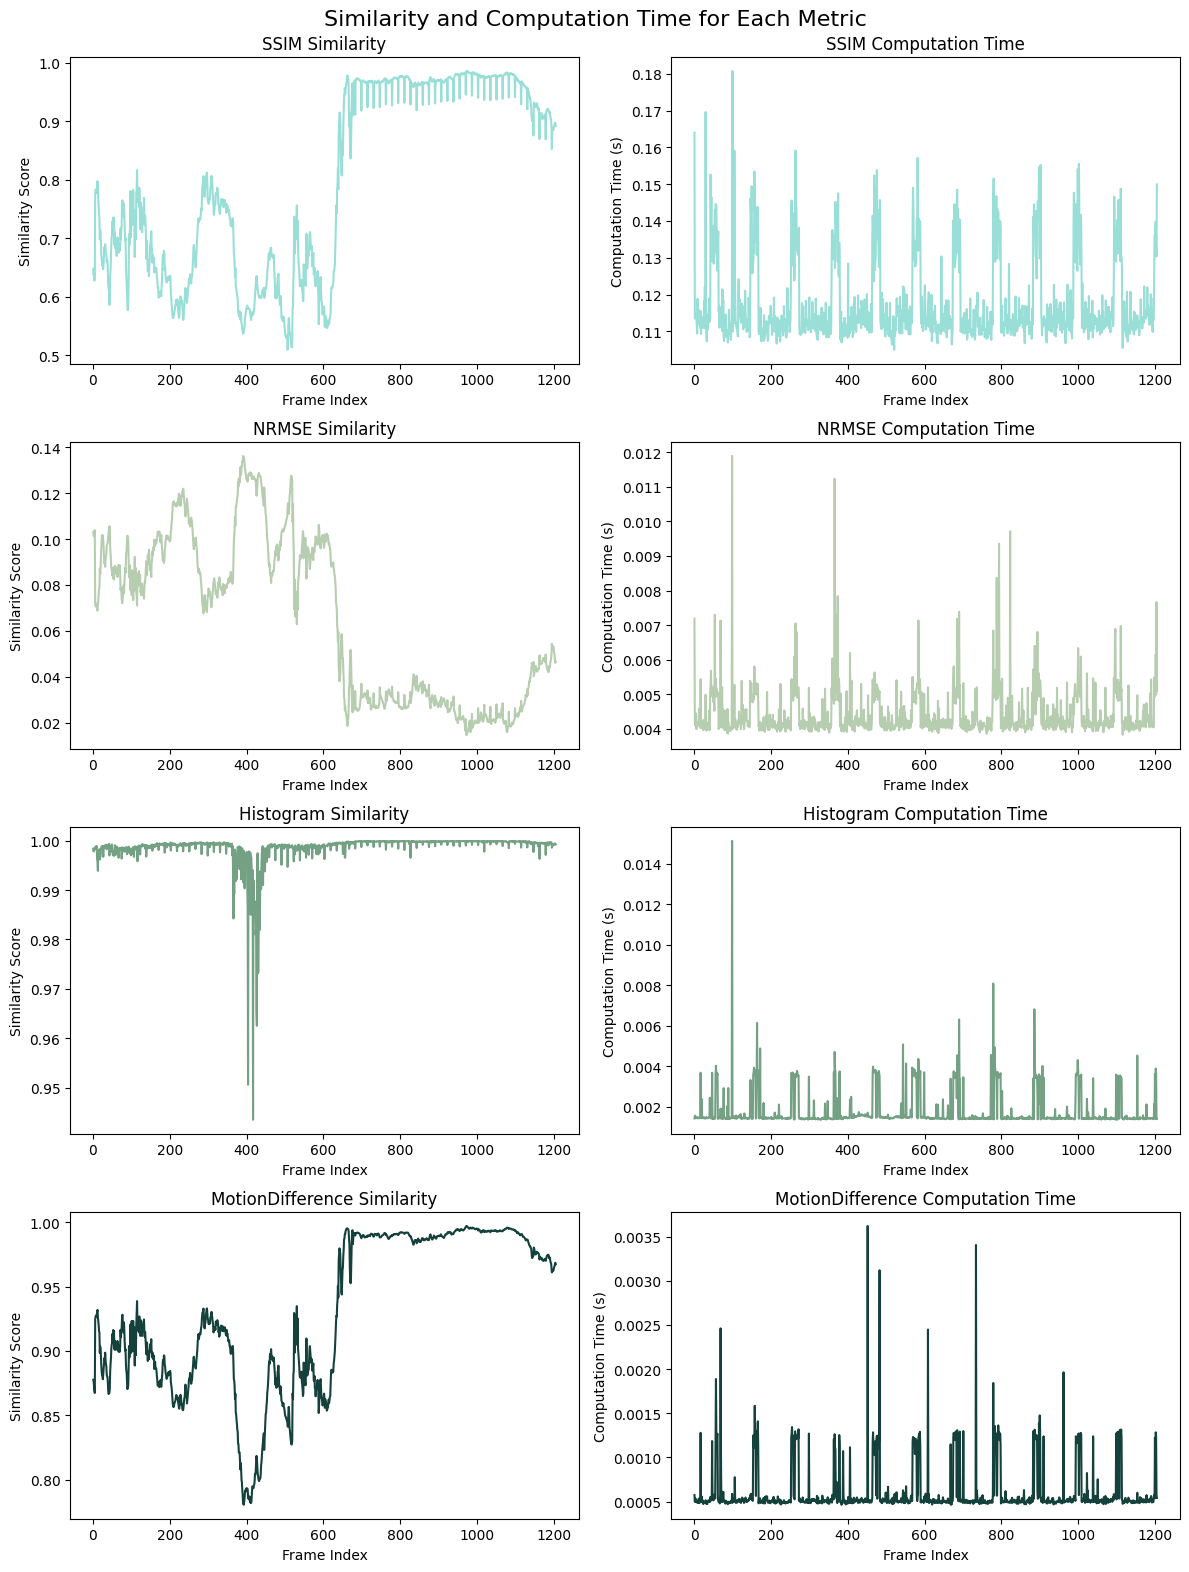

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: similarity_scores_over_frames.png


Plot saved as similarity_scores_over_frames.png


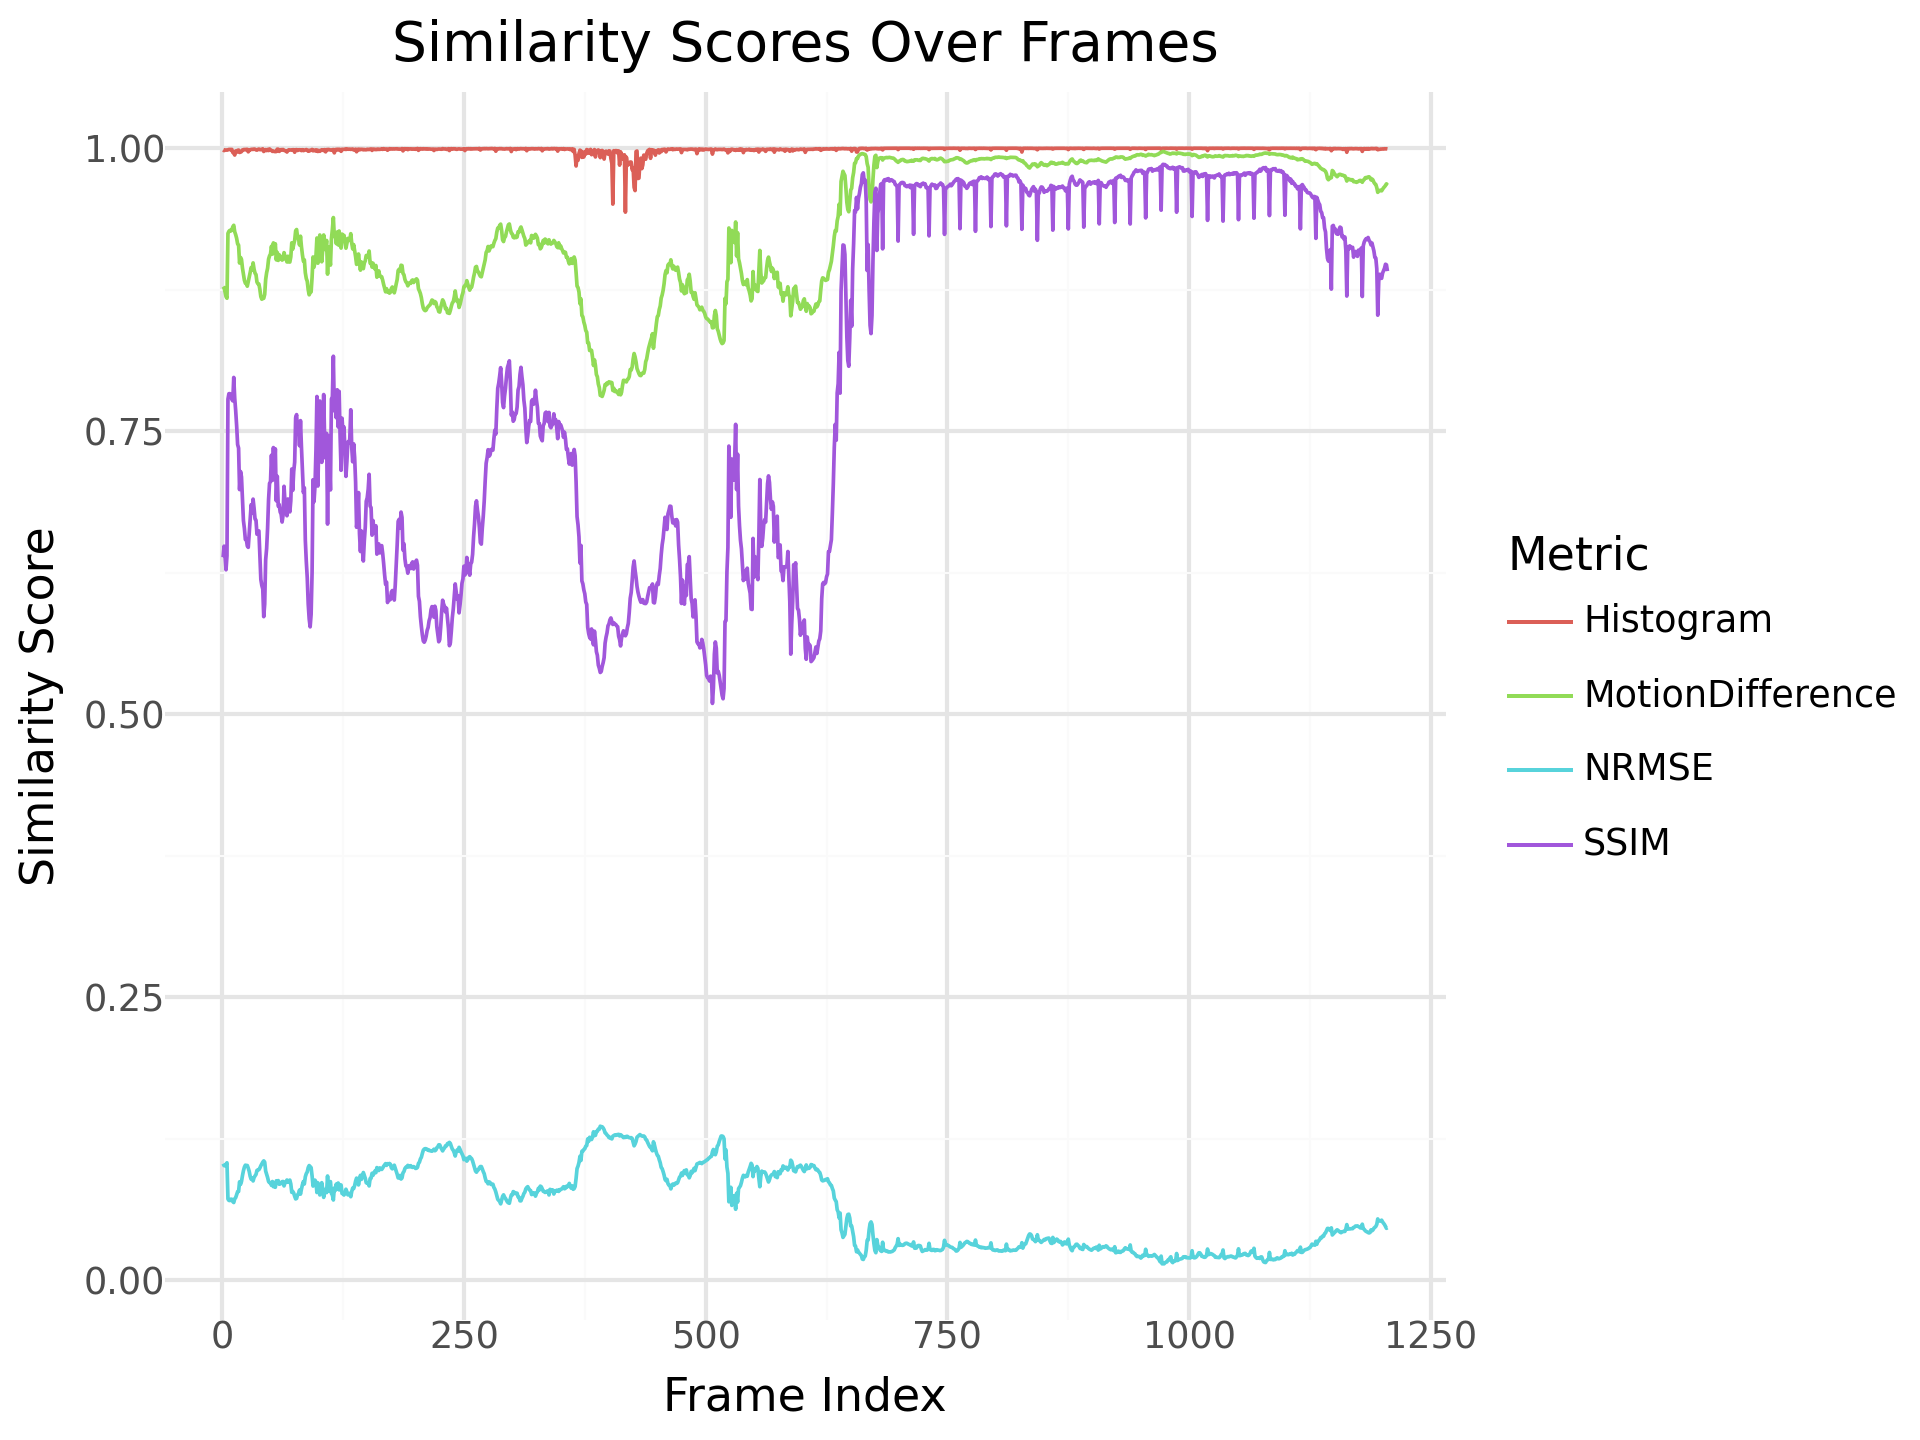

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: computation_time_over_frames.png


Plot saved as computation_time_over_frames.png


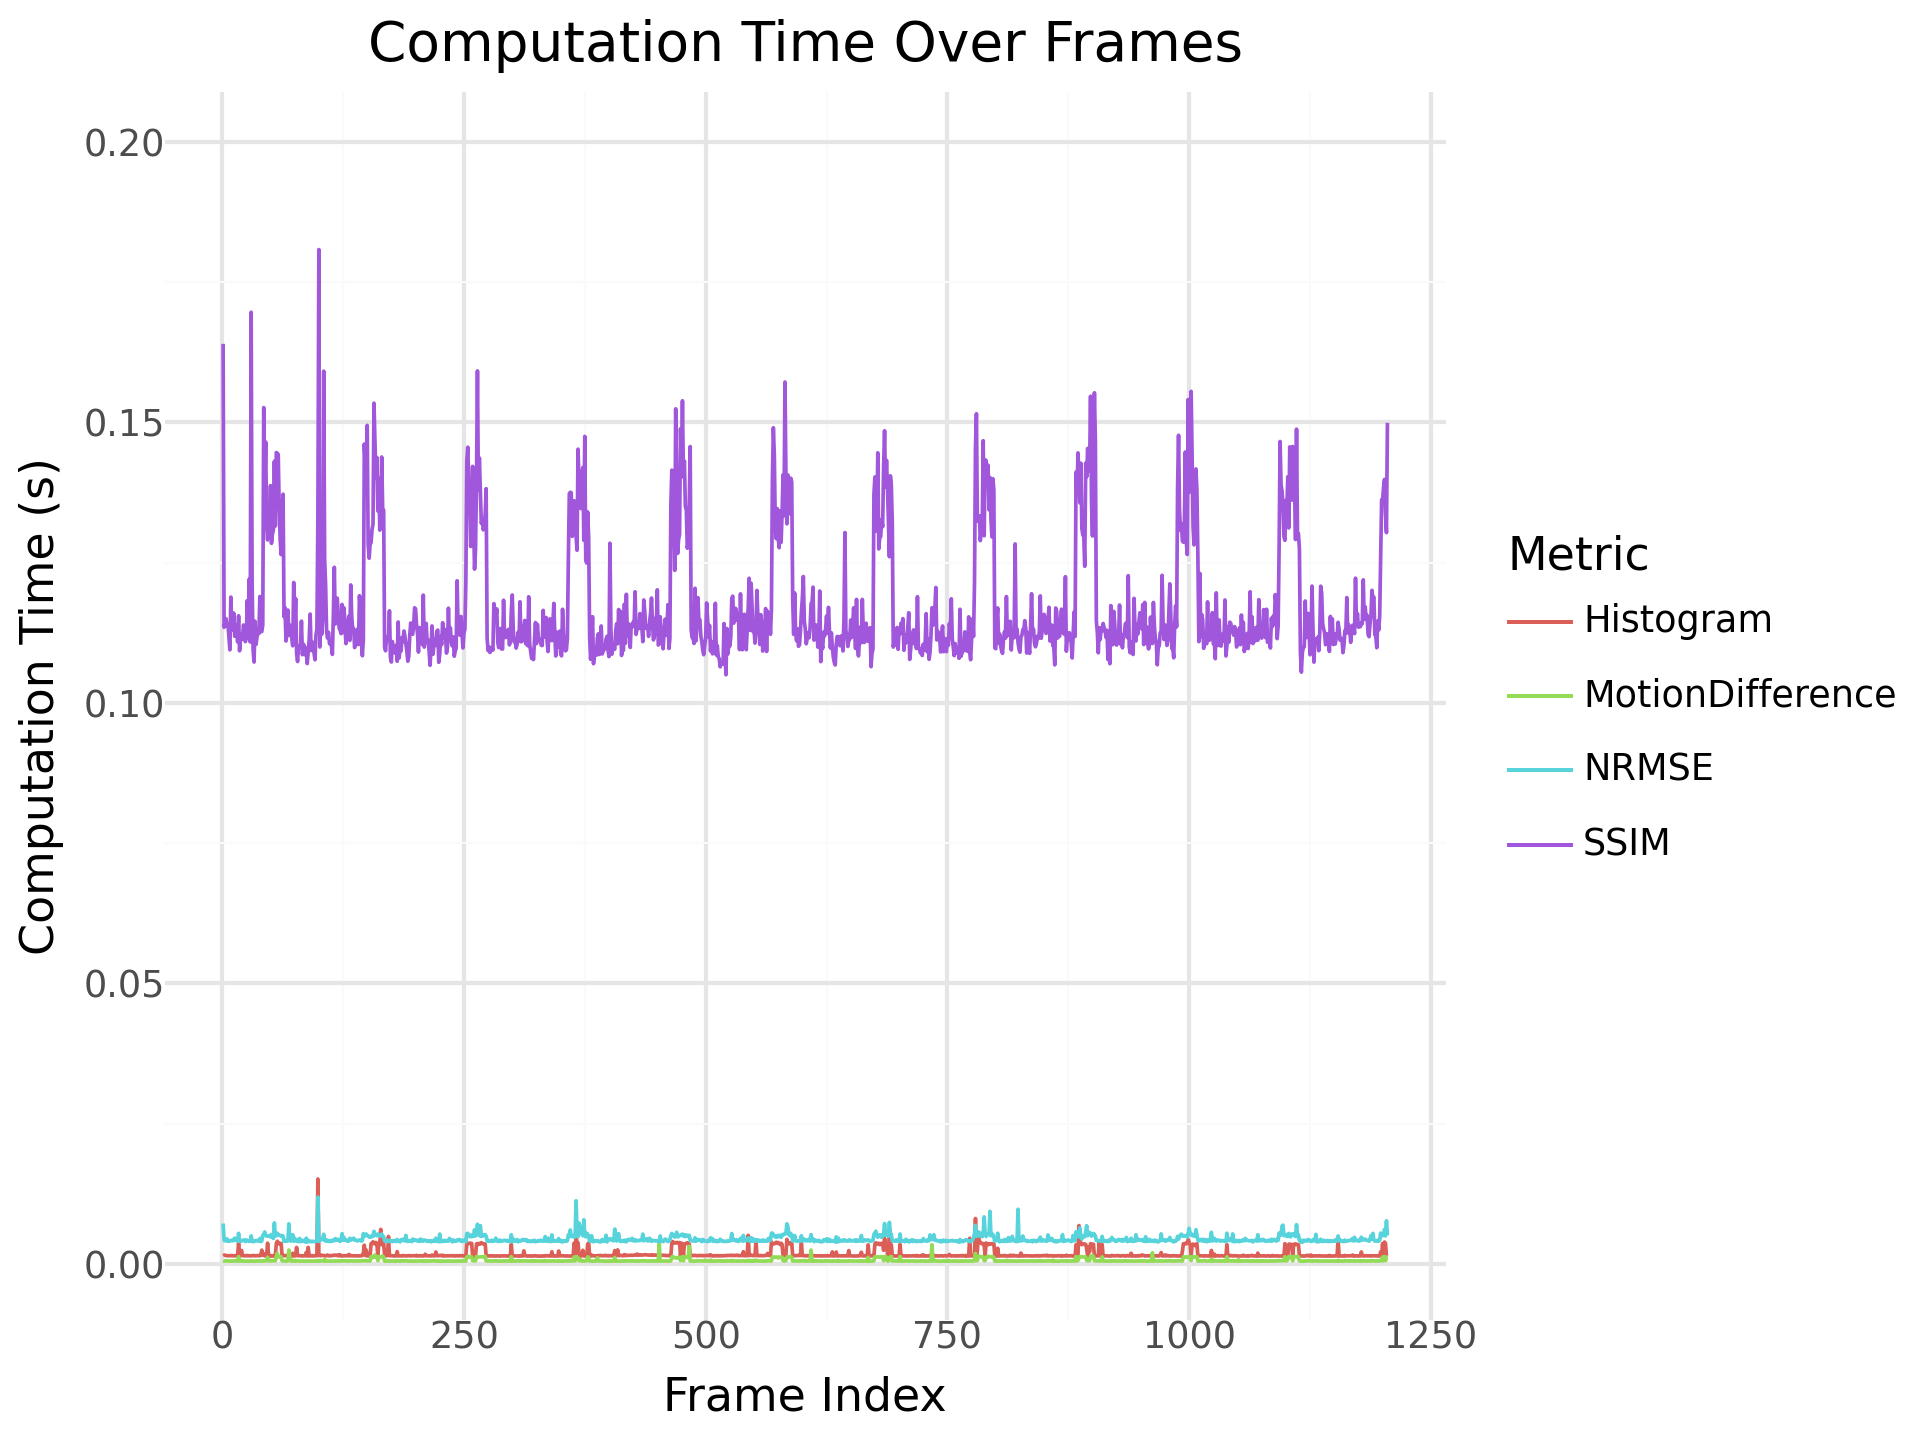

In [ ]:
# Experiment Run 9

import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, scale_y_continuous, scale_color_manual
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to install plotnine if not already installed
def install_plotnine():
    try:
        import plotnine
    except ImportError:
        import sys
        !{sys.executable} -m pip install plotnine

# Set the video path (update this to your video file path)
video_path = '/content/Input 1.mov'  # Change this to your video file path

# Verify if the video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found at path: {video_path}")

# Functions to compute different similarity metrics
def calculate_ssim(frame1, frame2):
    score, _ = ssim(frame1, frame2, full=True)
    return score

def calculate_nrmse(frame1, frame2):
    return np.sqrt(np.mean((frame1.astype("float") - frame2.astype("float")) ** 2)) / np.max(frame1)

def calculate_histogram_similarity(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def calculate_motion_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    non_zero_count = np.count_nonzero(diff)
    change_ratio = non_zero_count / frame1.size
    return 1 - change_ratio

# Function to read video frames
def get_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Loaded {frame_idx} frames...")
    cap.release()
    print(f"Total frames loaded: {len(frames)}")
    return frames

# Load frames
frames = get_video_frames(video_path)

# Check if frames are loaded; exit if no frames
if len(frames) < 2:
    raise ValueError("No frames loaded or not enough frames to compare.")

# Initialize lists to store similarity values and computation times
similarity_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}
time_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}

# Process each frame for each method and store similarity scores and computation times
frame_count = len(frames)
print("Starting similarity and computation time calculations...")
for i in range(1, frame_count):
    frame1, frame2 = frames[i - 1], frames[i]

    # Calculate similarity and timing for SSIM
    start_time = time.time()
    similarity_values['SSIM'].append(calculate_ssim(frame1, frame2))
    time_values['SSIM'].append(time.time() - start_time)

    # Calculate similarity and timing for NRMSE
    start_time = time.time()
    similarity_values['NRMSE'].append(calculate_nrmse(frame1, frame2))
    time_values['NRMSE'].append(time.time() - start_time)

    # Calculate similarity and timing for Histogram
    start_time = time.time()
    similarity_values['Histogram'].append(calculate_histogram_similarity(frame1, frame2))
    time_values['Histogram'].append(time.time() - start_time)

    # Calculate similarity and timing for Motion Difference
    start_time = time.time()
    similarity_values['MotionDifference'].append(calculate_motion_difference(frame1, frame2))
    time_values['MotionDifference'].append(time.time() - start_time)

    # Optional: Print progress every 100 frames
    if i % 100 == 0:
        print(f"Processed {i}/{frame_count - 1} frames...")

print("Similarity and computation time calculations completed.")

# Prepare DataFrames for plotting
frame_indices = list(range(1, frame_count))

# Create DataFrame for similarity scores
similarity_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': similarity_values['SSIM'],
    'NRMSE': similarity_values['NRMSE'],
    'Histogram': similarity_values['Histogram'],
    'MotionDifference': similarity_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Score")

# Create DataFrame for computation times
time_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': time_values['SSIM'],
    'NRMSE': time_values['NRMSE'],
    'Histogram': time_values['Histogram'],
    'MotionDifference': time_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Time")

# Calculate total time for each method and display in a bar chart
total_times = {method: sum(times) for method, times in time_values.items()}
total_time_df = pd.DataFrame(list(total_times.items()), columns=['Metric', 'TotalTime'])

# Define the new color palette you provided
custom_palette = ['#99dfd8', '#b7cdb0', '#74a084', '#14413c']

# Plot similarity scores using ggplot
similarity_plot = (
    ggplot(similarity_df, aes(x="Frame", y="Score", color="Metric")) +
    geom_line() +
    labs(title="Similarity Scores Over Frames", x="Frame Index", y="Similarity Score") +
    theme_minimal()
)

# Plot computation times with y-axis adjustment for clarity
time_plot = (
    ggplot(time_df, aes(x="Frame", y="Time", color="Metric")) +
    geom_line() +
    labs(title="Computation Time Over Frames", x="Frame Index", y="Computation Time (s)") +
    theme_minimal() +
    scale_y_continuous(limits=(0, max(time_df['Time']) * 1.1))  # Adjust y-axis for better visibility
)

# Plot total computation time with a y-axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
fig.subplots_adjust(hspace=0.05)

# Define y-axis limits for the break
lower_limit = 0
upper_limit = 10
middle_gap_start = 120
middle_gap_end = max(total_times.values()) * 1.1

# Plot the upper part of the y-axis
ax1.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax1.set_ylim(middle_gap_start, middle_gap_end)
ax1.set_ylabel("Total Time (s)")
ax1.spines['bottom'].set_visible(False)

# Plot the lower part of the y-axis
ax2.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax2.set_ylim(lower_limit, upper_limit)
ax2.set_xlabel("Similarity Method")
ax2.set_ylabel("Total Time (s)")

# Add diagonal lines to indicate the y-axis break
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Label each bar with the total time value
for i, v in enumerate(total_times.values()):
    if v > middle_gap_start:
        ax1.text(i, v + max(total_times.values()) * 0.02, f"{v:.2f}", ha='center', va='bottom')
    else:
        ax2.text(i, v + upper_limit * 0.02, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.suptitle("Total Computation Time for Each Similarity Method with Y-Axis Break")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_computation_time_y_axis_break_custom_palette.png", dpi=300)
plt.show()

# Function to create a combined plot for each similarity metric and its computation time
def plot_similarity_and_time(similarity_df, time_df):
    metrics = ['SSIM', 'NRMSE', 'Histogram', 'MotionDifference']

    fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics):
        # Similarity plot
        similarity_metric_df = similarity_df[similarity_df['Metric'] == metric]
        axes[i, 0].plot(similarity_metric_df['Frame'], similarity_metric_df['Score'], color=custom_palette[i])
        axes[i, 0].set_title(f"{metric} Similarity")
        axes[i, 0].set_xlabel("Frame Index")
        axes[i, 0].set_ylabel("Similarity Score")

        # Computation time plot
        time_metric_df = time_df[time_df['Metric'] == metric]
        axes[i, 1].plot(time_metric_df['Frame'], time_metric_df['Time'], color=custom_palette[i])
        axes[i, 1].set_title(f"{metric} Computation Time")
        axes[i, 1].set_xlabel("Frame Index")
        axes[i, 1].set_ylabel("Computation Time (s)")

    plt.tight_layout()
    plt.suptitle("Similarity and Computation Time for Each Metric", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the similarity and computation time side by side for each metric
plot_similarity_and_time(similarity_df, time_df)

# Function to save and display plotnine plots
def save_and_display_plot(plot, filename):
    # Save the plot as a PNG file
    plot.save(filename, dpi=300)
    print(f"Plot saved as {filename}")

    # Attempt to display the plot if in a Jupyter environment
    try:
        from IPython.display import Image, display
        display(Image(filename=filename))
    except ImportError:
        print(f"Cannot display {filename} directly. Please open the file to view the plot.")

# Save and display the plots
save_and_display_plot(similarity_plot, "similarity_scores_over_frames.png")
save_and_display_plot(time_plot, "computation_time_over_frames.png")

Loaded 100 frames...
Loaded 200 frames...
Loaded 300 frames...
Loaded 400 frames...
Loaded 500 frames...
Loaded 600 frames...
Loaded 700 frames...
Loaded 800 frames...
Loaded 900 frames...
Loaded 1000 frames...
Loaded 1100 frames...
Loaded 1200 frames...
Total frames loaded: 1206
Starting similarity and computation time calculations...
Processed 100/1205 frames...
Processed 200/1205 frames...
Processed 300/1205 frames...
Processed 400/1205 frames...
Processed 500/1205 frames...
Processed 600/1205 frames...
Processed 700/1205 frames...
Processed 800/1205 frames...
Processed 900/1205 frames...
Processed 1000/1205 frames...
Processed 1100/1205 frames...
Processed 1200/1205 frames...
Similarity and computation time calculations completed.


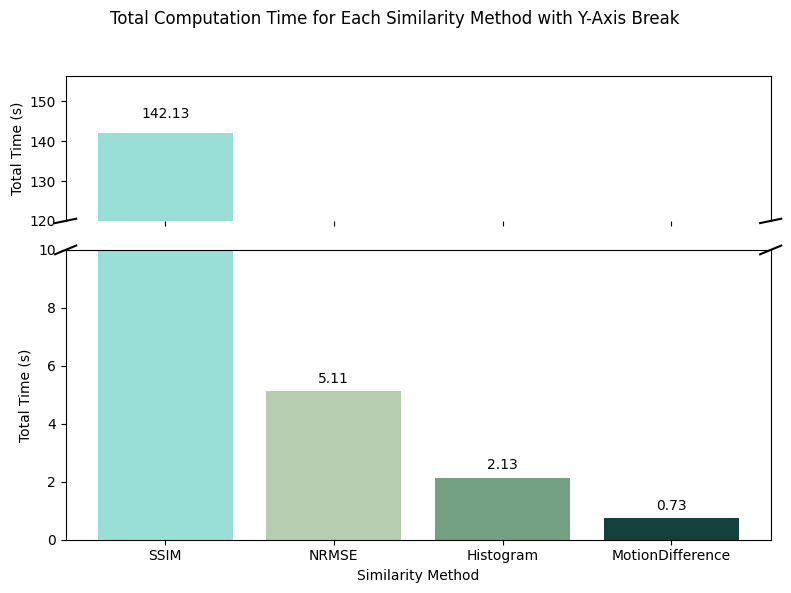

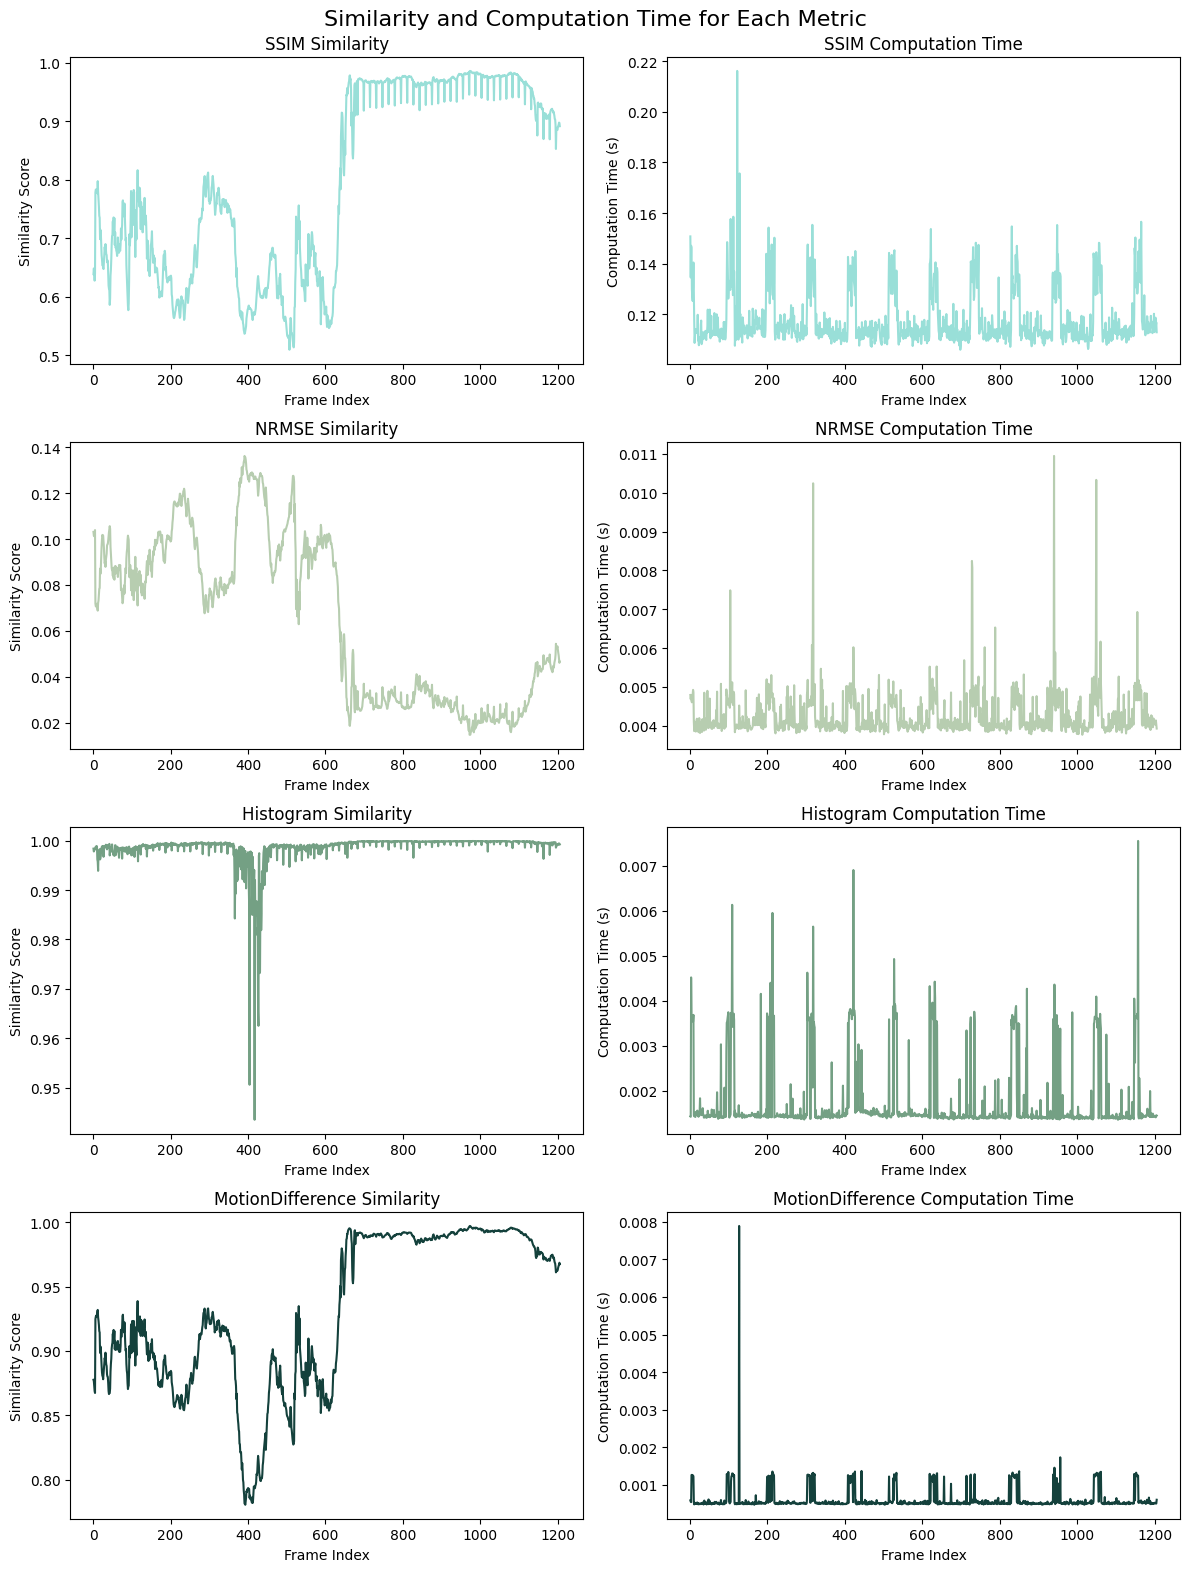

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: similarity_scores_over_frames.png


Plot saved as similarity_scores_over_frames.png


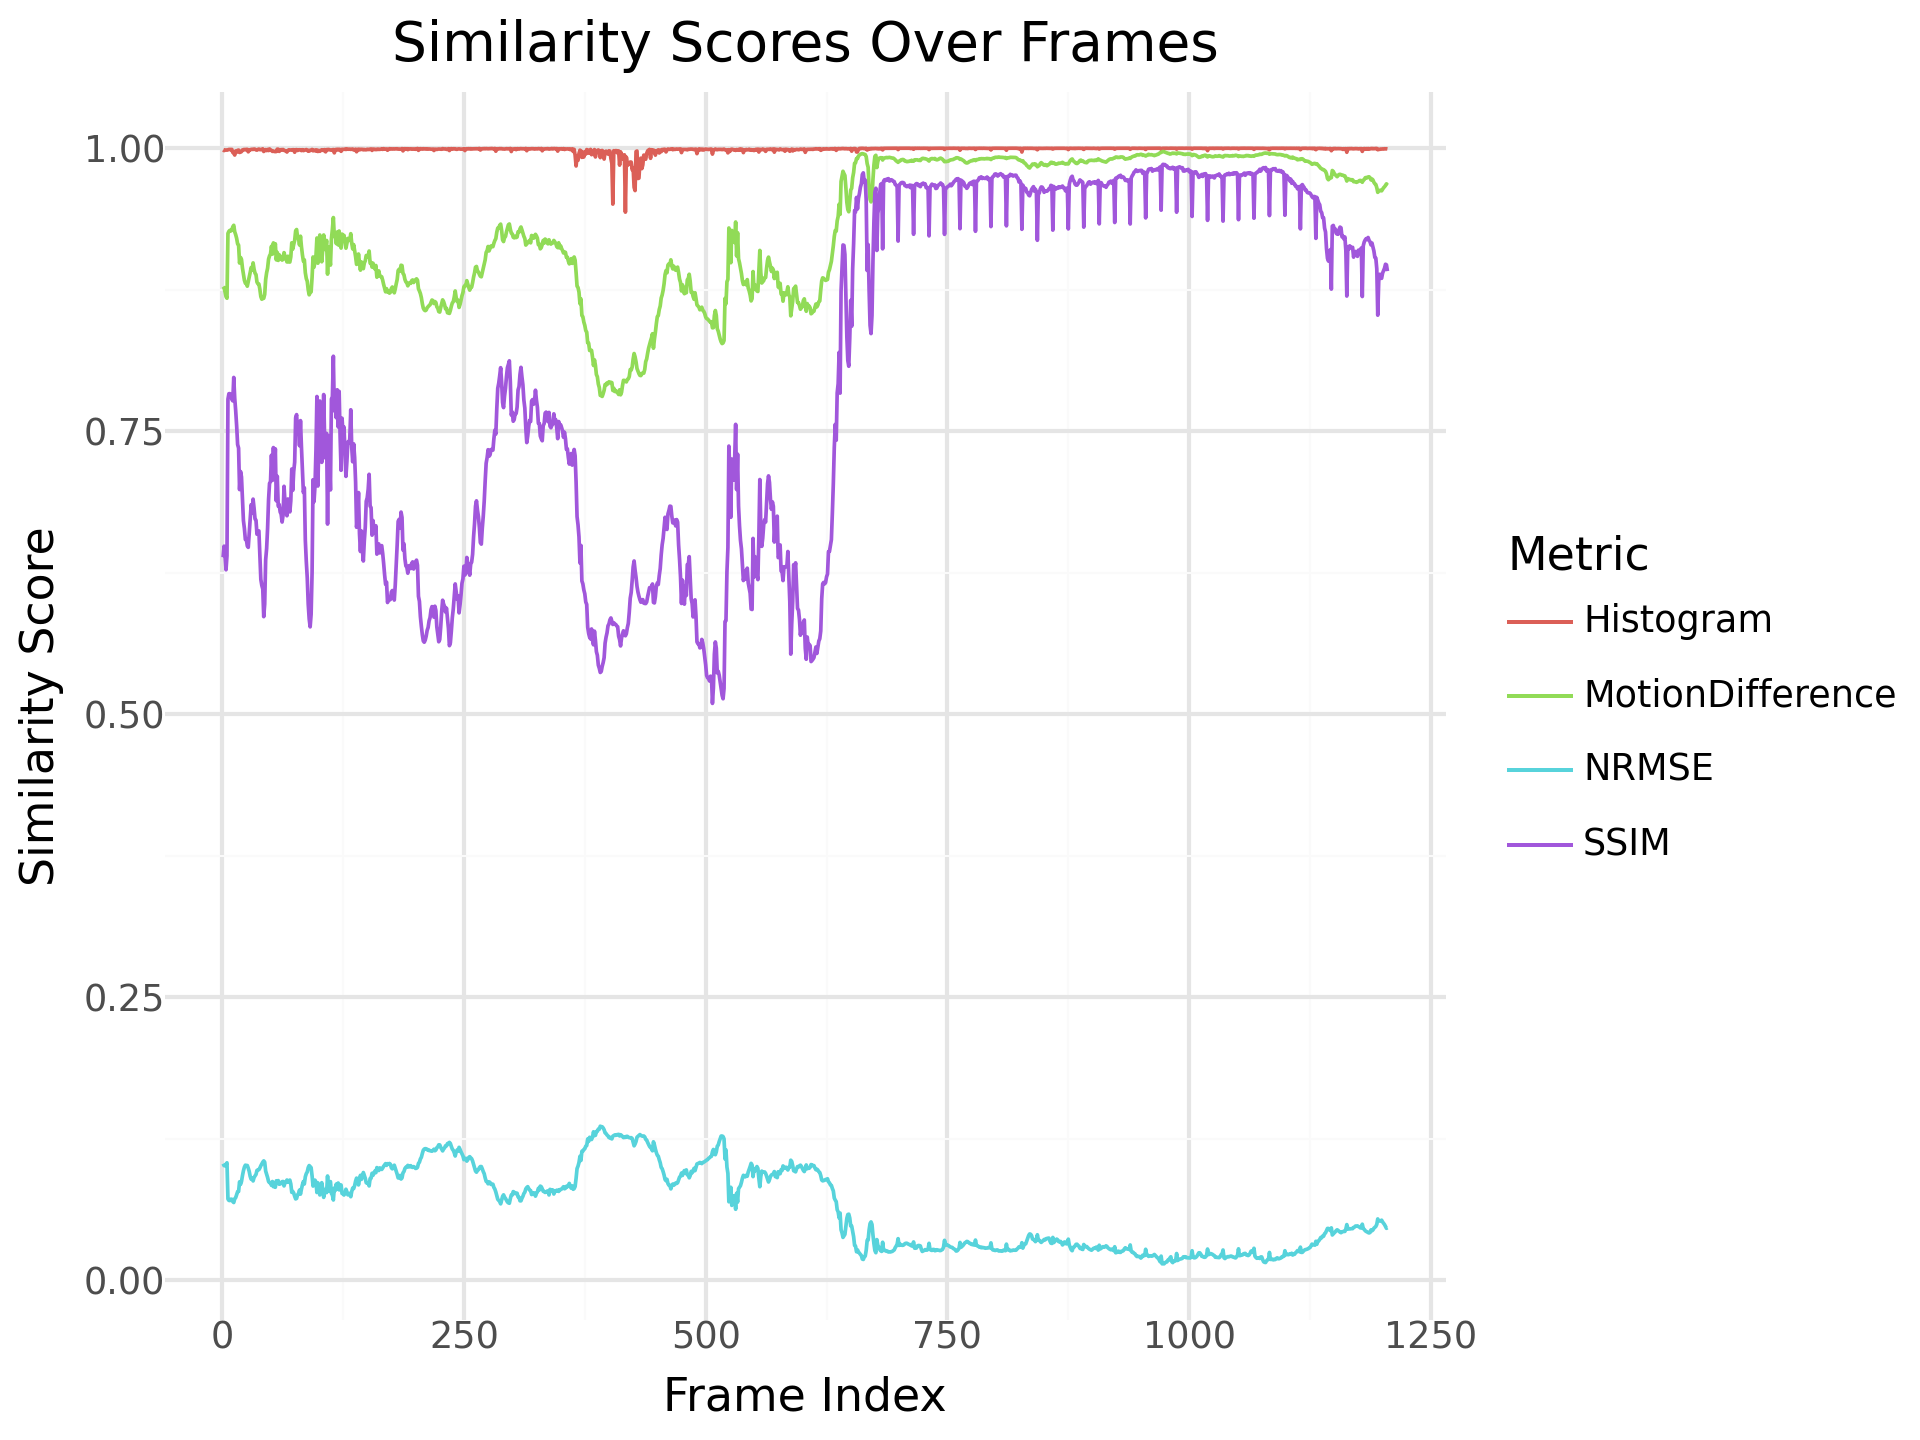

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: computation_time_over_frames.png


Plot saved as computation_time_over_frames.png


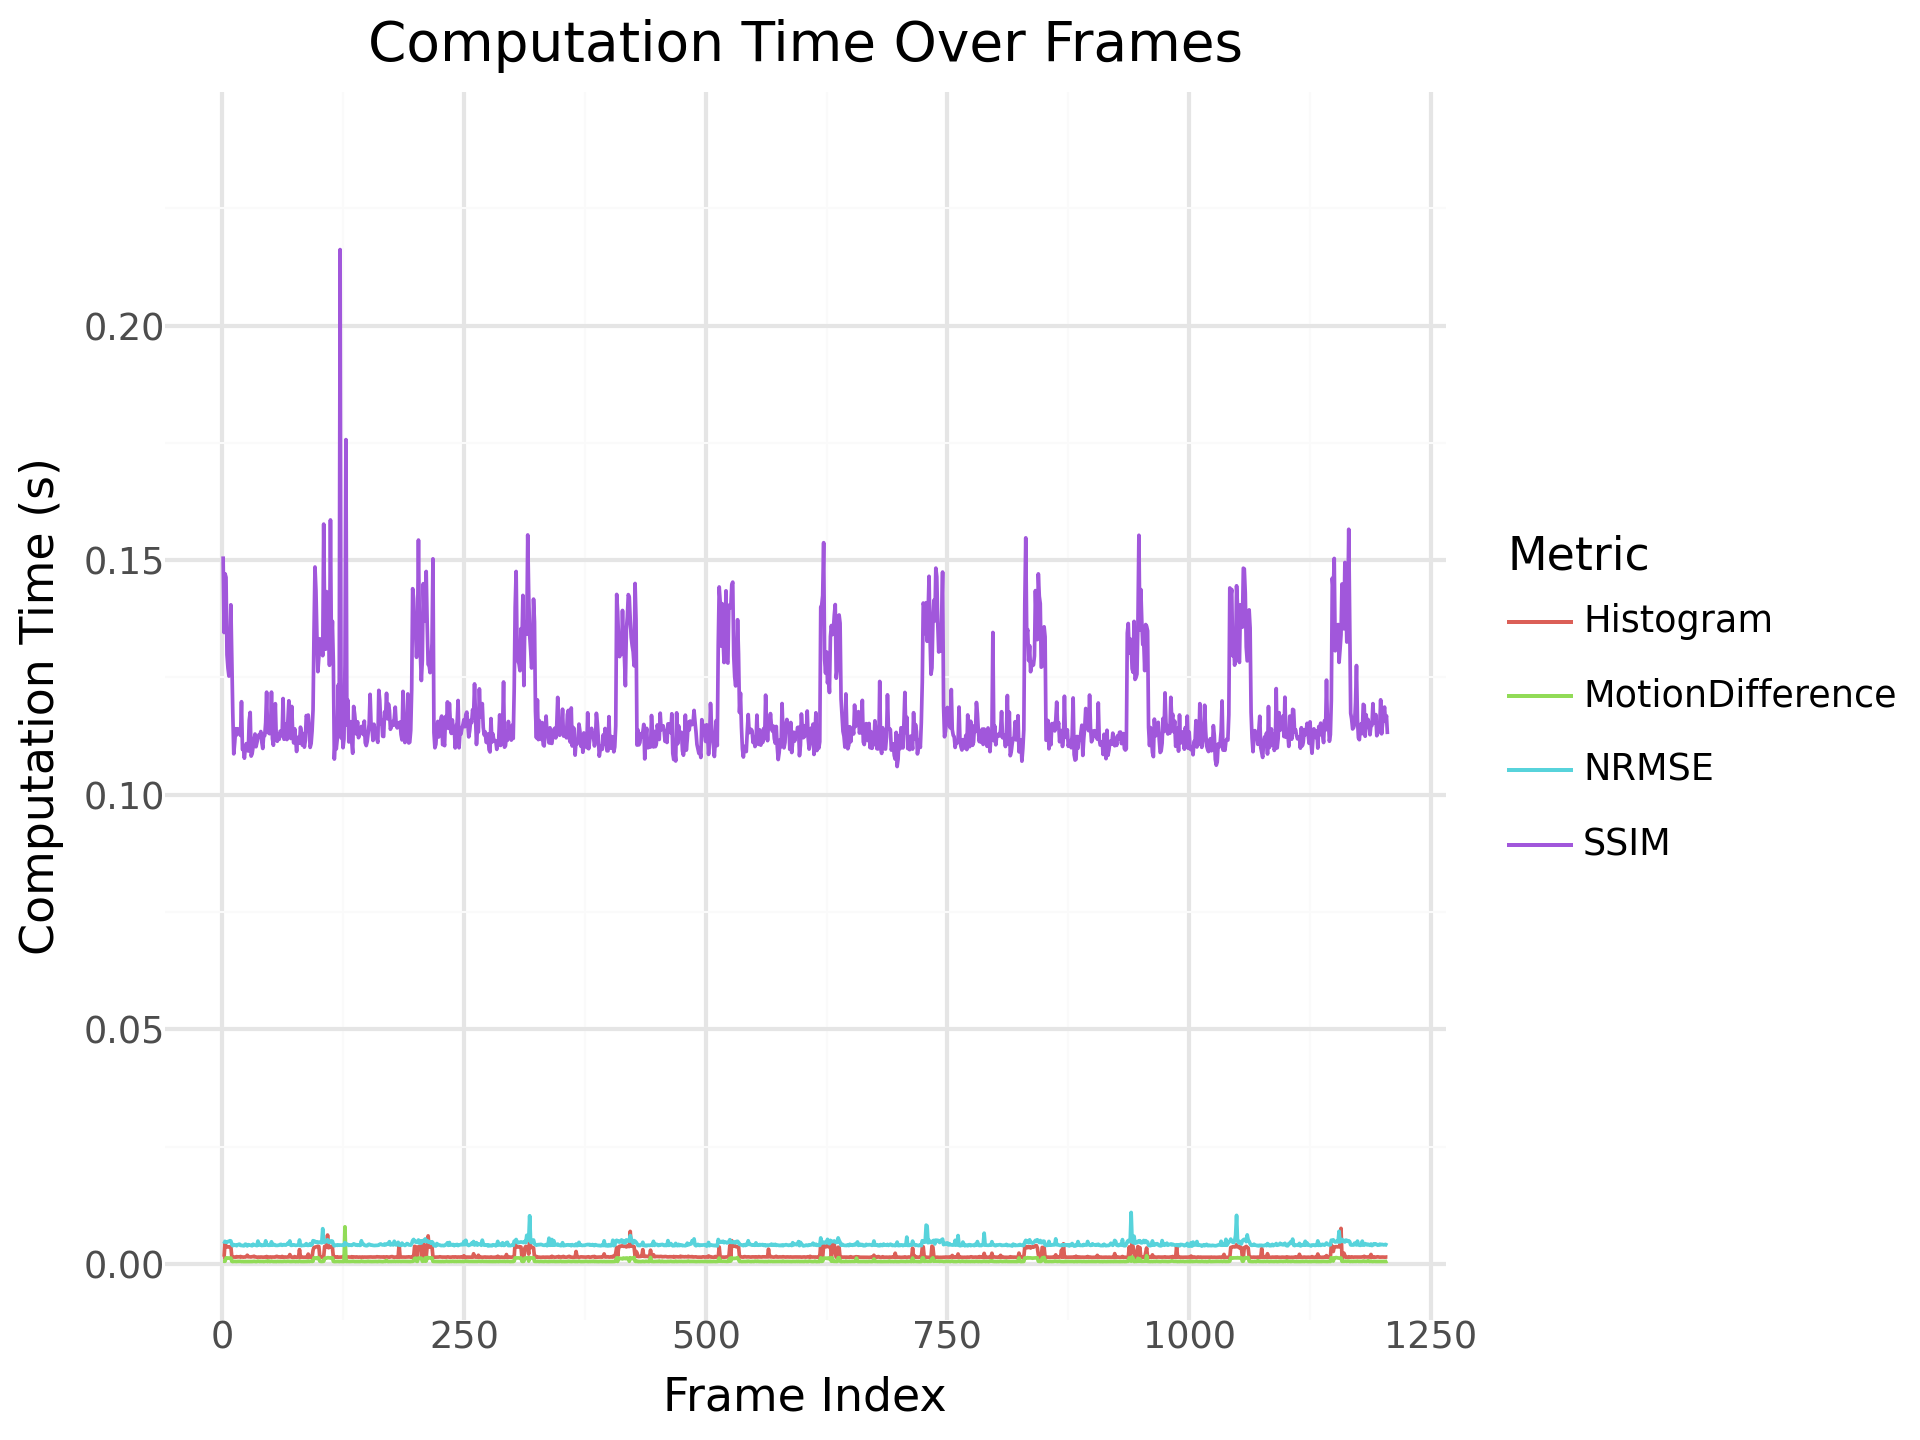

In [ ]:
# Experiment Run 10

import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, scale_y_continuous, scale_color_manual
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to install plotnine if not already installed
def install_plotnine():
    try:
        import plotnine
    except ImportError:
        import sys
        !{sys.executable} -m pip install plotnine

# Set the video path (update this to your video file path)
video_path = '/content/Input 1.mov'  # Change this to your video file path

# Verify if the video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found at path: {video_path}")

# Functions to compute different similarity metrics
def calculate_ssim(frame1, frame2):
    score, _ = ssim(frame1, frame2, full=True)
    return score

def calculate_nrmse(frame1, frame2):
    return np.sqrt(np.mean((frame1.astype("float") - frame2.astype("float")) ** 2)) / np.max(frame1)

def calculate_histogram_similarity(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def calculate_motion_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    non_zero_count = np.count_nonzero(diff)
    change_ratio = non_zero_count / frame1.size
    return 1 - change_ratio

# Function to read video frames
def get_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Loaded {frame_idx} frames...")
    cap.release()
    print(f"Total frames loaded: {len(frames)}")
    return frames

# Load frames
frames = get_video_frames(video_path)

# Check if frames are loaded; exit if no frames
if len(frames) < 2:
    raise ValueError("No frames loaded or not enough frames to compare.")

# Initialize lists to store similarity values and computation times
similarity_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}
time_values = {
    'SSIM': [],
    'NRMSE': [],
    'Histogram': [],
    'MotionDifference': []
}

# Process each frame for each method and store similarity scores and computation times
frame_count = len(frames)
print("Starting similarity and computation time calculations...")
for i in range(1, frame_count):
    frame1, frame2 = frames[i - 1], frames[i]

    # Calculate similarity and timing for SSIM
    start_time = time.time()
    similarity_values['SSIM'].append(calculate_ssim(frame1, frame2))
    time_values['SSIM'].append(time.time() - start_time)

    # Calculate similarity and timing for NRMSE
    start_time = time.time()
    similarity_values['NRMSE'].append(calculate_nrmse(frame1, frame2))
    time_values['NRMSE'].append(time.time() - start_time)

    # Calculate similarity and timing for Histogram
    start_time = time.time()
    similarity_values['Histogram'].append(calculate_histogram_similarity(frame1, frame2))
    time_values['Histogram'].append(time.time() - start_time)

    # Calculate similarity and timing for Motion Difference
    start_time = time.time()
    similarity_values['MotionDifference'].append(calculate_motion_difference(frame1, frame2))
    time_values['MotionDifference'].append(time.time() - start_time)

    # Optional: Print progress every 100 frames
    if i % 100 == 0:
        print(f"Processed {i}/{frame_count - 1} frames...")

print("Similarity and computation time calculations completed.")

# Prepare DataFrames for plotting
frame_indices = list(range(1, frame_count))

# Create DataFrame for similarity scores
similarity_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': similarity_values['SSIM'],
    'NRMSE': similarity_values['NRMSE'],
    'Histogram': similarity_values['Histogram'],
    'MotionDifference': similarity_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Score")

# Create DataFrame for computation times
time_df = pd.DataFrame({
    'Frame': frame_indices,
    'SSIM': time_values['SSIM'],
    'NRMSE': time_values['NRMSE'],
    'Histogram': time_values['Histogram'],
    'MotionDifference': time_values['MotionDifference']
}).melt(id_vars="Frame", var_name="Metric", value_name="Time")

# Calculate total time for each method and display in a bar chart
total_times = {method: sum(times) for method, times in time_values.items()}
total_time_df = pd.DataFrame(list(total_times.items()), columns=['Metric', 'TotalTime'])

# Define the new color palette you provided
custom_palette = ['#99dfd8', '#b7cdb0', '#74a084', '#14413c']

# Plot similarity scores using ggplot
similarity_plot = (
    ggplot(similarity_df, aes(x="Frame", y="Score", color="Metric")) +
    geom_line() +
    labs(title="Similarity Scores Over Frames", x="Frame Index", y="Similarity Score") +
    theme_minimal()
)

# Plot computation times with y-axis adjustment for clarity
time_plot = (
    ggplot(time_df, aes(x="Frame", y="Time", color="Metric")) +
    geom_line() +
    labs(title="Computation Time Over Frames", x="Frame Index", y="Computation Time (s)") +
    theme_minimal() +
    scale_y_continuous(limits=(0, max(time_df['Time']) * 1.1))  # Adjust y-axis for better visibility
)

# Plot total computation time with a y-axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
fig.subplots_adjust(hspace=0.05)

# Define y-axis limits for the break
lower_limit = 0
upper_limit = 10
middle_gap_start = 120
middle_gap_end = max(total_times.values()) * 1.1

# Plot the upper part of the y-axis
ax1.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax1.set_ylim(middle_gap_start, middle_gap_end)
ax1.set_ylabel("Total Time (s)")
ax1.spines['bottom'].set_visible(False)

# Plot the lower part of the y-axis
ax2.bar(total_times.keys(), total_times.values(), color=custom_palette)
ax2.set_ylim(lower_limit, upper_limit)
ax2.set_xlabel("Similarity Method")
ax2.set_ylabel("Total Time (s)")

# Add diagonal lines to indicate the y-axis break
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Label each bar with the total time value
for i, v in enumerate(total_times.values()):
    if v > middle_gap_start:
        ax1.text(i, v + max(total_times.values()) * 0.02, f"{v:.2f}", ha='center', va='bottom')
    else:
        ax2.text(i, v + upper_limit * 0.02, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.suptitle("Total Computation Time for Each Similarity Method with Y-Axis Break")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_computation_time_y_axis_break_custom_palette.png", dpi=300)
plt.show()

# Function to create a combined plot for each similarity metric and its computation time
def plot_similarity_and_time(similarity_df, time_df):
    metrics = ['SSIM', 'NRMSE', 'Histogram', 'MotionDifference']

    fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics):
        # Similarity plot
        similarity_metric_df = similarity_df[similarity_df['Metric'] == metric]
        axes[i, 0].plot(similarity_metric_df['Frame'], similarity_metric_df['Score'], color=custom_palette[i])
        axes[i, 0].set_title(f"{metric} Similarity")
        axes[i, 0].set_xlabel("Frame Index")
        axes[i, 0].set_ylabel("Similarity Score")

        # Computation time plot
        time_metric_df = time_df[time_df['Metric'] == metric]
        axes[i, 1].plot(time_metric_df['Frame'], time_metric_df['Time'], color=custom_palette[i])
        axes[i, 1].set_title(f"{metric} Computation Time")
        axes[i, 1].set_xlabel("Frame Index")
        axes[i, 1].set_ylabel("Computation Time (s)")

    plt.tight_layout()
    plt.suptitle("Similarity and Computation Time for Each Metric", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the similarity and computation time side by side for each metric
plot_similarity_and_time(similarity_df, time_df)

# Function to save and display plotnine plots
def save_and_display_plot(plot, filename):
    # Save the plot as a PNG file
    plot.save(filename, dpi=300)
    print(f"Plot saved as {filename}")

    # Attempt to display the plot if in a Jupyter environment
    try:
        from IPython.display import Image, display
        display(Image(filename=filename))
    except ImportError:
        print(f"Cannot display {filename} directly. Please open the file to view the plot.")

# Save and display the plots
save_and_display_plot(similarity_plot, "similarity_scores_over_frames.png")
save_and_display_plot(time_plot, "computation_time_over_frames.png")